In [1]:
#start by importing some needed modules
#You may see some warnings... unless it spits out an error, you can ignore them!
import tangos as db
import numpy as np
import pynbody
import matplotlib.pyplot as plt
from sympy import *
import bhtools
from scipy.optimize import curve_fit
from tangos import relation_finding as rfs
import pickle
plt.ion()
sim = db.get_simulation('cosmo25')

#Set up some properties to make the plots look nice
plt.rcParams['figure.figsize'] = (12, 9) #set figure size
plt.rcParams['font.size'] = 20 #set font size so things are readible and not too small or bit
plt.rcParams['font.family'] = 'sans-serif' # just a font preference here
plt.rcParams['xtick.major.size'] = 10 #size and widths of major/minor tick marks on plots
plt.rcParams['xtick.major.width'] = 2
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

In [11]:
# sim.timesteps

## Observational Data

In [2]:
aird_0_2__0_4 = np.array([6.964851761057955e+40, 0.0012172415154635854,
1.2467674075409151e+41, 0.0008612184914529463,
2.192785590148611e+41, 0.0005353131577386956,
3.925271777941385e+41, 0.0004128996438793166,
6.9036769328640194e+41, 0.00035224033092041713,
1.2358165955824033e+42, 0.0002796247897110357,
2.173525556145626e+42, 0.00020956571944531947,
3.890794687133348e+42, 0.00013025872794002248,
6.843039425453377e+42, 0.00008453789017079662,
1.2249619685913925e+43, 0.00006808289194075983,
2.1927855901485753e+43, 0.00004547519656154043,
3.9252717779413853e+43, 0.000024477168355725,
6.903676932864019e+43, 0.000010617096069719332,
1.2578152567806494e+44, 0.000003167629326162332,
2.173525556145626e+44, 0.000001260337647723575,
3.890794687133348e+44, 5.790599111414382e-7,
6.843039425453377e+44, 3.547873050065661e-7])
aird_0_2__0_4_error_max = np.array([6.964851761057955e+40, 0.0029283754417216094,
1.2467674075409151e+41, 0.0016696034985860366,
2.192785590148611e+41, 0.0009657348820277845,
3.925271777941385e+41, 0.0006832733912519424,
6.9036769328640194e+41, 0.0005120814930733793,
1.2358165955824033e+42, 0.0003893369931495226,
2.173525556145626e+42, 0.00028351121465787797,
3.9600543769774106e+42, 0.00018136306662999653,
6.843039425453377e+42, 0.00011941294380944499,
1.2249619685913725e+43, 0.00009616964101281727,
2.1544346900318602e+43, 0.00006152230055710593,
3.9252717779413853e+43, 0.0000335939580042423,
6.903676932864019e+43, 0.000014997046813345222,
1.25781525678067e+44, 0.000004808220270815548,
2.173525556145626e+44, 0.000002085628291155142,
3.890794687133411e+44, 0.000001189114019346997,
6.964851761057955e+44, 8.784359265855921e-7])
aird_0_2__0_4_error_min = np.array([6.964851761057955e+40, 0.0005133064908991015,
1.2249619685913925e+41, 0.0004705668489483578,
2.2318191712240437e+41, 0.0003329277043238822,
3.925271777941385e+41, 0.00028813399997673405,
6.9036769328640194e+41, 0.00026797179197007707,
1.2358165955824033e+42, 0.0002253334522930853,
2.21221629107045e+42, 0.0001688737939914083,
3.9600543769774106e+42, 0.00010346628374488969,
6.964851761057955e+42, 0.00006812294628605197,
1.2249619685913925e+43, 0.000055659332651399174,
2.1544346900318602e+43, 0.000037716602702915905,
3.9252717779413853e+43, 0.000020010649034430502,
6.903676932864132e+43, 0.000008555703924496473,
1.2358165955824235e+44, 0.000002341490160779225,
2.173525556145626e+44, 8.423390009388112e-7,
3.8907946871334755e+44, 2.9442419707448457e-7,
6.843039425453489e+44, 1.4329072218303911e-7])

aird_0_6__0_8 = np.array([2.1814355857885524e+41, 0.0021370965817441184,
3.929347939457894e+41, 0.0013242870433300686,
6.8822143486096126e+41, 0.0006383062323814316,
1.2396705612483956e+42, 0.0004970048409765244,
2.2329776763439266e+42, 0.0004144233519411628,
3.9110384829853787e+42, 0.00027500092153388096,
6.850145515309049e+42, 0.0002629673108429115,
1.233894108124072e+43, 0.00019561339405024515,
2.2225727419377468e+43, 0.00013587618531707345,
3.8928143424995063e+43, 0.00007861929472460876,
7.011998023248297e+43, 0.00003156874897825999,
1.2630480663115123e+44, 0.000012110188113636636,
2.212216291070414e+44, 0.000004438023317895156,
3.984792208205699e+44, 0.0000019524828572752284,
6.9793244411247095e+44, 8.020707832997046e-7,
1.2224218255138044e+45, 1.2627263360631958e-7])
aird_0_6__0_8_error_max = np.array([2.1814355857885164e+41, 0.005971798445470692,
3.929347939457894e+41, 0.002509967397638484,
7.077804785943646e+41, 0.001079315402527405,
1.2396705612483956e+42, 0.0007496749780392822,
2.2329776763439266e+42, 0.0005450702558993462,
3.9110384829853787e+42, 0.0003377461036115872,
6.850145515309049e+42, 0.00031567530459025207,
1.2689610031679079e+43, 0.0002402563656282544,
2.2225727419377104e+43, 0.00016687817592928858,
3.8928143424995063e+43, 0.00009655735084020841,
7.011998023248183e+43, 0.00004058338619835346,
1.2281445713529639e+44, 0.000016671464354106433,
2.212216291070414e+44, 0.0000066942507578875436,
3.874675120456049e+44, 0.0000033011578150195104,
6.979324441124595e+44, 0.0000012663676397255581,
1.2224218255137843e+45, 3.0072445227951813e-7])
aird_0_6__0_8_error_min = np.array([2.1814355857885524e+41, 0.0006822701660114935,
3.820763017273764e+41, 0.000765500510608528,
7.077804785943762e+41, 0.0004136370661978541,
1.2396705612483956e+42, 0.00036100867967573335,
2.171270820407342e+42, 0.0003374177339064715,
3.9110384829853787e+42, 0.0002397894198383007,
6.850145515309049e+42, 0.00022929660945041953,
1.233894108124072e+43, 0.0001745065817662715,
2.161153419457154e+43, 0.00012120944215842245,
4.003446941419285e+43, 0.00007013947051035809,
7.011998023248297e+43, 0.000026905178903736363,
1.2281445713529439e+44, 0.000009637340850554952,
2.1510831622354334e+44, 0.000003297948302884013,
3.874675120456049e+44, 0.0000012943589065073952,
6.979324441124595e+44, 5.565895021211678e-7,
1.257162681777198e+45, 5.0656495337630095e-8])

aird_1_0__1_2 = np.array([1.2380606930488723e+42, 0.0002157853364364136,
2.1611127190646803e+42, 0.00020583677176993793,
3.8789097711234466e+42, 0.0002101555764697153,
6.962126907951848e+42, 0.00016343018561521523,
1.249609141291979e+43, 0.00014235892937030842,
2.1812712609873527e+43, 0.00010823396750959655,
3.9150916715610297e+43, 0.00009216452752494353,
6.834038472603981e+43, 0.00006255781662734503,
1.2266189715032516e+44, 0.000028871673179165977,
2.2016178388273285e+44, 0.000012168959794427064,
3.84306225108589e+44, 0.000003333362673403038,
6.897785379387616e+44, 8.925236569618321e-7,
1.238060693048852e+45, 6.057560930171997e-7,
2.2221542065559456e+45, 1.1282348006342011e-7])
aird_1_0__1_2_error_max = np.array([1.2380606930488723e+42, 0.0007181074243329272,
2.2221542065559454e+42, 0.0003884591041757565,
3.8789097711234466e+42, 0.000316140998007928,
6.962126907951848e+42, 0.00021948815692903893,
1.249609141291979e+43, 0.00017861045658212438,
2.1812712609873527e+43, 0.0001268612819891622,
3.9150916715610297e+43, 0.00011050489978052478,
6.834038472603981e+43, 0.00007672758578595197,
1.2266189715032516e+44, 0.000037054959010961993,
2.2016178388273285e+44, 0.000016718006536730577,
3.84306225108589e+44, 0.000005014440349356454,
6.897785379387616e+44, 0.0000016845418512118715,
1.238060693048852e+45, 0.000001117654686221795,
2.161112719064645e+45, 2.795940262537781e-7])
aird_1_0__1_2_error_min = np.array([1.2380606930488723e+42, 0.00004938872792581085,
2.1611127190646803e+42, 0.00011156118271926336,
3.988471118935232e+42, 0.00015646686248625198,
6.962126907951848e+42, 0.00013324849828601652,
1.249609141291979e+43, 0.00012424285217089222,
2.1812712609873527e+43, 0.0000923417416187643,
3.9150916715610297e+43, 0.00008228159794681182,
6.834038472603981e+43, 0.000055849655549620284,
1.2266189715032516e+44, 0.000024632383401962658,
2.2016178388273285e+44, 0.000009921640927019525,
3.951611071449817e+44, 0.0000023716991067641402,
6.897785379387616e+44, 4.837376427904436e-7,
1.2380606930488723e+45, 3.4355191403777273e-7,
2.161112719064645e+45, 4.553554598108078e-8])


aird_1_5__2_0 = np.array([3.952191180375325e+42, 0.00012117274263085445,
7.012127470859899e+42, 0.00013257244505546456,
1.2441182479163003e+43, 0.00011355895860301854,
2.207361776052417e+43, 0.00008899020212628426,
3.810901010658804e+43, 0.00007622391193351212,
6.948598739292243e+43, 0.000058421040080091164,
1.2328467394420532e+44, 0.00003831734334961314,
2.187363438268871e+44, 0.00002103423930944448,
3.8809031633898234e+44, 0.000008646779135968628,
6.8856455676743114e+44, 0.0000025459764670010043,
1.2554928080507582e+45, 6.136446849507599e-7,
2.1675462821649403e+45, 1.9314497279844659e-7,
3.95219118037526e+45, 6.356407056811123e-8,
7.012127470859785e+45, 1.8715943274185824e-8])
aird_1_5__2_0_error_max = np.array([3.8457428135057636e+42, 0.00023617880223307877,
7.012127470859899e+42, 0.0001935104727162522,
1.2441182479163003e+43, 0.0001483076079193485,
2.207361776052453e+43, 0.00010871731422032773,
3.9163849726807964e+43, 0.00009107622350964367,
7.140932710568724e+43, 0.00006826863655410095,
1.2328467394420532e+44, 0.00004578150618067457,
2.187363438268871e+44, 0.000024578742566695627,
3.98832475234026e+44, 0.000010801692705471461,
6.8856455676743114e+44, 0.0000034763227097486473,
1.221677348996778e+45, 0.0000010010557600356926,
2.227542951999529e+45, 4.2079130236976044e-7,
4.061585988376921e+45, 1.5477621631584895e-7,
7.012127470859899e+45, 6.085398385198567e-8])
aird_1_5__2_0_error_min = np.array([3.8457428135057636e+42, 0.00006356127592100005,
7.206219887787224e+42, 0.00009709718968693049,
1.2441182479163003e+43, 0.0000950444397797717,
2.207361776052417e+43, 0.00007962198756297862,
3.9163849726807964e+43, 0.00006670207029647177,
6.948598739292243e+43, 0.000051120873976900425,
1.2328467394420532e+44, 0.00003428358361631544,
2.2479086377388408e+44, 0.000018820741355275057,
3.98832475234026e+44, 0.00000740015148845152,
6.8856455676743114e+44, 0.0000019933069996695166,
1.2554928080507582e+45, 3.9326044107390783e-7,
2.227542951999529e+45, 8.866214870031855e-8,
3.95219118037526e+45, 2.3357647091493938e-8,
7.012127470859785e+45, 4.215690557619108e-9])

aird_2_0__2_5 = np.array([6.962126907951734e+42, 0.00009201997469658955,
1.2152829903245312e+43, 0.00008036547267739068,
2.181271260987317e+43, 0.00008611773181400404,
3.915091671560966e+43, 0.00007352439365204868,
6.834038472603869e+43, 0.00005353915063295744,
1.2266189715032316e+44, 0.00003811210861604523,
2.2016178388272925e+44, 0.000021615747938905006,
3.84306225108589e+44, 0.000009333329723658282,
6.8977853793875026e+44, 0.000002866134257941574,
1.2040517722974247e+45, 8.410071992595501e-7,
2.161112719064645e+45, 2.1049599904725806e-7])
aird_2_0__2_5_error_max = np.array([6.962126907951734e+42, 0.00018194274432568083,
1.2152829903245312e+43, 0.00011825858038775908,
2.242882134505436e+43, 0.00011571827537814332,
3.915091671560966e+43, 0.00008818177166922586,
7.027068604840942e+43, 0.00006277262937645493,
1.2266189715032316e+44, 0.00004570990786700886,
2.2016178388272925e+44, 0.00002652076558614941,
3.951611071449753e+44, 0.000011984202429645582,
6.8977853793875026e+44, 0.000004122790503153492,
1.2040517722974247e+45, 0.0000014183172916743951,
2.2221542065559092e+45, 4.879724693339545e-7])
aird_2_0__2_5_error_min = np.array([6.770880692315333e+42, 0.0000487019582470844,
1.249609141291979e+43, 0.00005715616530558284,
2.181271260987317e+43, 0.00007180343391222745,
3.915091671560966e+43, 0.00006271226754516647,
7.027068604840942e+43, 0.00004671763473379403,
1.2266189715032316e+44, 0.00003325465535051093,
2.2016178388272925e+44, 0.000019737701794900816,
3.84306225108589e+44, 0.000007960817378342346,
6.8977853793875026e+44, 0.00000218210416128518,
1.2040517722974247e+45, 5.218706482781979e-7,
2.2221542065559092e+45, 8.482559202453599e-8])

aird_2_5__3_5 = np.array([1.1899794527694885e+43, 0.000033298393091066085,
2.1271356627620264e+43, 0.000024806192692520058,
3.799937070752367e+43, 0.00002534850207127379,
6.789779327791298e+43, 0.00002313794156977723,
1.1805699888292927e+44, 0.000017631331807280993,
2.109934792099898e+44, 0.0000143759902666079,
3.774147581492133e+44, 0.000007633352234506409,
6.7586338810519275e+44, 0.0000023051224251257273,
1.210480471548096e+45, 6.505202611124011e-7,
2.1101412014228914e+45, 1.368976113930661e-7])
aird_2_5__3_5_error_max = np.array([1.188261454650504e+43, 0.00006857246971271213,
2.1251198251286925e+43, 0.000039851359232003954,
3.7975359493218903e+43, 0.00003477023700681404,
6.60175710276211e+43, 0.000028999056224681643,
1.2131522468874883e+44, 0.000021602354721881128,
2.168264251140414e+44, 0.00001722065995164957,
3.7724439809306905e+44, 0.000009566538839849467,
6.753753328630689e+44, 0.0000033079371803570815,
1.2091695379705674e+45, 0.0000011182932776099283,
2.1652479314726848e+45, 3.4541274699441655e-7])
aird_2_5__3_5_error_min = np.array([1.2249211433861594e+43, 0.000017301709401693685,
2.128768931765429e+43, 0.000016900241149733274,
3.8018247311712093e+43, 0.000019774650243118668,
6.792232177915827e+43, 0.000019314927892541128,
1.21391930370994e+44, 0.00001574873744187249,
2.1105064366150777e+44, 0.00001255492285272729,
3.7749996702498544e+44, 0.000006818605036815688,
6.577410707314405e+44, 0.0000018393910439548977,
1.211683409162499e+45, 3.9588937691423383e-7,
2.1735733695029336e+45, 5.069933978638981e-8])

aird_3_5__5_0 = np.array([6.972375666217516e+43, 0.000004623156050000161,
1.2205543502753556e+44, 0.0000034341906421724096,
2.1380313214728645e+44, 0.0000018539410626654672,
3.852628126209807e+44, 8.531791666976158e-7,
6.750474273323141e+44, 4.0170350977667376e-7,
1.2169078626866252e+45, 1.5057079247610512e-7])
aird_3_5__5_0_error_max = np.array([6.771327158555541e+43, 0.00000875361102156484,
1.2193720309057628e+44, 0.000005543012871831288,
2.1359602659368607e+44, 0.000002992384595012057,
3.848008160752833e+44, 0.0000015433585940015146,
6.7402015312781095e+44, 8.523920508719848e-7,
1.2487673324023193e+45, 4.2970238041342433e-7])
aird_3_5__5_0_error_min = np.array([6.787596394906786e+43, 0.0000026750631527327697,
1.221512305551918e+44, 0.000002330810718329757,
2.139709360951728e+44, 0.0000012582835812745824,
3.966101818138633e+44, 5.050061494993673e-7,
6.951866047616885e+44, 1.981316541545272e-7,
1.2545436738766596e+45, 4.396078533892735e-8])

## Testing Colours For Plots

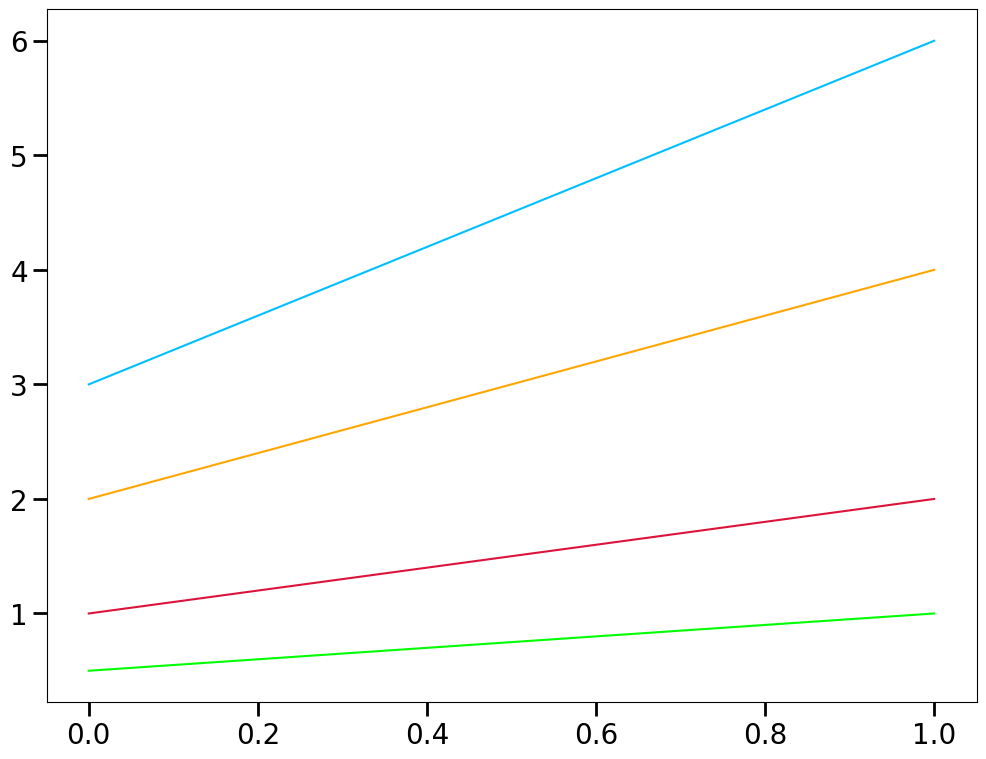

In [113]:
y1 = [3,6]
y2 = [2,4]
y3 = [1,2]
y4 = [0.5,1.0]

plt.plot(y1, color="deepskyblue")
plt.plot(y2, color="orange")
plt.plot(y3, color="crimson")
plt.plot(y4, color="lime")

## One vs Two Mode

/tmp/ipykernel_935099/4022472131.py:27: RuntimeWarning: divide by zero encountered in scalar power
  correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
/tmp/ipykernel_935099/4022472131.py:27: RuntimeWarning: divide by zero encountered in scalar power
  correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_935099/4022472131.py:27: RuntimeWarning: divide by zero encountered in scalar power
  correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\frac{dN}{dL_X}$ [(erg s$^{-1}$)$^{-1}$ cMpc$^{-3}$]')

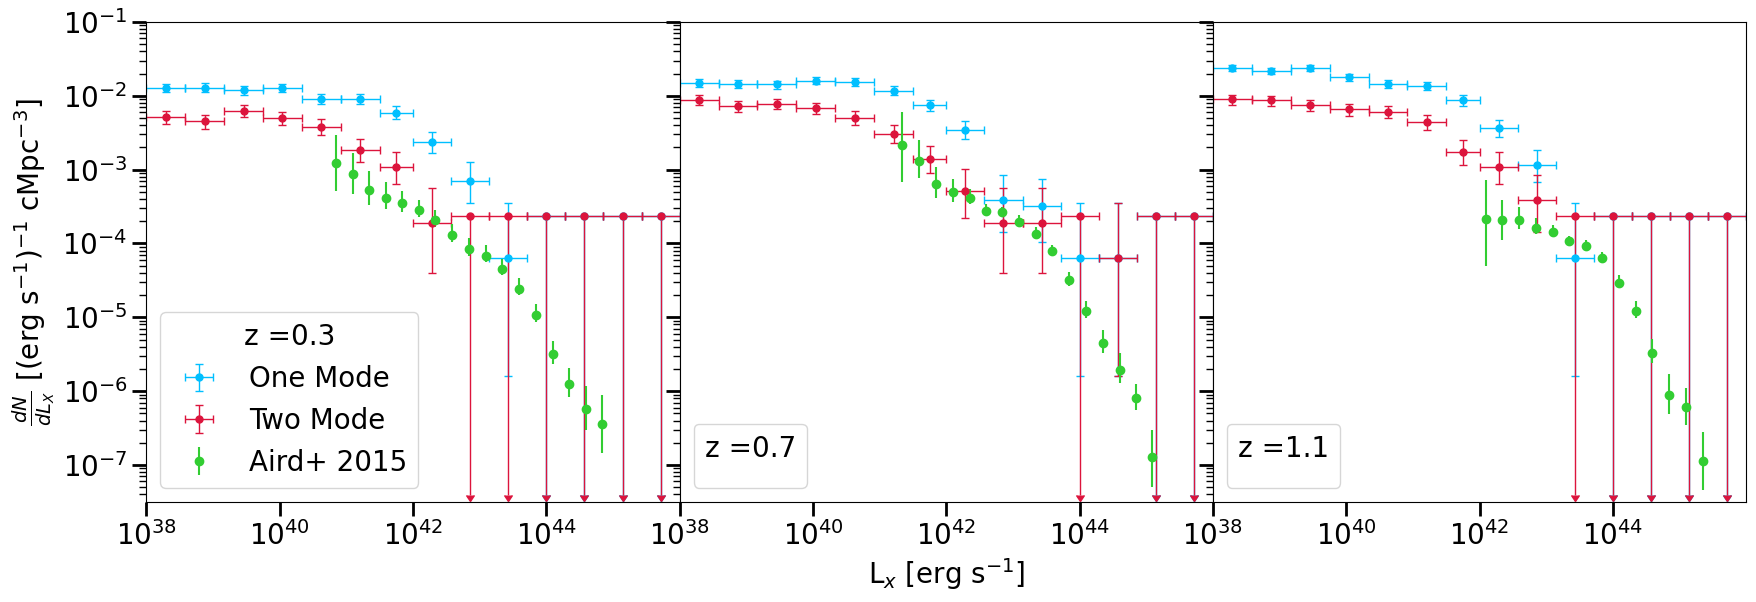

In [59]:
fig, ax = plt.subplots(1,3, figsize = (20,6), sharex=True, sharey=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0)

step = db.get_timestep("cosmo25/%6069")
redshift = step.redshift
bhid, mass, mdot = step.calculate_all('halo_number()', 'BH_mass', 'BH_mdot_ave')
mdot_edd = (1.26*10**31 * mass) /(0.1 * (3*10**8)**2) * 365*24*60*60 * 1/(2*10**30)


lum_one_mode = 0.1 * mdot * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7


lum_two_mode = []
for x in range(len(mdot)):
    if mdot[x]/mdot_edd[x] >= 0.1:
        lum_two_mode.append(lum_one_mode[x])
    else:
        frac = mdot[x]/mdot_edd[x]
        lum_two_mode.append(mdot[x]/mdot_edd[x] * 10 * lum_one_mode[x])
        
        
def get_correction_lumx_bh(lum_ergs_s):
    lum_ergs_s = np.array(lum_ergs_s)
    lum_sol = (np.divide(lum_ergs_s, (3.826*10**33)).astype(float))
    xray_lum_erg_s = []
    for count, item in enumerate(lum_sol):
        correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
        xray_lum_erg_s.append(lum_ergs_s[count]/correction_factor_hard)
    return xray_lum_erg_s
      
    
    
lum_one_mode = get_correction_lumx_bh(lum_one_mode)
lum_two_mode = get_correction_lumx_bh(lum_two_mode)


bins1 = np.logspace(38, 41.5, 7)
bins2 = np.logspace(42, 46, 8)
lum_bins = np.concatenate((bins1, bins2))
lum_one_mode_histo, _ = np.histogram(np.array(lum_one_mode), bins=lum_bins)
lum_two_mode_histo, _ = np.histogram(np.array(lum_two_mode), bins=lum_bins)


def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return ntrue/ntot - lo, hi - ntrue/ntot


lum_one_mode_errors = [[],[]]
lum_two_mode_errors = [[],[]]

for count, item in enumerate(lum_one_mode_histo):
    error_one_mode = binomial_errors(0.95, item, sum(lum_one_mode_histo))
    lum_one_mode_errors[0].append(error_one_mode[0] * sum(lum_one_mode_histo))
    lum_one_mode_errors[1].append(error_one_mode[1] * sum(lum_one_mode_histo))
    error_two_mode = binomial_errors(0.95, lum_two_mode_histo[count], sum(lum_two_mode_histo))
    lum_two_mode_errors[0].append(error_two_mode[0] * sum(lum_two_mode_histo))
    lum_two_mode_errors[1].append(error_two_mode[1] * sum(lum_two_mode_histo))
        


log_center_between_bins = np.sqrt(lum_bins[:-1] * lum_bins[1:])
ok = np.where(np.isnan(lum_one_mode_errors[0]) == False)[0]
ax[0].errorbar(log_center_between_bins[ok], np.divide(lum_one_mode_histo, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_one_mode_errors[0])[ok], 25**3), np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue", label="One Mode")
ok = np.where(np.isnan(lum_one_mode_errors[0]) == True)[0]
ax[0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_one_mode_histo, 25**3)[ok], np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_one_mode_histo, 25**3)[ok], np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_errors[0]) == False)[0]
ax[0].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson", label="Two Mode")
ok = np.where(np.isnan(lum_two_mode_errors[0]) == True)[0]
ax[0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo, 25**3)[ok], np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo, 25**3)[ok], np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[0].errorbar(aird_0_2__0_4[::2], aird_0_2__0_4[1::2], yerr = [aird_0_2__0_4[1::2] - aird_0_2__0_4_error_min[1::2], aird_0_2__0_4_error_max[1::2] - aird_0_2__0_4[1::2]], ls="", marker="o", color="limegreen", label = "Aird+ 2015")
ax[0].legend(loc="lower left", title="z =" + str("%0.1f" % redshift))



######################################################################################################
step = db.get_timestep("cosmo25/%4352")
redshift = step.redshift
bhid, mass, mdot = step.calculate_all('halo_number()', 'BH_mass', 'BH_mdot')
mdot_edd = (1.26*10**31 * mass) /(0.1 * (3*10**8)**2) * 365*24*60*60 * 1/(2*10**30)


lum_one_mode = 0.1 * mdot * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7


lum_two_mode = []
for x in range(len(mdot)):
    if mdot[x]/mdot_edd[x] >= 0.1:
        lum_two_mode.append(lum_one_mode[x])
    else:
        frac = mdot[x]/mdot_edd[x]
        lum_two_mode.append(mdot[x]/mdot_edd[x] * 10 * lum_one_mode[x])
        

      
    
    
lum_one_mode = get_correction_lumx_bh(lum_one_mode)
lum_two_mode = get_correction_lumx_bh(lum_two_mode)

lum_one_mode_histo, _ = np.histogram(np.array(lum_one_mode), bins=lum_bins)
lum_two_mode_histo, _ = np.histogram(np.array(lum_two_mode), bins=lum_bins)

lum_one_mode_errors = [[],[]]
lum_two_mode_errors = [[],[]]

for count, item in enumerate(lum_one_mode_histo):
    error_one_mode = binomial_errors(0.95, item, sum(lum_one_mode_histo))
    lum_one_mode_errors[0].append(error_one_mode[0] * sum(lum_one_mode_histo))
    lum_one_mode_errors[1].append(error_one_mode[1] * sum(lum_one_mode_histo))
    error_two_mode = binomial_errors(0.95, lum_two_mode_histo[count], sum(lum_two_mode_histo))
    lum_two_mode_errors[0].append(error_two_mode[0] * sum(lum_two_mode_histo))
    lum_two_mode_errors[1].append(error_two_mode[1] * sum(lum_two_mode_histo))
        


ok = np.where(np.isnan(lum_one_mode_errors[0]) == False)[0]
ax[1].errorbar(log_center_between_bins[ok], np.divide(lum_one_mode_histo, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_one_mode_errors[0])[ok], 25**3), np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_one_mode_errors[0]) == True)[0]
ax[1].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_one_mode_histo, 25**3)[ok], np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_one_mode_histo, 25**3)[ok], np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_errors[0]) == False)[0]
ax[1].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where(np.isnan(lum_two_mode_errors[0]) == True)[0]
ax[1].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo, 25**3)[ok], np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo, 25**3)[ok], np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[1].errorbar(aird_0_6__0_8[::2], aird_0_6__0_8[1::2], yerr = [aird_0_6__0_8[1::2] - aird_0_6__0_8_error_min[1::2], aird_0_6__0_8_error_max[1::2] - aird_0_6__0_8[1::2]], ls="", marker="o", color="limegreen")
ax[1].legend(loc="lower left", title="z =" + str("%0.1f" % redshift))






######################################################################################################
step = db.get_timestep("cosmo25/%3163")
redshift = step.redshift
bhid, mass, mdot = step.calculate_all('halo_number()', 'BH_mass', 'BH_mdot')
mdot_edd = (1.26*10**31 * mass) /(0.1 * (3*10**8)**2) * 365*24*60*60 * 1/(2*10**30)


lum_one_mode = 0.1 * mdot * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7


lum_two_mode = []
for x in range(len(mdot)):
    if mdot[x]/mdot_edd[x] >= 0.1:
        lum_two_mode.append(lum_one_mode[x])
    else:
        frac = mdot[x]/mdot_edd[x]
        lum_two_mode.append(mdot[x]/mdot_edd[x] * 10 * lum_one_mode[x])
        

      
    
    
lum_one_mode = get_correction_lumx_bh(lum_one_mode)
lum_two_mode = get_correction_lumx_bh(lum_two_mode)

lum_one_mode_histo, _ = np.histogram(np.array(lum_one_mode), bins=lum_bins)
lum_two_mode_histo, _ = np.histogram(np.array(lum_two_mode), bins=lum_bins)

lum_one_mode_errors = [[],[]]
lum_two_mode_errors = [[],[]]

for count, item in enumerate(lum_one_mode_histo):
    error_one_mode = binomial_errors(0.95, item, sum(lum_one_mode_histo))
    lum_one_mode_errors[0].append(error_one_mode[0] * sum(lum_one_mode_histo))
    lum_one_mode_errors[1].append(error_one_mode[1] * sum(lum_one_mode_histo))
    error_two_mode = binomial_errors(0.95, lum_two_mode_histo[count], sum(lum_two_mode_histo))
    lum_two_mode_errors[0].append(error_two_mode[0] * sum(lum_two_mode_histo))
    lum_two_mode_errors[1].append(error_two_mode[1] * sum(lum_two_mode_histo))
        


ok = np.where(np.isnan(lum_one_mode_errors[0]) == False)[0]
ax[2].errorbar(log_center_between_bins[ok], np.divide(lum_one_mode_histo, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_one_mode_errors[0])[ok], 25**3), np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_one_mode_errors[0]) == True)[0]
ax[2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_one_mode_histo, 25**3)[ok], np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_one_mode_histo, 25**3)[ok], np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_one_mode_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_errors[0]) == False)[0]
ax[2].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where(np.isnan(lum_two_mode_errors[0]) == True)[0]
ax[2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo, 25**3)[ok], np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo, 25**3)[ok], np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[2].errorbar(aird_1_0__1_2[::2], aird_1_0__1_2[1::2], yerr = [aird_1_0__1_2[1::2] - aird_1_0__1_2_error_min[1::2], aird_1_0__1_2_error_max[1::2] - aird_1_0__1_2[1::2]], ls="", marker="o", color="limegreen")
ax[2].legend(loc="lower left", title="z =" + str("%0.1f" % redshift))



ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1e38, 1e46)
ax[0].set_xticks(np.array([1e38, 1e40, 1e42, 1e44]))
ax[0].set_ylim(10**-7.5, 10**-1)
ax[1].set_xlabel(r"L$_x$ [erg s$^{-1}$]")
ax[0].set_ylabel(r"$\frac{dN}{dL_X}$ [(erg s$^{-1}$)$^{-1}$ cMpc$^{-3}$]")

## Affect of Averaging

/tmp/ipykernel_935099/4003273746.py:27: RuntimeWarning: divide by zero encountered in scalar power
  correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
/tmp/ipykernel_935099/4003273746.py:27: RuntimeWarning: divide by zero encountered in scalar power
  correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/tmp/ipykernel_935099/4003273746.py:27: RuntimeWarning: divide by zero encountered in scalar power
  correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0, 0.5, '$\\frac{dN}{dL_X}$ [(erg s$^{-1}$)$^{-1}$ cMpc$^{-3}$]')

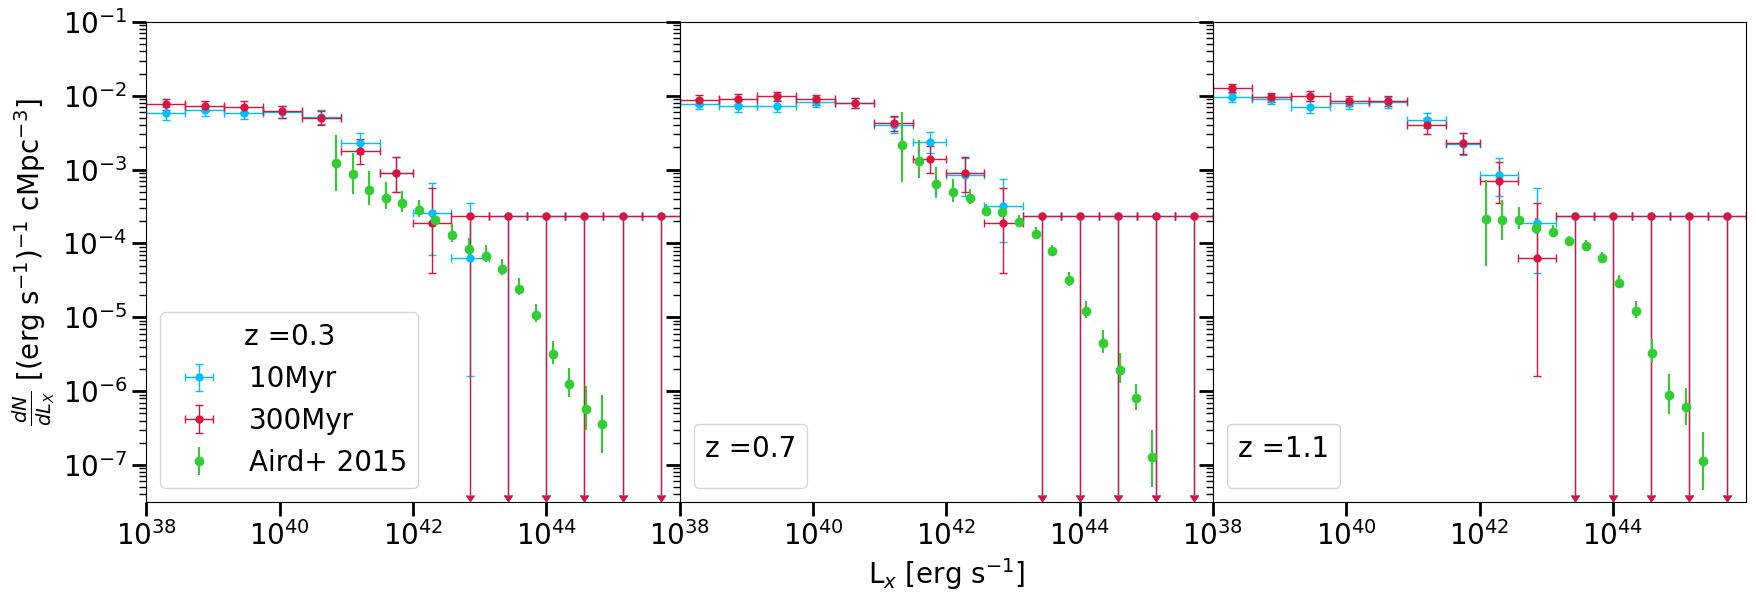

In [47]:
fig, ax = plt.subplots(1,3, figsize = (20,6), sharex=True, sharey=True)
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0)

step = db.get_timestep("cosmo25/%6069")
redshift = step.redshift
bhid, mass, mdot = step.calculate_all('halo_number()', 'BH_mass', 'BH_mdot_histogram_ave')
mdot_edd = (1.26*10**31 * mass) /(0.1 * (3*10**8)**2) * 365*24*60*60 * 1/(2*10**30)
lum_one_mode_10 = np.array([mdot[x][-1] for x in range(len(mdot))]) * 0.1 * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7
lum_one_mode_300 = np.array([sum(mdot[x][-30:])/30 for x in range(len(mdot))]) * 0.1 * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7


lum_two_mode_10 = []
lum_two_mode_300 = []
for x in range(len(mdot)):
    if mdot[x][-1]/mdot_edd[x] >= 0.1:
        lum_two_mode_10.append(lum_one_mode_10[x])
        lum_two_mode_300.append(lum_one_mode_300[x])
    else:
        lum_two_mode_10.append(mdot[x][-1]/mdot_edd[x] * 10 * lum_one_mode_10[x])
        lum_two_mode_300.append(mdot[x][-1]/mdot_edd[x] * 10 * lum_one_mode_300[x])
        
def get_correction_lumx_bh(lum_ergs_s):
    lum_ergs_s = np.array(lum_ergs_s)
    lum_sol = (np.divide(lum_ergs_s, (3.826*10**33)).astype(float))
    xray_lum_erg_s = []
    for count, item in enumerate(lum_sol):
        correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
        xray_lum_erg_s.append(lum_ergs_s[count]/correction_factor_hard)
    return xray_lum_erg_s
      
lum_two_mode_10 = get_correction_lumx_bh(lum_two_mode_10)
lum_two_mode_300 = get_correction_lumx_bh(lum_two_mode_300)


bins1 = np.logspace(38, 41.5, 7)
bins2 = np.logspace(42, 46, 8)
lum_bins = np.concatenate((bins1, bins2))
lum_two_mode_histo_10, _ = np.histogram(np.array(lum_two_mode_10), bins=lum_bins)
lum_two_mode_histo_300, _ = np.histogram(np.array(lum_two_mode_300), bins=lum_bins)


def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return ntrue/ntot - lo, hi - ntrue/ntot


lum_two_mode_10_errors = [[],[]]
lum_two_mode_300_errors = [[],[]]

for count, item in enumerate(lum_two_mode_histo_10):
    error_two_mode_10 = binomial_errors(0.95, lum_two_mode_histo_10[count], sum(lum_two_mode_histo_10))
    lum_two_mode_10_errors[0].append(error_two_mode_10[0] * sum(lum_two_mode_histo_10))
    lum_two_mode_10_errors[1].append(error_two_mode_10[1] * sum(lum_two_mode_histo_10))
    error_two_mode_300 = binomial_errors(0.95, lum_two_mode_histo_300[count], sum(lum_two_mode_histo_300))
    lum_two_mode_300_errors[0].append(error_two_mode_300[0] * sum(lum_two_mode_histo_300))
    lum_two_mode_300_errors[1].append(error_two_mode_300[1] * sum(lum_two_mode_histo_300))
        
        


log_center_between_bins = np.sqrt(lum_bins[:-1] * lum_bins[1:])
ok = np.where(np.isnan(lum_two_mode_10_errors[0]) == False)[0]
ax[0].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo_10, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_10_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue", label="10Myr")
ok = np.where(np.isnan(lum_two_mode_10_errors[0]) == True)[0]
ax[0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo_10, 25**3)[ok], np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo_10, 25**3)[ok], np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_300_errors[0]) == False)[0]
ax[0].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo_300, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_300_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson", label="300Myr")
ok = np.where(np.isnan(lum_two_mode_300_errors[0]) == True)[0]
ax[0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo_300, 25**3)[ok], np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo_300, 25**3)[ok], np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[0].errorbar(aird_0_2__0_4[::2], aird_0_2__0_4[1::2], yerr = [aird_0_2__0_4[1::2] - aird_0_2__0_4_error_min[1::2], aird_0_2__0_4_error_max[1::2] - aird_0_2__0_4[1::2]], ls="", marker="o", color="limegreen", label = "Aird+ 2015")
ax[0].legend(loc="lower left", title="z =" + str("%0.1f" % redshift))


############################################################################################
step = db.get_timestep("cosmo25/%4352")
redshift = step.redshift
bhid, mass, mdot = step.calculate_all('halo_number()', 'BH_mass', 'BH_mdot_histogram_ave')
mdot_edd = (1.26*10**31 * mass) /(0.1 * (3*10**8)**2) * 365*24*60*60 * 1/(2*10**30)
lum_one_mode_10 = np.array([mdot[x][-1] for x in range(len(mdot))]) * 0.1 * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7
lum_one_mode_300 = np.array([sum(mdot[x][-30:])/30 for x in range(len(mdot))]) * 0.1 * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7


lum_two_mode_10 = []
lum_two_mode_300 = []
for x in range(len(mdot)):
    if mdot[x][-1]/mdot_edd[x] >= 0.1:
        lum_two_mode_10.append(lum_one_mode_10[x])
        lum_two_mode_300.append(lum_one_mode_300[x])
    else:
        lum_two_mode_10.append(mdot[x][-1]/mdot_edd[x] * 10 * lum_one_mode_10[x])
        lum_two_mode_300.append(mdot[x][-1]/mdot_edd[x] * 10 * lum_one_mode_300[x])
        

lum_two_mode_10 = get_correction_lumx_bh(lum_two_mode_10)
lum_two_mode_300 = get_correction_lumx_bh(lum_two_mode_300)


lum_two_mode_histo_10, _ = np.histogram(np.array(lum_two_mode_10), bins=lum_bins)
lum_two_mode_histo_300, _ = np.histogram(np.array(lum_two_mode_300), bins=lum_bins)


lum_two_mode_10_errors = [[],[]]
lum_two_mode_300_errors = [[],[]]

for count, item in enumerate(lum_two_mode_histo_10):
    error_two_mode_10 = binomial_errors(0.95, lum_two_mode_histo_10[count], sum(lum_two_mode_histo_10))
    lum_two_mode_10_errors[0].append(error_two_mode_10[0] * sum(lum_two_mode_histo_10))
    lum_two_mode_10_errors[1].append(error_two_mode_10[1] * sum(lum_two_mode_histo_10))
    error_two_mode_300 = binomial_errors(0.95, lum_two_mode_histo_300[count], sum(lum_two_mode_histo_300))
    lum_two_mode_300_errors[0].append(error_two_mode_300[0] * sum(lum_two_mode_histo_300))
    lum_two_mode_300_errors[1].append(error_two_mode_300[1] * sum(lum_two_mode_histo_300))
        
        


ok = np.where(np.isnan(lum_two_mode_10_errors[0]) == False)[0]
ax[1].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo_10, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_10_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_10_errors[0]) == True)[0]
ax[1].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo_10, 25**3)[ok], np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo_10, 25**3)[ok], np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_300_errors[0]) == False)[0]
ax[1].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo_300, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_300_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where(np.isnan(lum_two_mode_300_errors[0]) == True)[0]
ax[1].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo_300, 25**3)[ok], np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo_300, 25**3)[ok], np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[1].errorbar(aird_0_6__0_8[::2], aird_0_6__0_8[1::2], yerr = [aird_0_6__0_8[1::2] - aird_0_6__0_8_error_min[1::2], aird_0_6__0_8_error_max[1::2] - aird_0_6__0_8[1::2]], ls="", marker="o", color="limegreen")
ax[1].legend(loc="lower left", title="z =" + str("%0.1f" % redshift))






############################################################################################
step = db.get_timestep("cosmo25/%3163")
redshift = step.redshift
bhid, mass, mdot = step.calculate_all('halo_number()', 'BH_mass', 'BH_mdot_histogram_ave')
mdot_edd = (1.26*10**31 * mass) /(0.1 * (3*10**8)**2) * 365*24*60*60 * 1/(2*10**30)
lum_one_mode_10 = np.array([mdot[x][-1] for x in range(len(mdot))]) * 0.1 * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7
lum_one_mode_300 = np.array([sum(mdot[x][-30:])/30 for x in range(len(mdot))]) * 0.1 * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7


lum_two_mode_10 = []
lum_two_mode_300 = []
for x in range(len(mdot)):
    if mdot[x][-1]/mdot_edd[x] >= 0.1:
        lum_two_mode_10.append(lum_one_mode_10[x])
        lum_two_mode_300.append(lum_one_mode_300[x])
    else:
        lum_two_mode_10.append(mdot[x][-1]/mdot_edd[x] * 10 * lum_one_mode_10[x])
        lum_two_mode_300.append(mdot[x][-1]/mdot_edd[x] * 10 * lum_one_mode_300[x])
        

lum_two_mode_10 = get_correction_lumx_bh(lum_two_mode_10)
lum_two_mode_300 = get_correction_lumx_bh(lum_two_mode_300)


lum_two_mode_histo_10, _ = np.histogram(np.array(lum_two_mode_10), bins=lum_bins)
lum_two_mode_histo_300, _ = np.histogram(np.array(lum_two_mode_300), bins=lum_bins)


lum_two_mode_10_errors = [[],[]]
lum_two_mode_300_errors = [[],[]]

for count, item in enumerate(lum_two_mode_histo_10):
    error_two_mode_10 = binomial_errors(0.95, lum_two_mode_histo_10[count], sum(lum_two_mode_histo_10))
    lum_two_mode_10_errors[0].append(error_two_mode_10[0] * sum(lum_two_mode_histo_10))
    lum_two_mode_10_errors[1].append(error_two_mode_10[1] * sum(lum_two_mode_histo_10))
    error_two_mode_300 = binomial_errors(0.95, lum_two_mode_histo_300[count], sum(lum_two_mode_histo_300))
    lum_two_mode_300_errors[0].append(error_two_mode_300[0] * sum(lum_two_mode_histo_300))
    lum_two_mode_300_errors[1].append(error_two_mode_300[1] * sum(lum_two_mode_histo_300))
        
        


ok = np.where(np.isnan(lum_two_mode_10_errors[0]) == False)[0]
ax[2].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo_10, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_10_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_10_errors[0]) == True)[0]
ax[2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo_10, 25**3)[ok], np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo_10, 25**3)[ok], np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_10_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.isnan(lum_two_mode_300_errors[0]) == False)[0]
ax[2].errorbar(log_center_between_bins[ok], np.divide(lum_two_mode_histo_300, 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_two_mode_300_errors[0])[ok], 25**3), np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where(np.isnan(lum_two_mode_300_errors[0]) == True)[0]
ax[2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_two_mode_histo_300, 25**3)[ok], np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_two_mode_histo_300, 25**3)[ok], np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_two_mode_300_errors[1])[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[2].errorbar(aird_1_0__1_2[::2], aird_1_0__1_2[1::2], yerr = [aird_1_0__1_2[1::2] - aird_1_0__1_2_error_min[1::2], aird_1_0__1_2_error_max[1::2] - aird_1_0__1_2[1::2]], ls="", marker="o", color="limegreen")
ax[2].legend(loc="lower left", title="z =" + str("%0.1f" % redshift))



ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].set_xlim(1e38, 1e46)
ax[0].set_xticks(np.array([1e38, 1e40, 1e42, 1e44]))
ax[0].set_ylim(10**-7.5, 10**-1)
ax[1].set_xlabel(r"L$_x$ [erg s$^{-1}$]")
ax[0].set_ylabel(r"$\frac{dN}{dL_X}$ [(erg s$^{-1}$)$^{-1}$ cMpc$^{-3}$]")

## BHILL's Property Distribution(Not used and Data Not Available)

In [2]:
f = open('./Data/BH_data_for_plots_all_2.pkl','rb')
BH_data = pickle.load(f)
f.close()
print(BH_data.keys())

f = open('./Data/Host_data_for_plots_all.pkl','rb')
Host_data = pickle.load(f)
f.close()
print(Host_data.keys())

dict_keys(['Lum hard 2 mode', 'Mass', 'Normalised Distance', 'Distance kpc'])
dict_keys(['SFR', 'Mstar', 'Mgas', 'Mvir', 'Host id', 'Host hard lum'])


In [6]:
# 0.2-0.4 = 1127-940
# 0.6-0.8 = 795-517
# 1.0-1.2 = 590-419
# 1.5-2.0 = 432-332
# 2.0-2.5 = 332-265
# 2.5-3.5 = 265-182
# 3.5-5.0 = 182-119

In [3]:
all_lum_data = []
all_distance_data = []
all_norm_distance_data = []
all_mass_data = []
all_ids = []
all_host_lum = []
all_sfr_data = []
all_mstar_data = []
all_mgas_data = []
all_ssfr_data = []
for count_tree, merger_tree in enumerate(BH_data['Lum hard 2 mode']):
    for BH_count, BH_histo in enumerate(merger_tree):
        all_lum_data.append(BH_data['Lum hard 2 mode'][count_tree][BH_count])
        all_distance_data.append(BH_data['Distance kpc'][count_tree][BH_count])
        all_norm_distance_data.append(BH_data['Normalised Distance'][count_tree][BH_count])
        all_mass_data.append(BH_data['Mass'][count_tree][BH_count])
        all_ids.append(Host_data['Host id'][count_tree][BH_count])
        all_host_lum.append(Host_data['Host hard lum'][count_tree][BH_count])
        all_sfr_data.append(Host_data['SFR'][count_tree][BH_count])
        all_mstar_data.append(Host_data['Mstar'][count_tree][BH_count])
        all_mgas_data.append(Host_data['Mgas'][count_tree][BH_count])
        if Host_data['SFR'][count_tree][BH_count] != -1 and Host_data['Mstar'][count_tree][BH_count] != -1:
            all_ssfr_data.append(np.divide(Host_data['SFR'][count_tree][BH_count], Host_data['Mstar'][count_tree][BH_count]))
        else:
            all_ssfr_data.append([-1,-1,-1,-1,-1])
        


def func_lum_func(begin_timestep, end_timestep, lum_bins, distance_bins, norm_distance_bins, mass_bins, ssfr_bins, mstar_bins):
    number_timesteps = end_timestep - begin_timestep
    add_element = 10/(number_timesteps * 10)
    lum_master_array = []
    distance_master_array = []
    norm_distance_master_array = []
    mass_master_array = []
    ssfr_master_array = []
    mstar_master_array = []
    for count, bh_lum_histo in enumerate(all_lum_data):
        if len(bh_lum_histo) >= end_timestep:
            current_histo = bh_lum_histo[begin_timestep:end_timestep]
            current_distances = all_distance_data[count][begin_timestep:end_timestep]
            current_norm_distances = all_norm_distance_data[count][begin_timestep:end_timestep]
            current_masses = all_mass_data[count][begin_timestep:end_timestep]
            current_ssfr = all_ssfr_data[count][begin_timestep:end_timestep]
            current_mstar = all_mstar_data[count][begin_timestep:end_timestep]
            for x, elem in enumerate(current_histo):
                lum_master_array.append(elem)
                distance_master_array.append(current_distances[x])
                norm_distance_master_array.append(current_norm_distances[x])
                mass_master_array.append(current_masses[x])
                ssfr_master_array.append(current_ssfr[x])
                mstar_master_array.append(current_mstar[x])
        elif len(bh_lum_histo) < end_timestep and len(bh_lum_histo) >= begin_timestep:
            current_histo = bh_lum_histo[begin_timestep:len(bh_lum_histo)]
            current_distances = all_distance_data[count][begin_timestep:len(bh_lum_histo)]
            current_norm_distances = all_norm_distance_data[count][begin_timestep:len(bh_lum_histo)]
            current_masses = all_mass_data[count][begin_timestep:len(bh_lum_histo)]
            current_ssfr = all_ssfr_data[count][begin_timestep:len(bh_lum_histo)]
            current_mstar = all_mstar_data[count][begin_timestep:len(bh_lum_histo)]
            for x, elem in enumerate(current_histo):
                lum_master_array.append(elem)
                distance_master_array.append(current_distances[x])
                norm_distance_master_array.append(current_norm_distances[x])
                mass_master_array.append(current_masses[x])
                ssfr_master_array.append(current_ssfr[x])
                mstar_master_array.append(current_mstar[x])
    low_lum = [np.where((np.array(lum_master_array) >=1e38) & (np.array(lum_master_array) <= 1e41))][0][0]
    for count, item in enumerate(ssfr_master_array):
        if item == 0:
            ssfr_master_array[count] = 1.1e-12
    return np.histogram(lum_master_array, lum_bins)[0] * add_element, np.histogram(np.array(distance_master_array)[low_lum], distance_bins)[0] * add_element, np.histogram(np.array(norm_distance_master_array)[np.where((np.array(lum_master_array) >=1e38) & (np.array(lum_master_array) <= 1e41) & (np.array(distance_master_array) > 1))], norm_distance_bins)[0] * add_element, np.histogram(np.array(mass_master_array)[low_lum], mass_bins)[0] * add_element, np.histogram(np.array(ssfr_master_array)[low_lum], ssfr_bins)[0] * add_element, np.histogram(np.array(mstar_master_array)[low_lum], mstar_bins)[0] * add_element



def func_lum_func_max_lum_outshine(begin_timestep, end_timestep, lum_bins, distance_bins, norm_distance_bins, mass_bins, ssfr_bins, mstar_bins):
    number_timesteps = end_timestep - begin_timestep
    add_element = 10/(number_timesteps * 10)
    lum_master_array1 = []
    distance_master_array1 = []
    norm_distance_master_array1 = []
    mass_master_array1 = []
    ssfr_master_array1 = []
    mstar_master_array1 = []
    lum_master_array2 = []
    distance_master_array2 = []
    norm_distance_master_array2 = []
    mass_master_array2 = []
    ssfr_master_array2 = []
    mstar_master_array2 = []
    for time in range(begin_timestep, end_timestep + 1):
        all_lum_elem_at_time = []
        all_halo_id_elem_at_time = []
        all_host_xray_lum_at_time = []
        all_distance_elem_at_time = []
        all_norm_distance_elem_at_time = []
        all_mass_elem_at_time = []
        all_ssfr_elem_at_time = []
        all_mstar_elem_at_time = []
        for count, bh in enumerate(all_lum_data):
            if len(bh) > time:
                all_lum_elem_at_time.append(bh[time])
                all_halo_id_elem_at_time.append(all_ids[count][time])
                all_host_xray_lum_at_time.append(all_host_lum[count][time])
                all_distance_elem_at_time.append(all_distance_data[count][time])
                all_norm_distance_elem_at_time.append(all_norm_distance_data[count][time])
                all_mass_elem_at_time.append(all_mass_data[count][time])
                all_ssfr_elem_at_time.append(all_ssfr_data[count][time])
                all_mstar_elem_at_time.append(all_mstar_data[count][time])
        unique_occupied_ids = np.unique(all_halo_id_elem_at_time)
        unique_max_lum_at_time = []
        unique_max_host_lum_at_time = []
        unique_max_distance_at_time = []
        unique_max_norm_distance_at_time = []
        unique_max_mass_at_time = []
        unique_max_ssfr_at_time = []
        unique_max_mstar_at_time = []
        for item in unique_occupied_ids:
            index_of_current_halo = []
            index_of_current_halo = np.where(all_halo_id_elem_at_time == item)
            max_index = np.argmax(np.array(all_lum_elem_at_time)[index_of_current_halo[0]])
            unique_max_host_lum_at_time.append(np.array(all_host_xray_lum_at_time)[index_of_current_halo[0]][max_index])
            unique_max_lum_at_time.append(np.array(all_lum_elem_at_time)[index_of_current_halo[0]][max_index])
            unique_max_distance_at_time.append(np.array(all_distance_elem_at_time)[index_of_current_halo[0]][max_index])
            unique_max_norm_distance_at_time.append(np.array(all_norm_distance_elem_at_time)[index_of_current_halo[0]][max_index])
            unique_max_mass_at_time.append(np.array(all_mass_elem_at_time)[index_of_current_halo[0]][max_index])
            unique_max_ssfr_at_time.append(np.array(all_ssfr_elem_at_time)[index_of_current_halo[0]][max_index])
            unique_max_mstar_at_time.append(np.array(all_mstar_elem_at_time)[index_of_current_halo[0]][max_index])
        for count, elem in enumerate(unique_max_lum_at_time):
            if elem >= 2 * unique_max_host_lum_at_time[count]:
                lum_master_array1.append(elem)
                lum_master_array2.append(elem)
                distance_master_array1.append(unique_max_distance_at_time[count])
                distance_master_array2.append(unique_max_distance_at_time[count])
                norm_distance_master_array1.append(unique_max_norm_distance_at_time[count])
                norm_distance_master_array2.append(unique_max_norm_distance_at_time[count])
                mass_master_array1.append(unique_max_mass_at_time[count])
                mass_master_array2.append(unique_max_mass_at_time[count])
                ssfr_master_array1.append(unique_max_ssfr_at_time[count])
                ssfr_master_array2.append(unique_max_ssfr_at_time[count])
                mstar_master_array1.append(unique_max_mstar_at_time[count])
                mstar_master_array2.append(unique_max_mstar_at_time[count])
            else:
                lum_master_array1.append(elem)
                distance_master_array1.append(unique_max_distance_at_time[count])
                norm_distance_master_array1.append(unique_max_norm_distance_at_time[count])
                mass_master_array1.append(unique_max_mass_at_time[count])
                ssfr_master_array1.append(unique_max_ssfr_at_time[count])
                mstar_master_array1.append(unique_max_mstar_at_time[count])
    low_lum1 = [np.where((np.array(lum_master_array1) >=1e38) & (np.array(lum_master_array1) <= 1e41))][0][0] 
    low_lum2 = [np.where((np.array(lum_master_array2) >=1e38) & (np.array(lum_master_array2) <= 1e41))][0][0]
    for count, item in enumerate(ssfr_master_array1):
        if item == 0:
            ssfr_master_array1[count] = 1.1e-12
    for count, item in enumerate(ssfr_master_array2):
        if item == 0:
            ssfr_master_array2[count] = 1.1e-12
    return [[np.histogram(lum_master_array1, bins=lum_bins)[0] * add_element, np.histogram(np.array(distance_master_array1)[low_lum1], distance_bins)[0] * add_element, np.histogram(np.array(norm_distance_master_array1)[np.where((np.array(lum_master_array1) >=1e38) & (np.array(lum_master_array1) <= 1e41) & (np.array(distance_master_array1) > 1))], norm_distance_bins)[0] * add_element, np.histogram(np.array(mass_master_array1)[low_lum1], mass_bins)[0] * add_element, np.histogram(np.array(ssfr_master_array1)[low_lum1], ssfr_bins)[0] * add_element, np.histogram(np.array(mstar_master_array1)[low_lum1], mstar_bins)[0] * add_element],
            [np.histogram(lum_master_array2, bins=lum_bins)[0] * add_element, np.histogram(np.array(distance_master_array2)[low_lum2], distance_bins)[0] * add_element, np.histogram(np.array(norm_distance_master_array2)[np.where((np.array(lum_master_array2) >=1e38) & (np.array(lum_master_array2) <= 1e41) & (np.array(distance_master_array2) > 1))], norm_distance_bins)[0] * add_element, np.histogram(np.array(mass_master_array2)[low_lum2], mass_bins)[0] * add_element, np.histogram(np.array(ssfr_master_array2)[low_lum2], ssfr_bins)[0] * add_element, np.histogram(np.array(mstar_master_array2)[low_lum2], mstar_bins)[0] * add_element]]




def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo,hi


# 0.2-0.4 = 1127-940
# 0.6-0.8 = 795-517
# 1.0-1.2 = 590-419
# 1.5-2.0 = 432-332
# 2.0-2.5 = 332-265
# 2.5-3.5 = 265-182
# 3.5-5.0 = 182-119

bins1 = np.logspace(38, 41.5, 7)
bins2 = np.logspace(42, 46, 8)
lum_bins = np.concatenate((bins1, bins2))
distance_bins = np.linspace(0, 60, 15)
norm_distance_bins = np.logspace(-2, 0.5, 15)
mass_bins = np.logspace(6, 11, 15)
ssfr_bins = np.logspace(-12, -7, 15)
mstar_bins = np.logspace(7, 13, 15)

lum_func = func_lum_func(419, 590, lum_bins, distance_bins, norm_distance_bins, mass_bins, ssfr_bins, mstar_bins)
lum_func_hist_error_max = []
lum_func_hist_error_min = []
distance_func_hist_error_max = []
distance_func_hist_error_min = []
norm_distance_func_hist_error_max = []
norm_distance_func_hist_error_min = []
mass_func_hist_error_max = []
mass_func_hist_error_min = []
ssfr_func_hist_error_max = []
ssfr_func_hist_error_min = []
mstar_func_hist_error_max = []
mstar_func_hist_error_min = []

data = func_lum_func_max_lum_outshine(419, 590, lum_bins, distance_bins, norm_distance_bins, mass_bins, ssfr_bins, mstar_bins)
lum_func_max_lum = data[0]
lum_func_max_lum_hist_error_max = []
lum_func_max_lum_hist_error_min = []
distance_func_max_lum_hist_error_max = []
distance_func_max_lum_hist_error_min = []
norm_distance_func_max_lum_hist_error_max = []
norm_distance_func_max_lum_hist_error_min = []
mass_func_max_lum_hist_error_max = []
mass_func_max_lum_hist_error_min = []
ssfr_func_max_lum_hist_error_max = []
ssfr_func_max_lum_hist_error_min = []
mstar_func_max_lum_hist_error_max = []
mstar_func_max_lum_hist_error_min = []


lum_func_max_lum_outshine = data[1]
lum_func_max_lum_outshine_hist_error_max = []
lum_func_max_lum_outshine_hist_error_min = []
distance_func_max_lum_outshine_hist_error_max = []
distance_func_max_lum_outshine_hist_error_min = []
norm_distance_func_max_lum_outshine_hist_error_max = []
norm_distance_func_max_lum_outshine_hist_error_min = []
mass_func_max_lum_outshine_hist_error_max = []
mass_func_max_lum_outshine_hist_error_min = []
ssfr_func_max_lum_outshine_hist_error_max = []
ssfr_func_max_lum_outshine_hist_error_min = []
mstar_func_max_lum_outshine_hist_error_max = []
mstar_func_max_lum_outshine_hist_error_min = []



for x in range(len(lum_func[0])):
    error_1 = binomial_errors(0.95, lum_func[0][x], sum(lum_func[0]))
    lum_func_hist_error_min.append(error_1[0] * sum(lum_func[0]))
    lum_func_hist_error_max.append(error_1[1] * sum(lum_func[0]))
    error_1_distance = binomial_errors(0.95, lum_func[1][x], sum(lum_func[1]))
    distance_func_hist_error_min.append(error_1_distance[0] * sum(lum_func[1]))
    distance_func_hist_error_max.append(error_1_distance[1] * sum(lum_func[1]))
    error_1_norm_distance = binomial_errors(0.95, lum_func[2][x], sum(lum_func[2]))
    norm_distance_func_hist_error_min.append(error_1_norm_distance[0] * sum(lum_func[2]))
    norm_distance_func_hist_error_max.append(error_1_norm_distance[1] * sum(lum_func[2]))
    error_1_mass = binomial_errors(0.95, lum_func[3][x], sum(lum_func[3]))
    mass_func_hist_error_min.append(error_1_mass[0] * sum(lum_func[3]))
    mass_func_hist_error_max.append(error_1_mass[1] * sum(lum_func[3]))
    error_1_ssfr = binomial_errors(0.95, lum_func[4][x], sum(lum_func[4]))
    ssfr_func_hist_error_min.append(error_1_ssfr[0] * sum(lum_func[4]))
    ssfr_func_hist_error_max.append(error_1_ssfr[1] * sum(lum_func[4]))
    error_1_mstar = binomial_errors(0.95, lum_func[5][x], sum(lum_func[5]))
    mstar_func_hist_error_min.append(error_1_mstar[0] * sum(lum_func[5]))
    mstar_func_hist_error_max.append(error_1_mstar[1] * sum(lum_func[5]))

    
    error_2 = binomial_errors(0.95, lum_func_max_lum[0][x], sum(lum_func_max_lum[0]))
    lum_func_max_lum_hist_error_min.append(error_2[0] * sum(lum_func_max_lum[0]))
    lum_func_max_lum_hist_error_max.append(error_2[1] * sum(lum_func_max_lum[0]))
    error_2_distance = binomial_errors(0.95, lum_func_max_lum[1][x], sum(lum_func_max_lum[1]))
    distance_func_max_lum_hist_error_min.append(error_2_distance[0] * sum(lum_func_max_lum[1]))
    distance_func_max_lum_hist_error_max.append(error_2_distance[1] * sum(lum_func_max_lum[1]))
    error_2_norm_distance = binomial_errors(0.95, lum_func_max_lum[2][x], sum(lum_func_max_lum[2]))
    norm_distance_func_max_lum_hist_error_min.append(error_2_norm_distance[0] * sum(lum_func_max_lum[2]))
    norm_distance_func_max_lum_hist_error_max.append(error_2_norm_distance[1] * sum(lum_func_max_lum[2]))
    error_2_mass = binomial_errors(0.95, lum_func_max_lum[3][x], sum(lum_func_max_lum[3]))
    mass_func_max_lum_hist_error_min.append(error_2_mass[0] * sum(lum_func_max_lum[3]))
    mass_func_max_lum_hist_error_max.append(error_2_mass[1] * sum(lum_func_max_lum[3]))
    error_2_ssfr = binomial_errors(0.95, lum_func_max_lum[4][x], sum(lum_func_max_lum[4]))
    ssfr_func_max_lum_hist_error_min.append(error_2_ssfr[0] * sum(lum_func_max_lum[4]))
    ssfr_func_max_lum_hist_error_max.append(error_2_ssfr[1] * sum(lum_func_max_lum[4]))
    error_2_mstar = binomial_errors(0.95, lum_func_max_lum[5][x], sum(lum_func_max_lum[5]))
    mstar_func_max_lum_hist_error_min.append(error_2_mstar[0] * sum(lum_func_max_lum[5]))
    mstar_func_max_lum_hist_error_max.append(error_2_mstar[1] * sum(lum_func_max_lum[5]))
    
    error_3 = binomial_errors(0.95, lum_func_max_lum_outshine[0][x], sum(lum_func_max_lum_outshine[0]))
    lum_func_max_lum_outshine_hist_error_min.append(error_3[0] * sum(lum_func_max_lum_outshine[0]))
    lum_func_max_lum_outshine_hist_error_max.append(error_3[1] * sum(lum_func_max_lum_outshine[0]))
    error_3_distance = binomial_errors(0.95, lum_func_max_lum_outshine[1][x], sum(lum_func_max_lum_outshine[1]))
    distance_func_max_lum_outshine_hist_error_min.append(error_3_distance[0] * sum(lum_func_max_lum_outshine[1]))
    distance_func_max_lum_outshine_hist_error_max.append(error_3_distance[1] * sum(lum_func_max_lum_outshine[1]))
    error_3_norm_distance = binomial_errors(0.95, lum_func_max_lum_outshine[2][x], sum(lum_func_max_lum_outshine[2]))
    norm_distance_func_max_lum_outshine_hist_error_min.append(error_3_norm_distance[0] * sum(lum_func_max_lum_outshine[2]))
    norm_distance_func_max_lum_outshine_hist_error_max.append(error_3_norm_distance[1] * sum(lum_func_max_lum_outshine[2]))
    error_3_mass = binomial_errors(0.95, lum_func_max_lum_outshine[3][x], sum(lum_func_max_lum_outshine[3]))
    mass_func_max_lum_outshine_hist_error_min.append(error_3_mass[0] * sum(lum_func_max_lum_outshine[3]))
    mass_func_max_lum_outshine_hist_error_max.append(error_3_mass[1] * sum(lum_func_max_lum_outshine[3]))
    error_3_ssfr = binomial_errors(0.95, lum_func_max_lum_outshine[4][x], sum(lum_func_max_lum_outshine[4]))
    ssfr_func_max_lum_outshine_hist_error_min.append(error_3_ssfr[0] * sum(lum_func_max_lum_outshine[4]))
    ssfr_func_max_lum_outshine_hist_error_max.append(error_3_ssfr[1] * sum(lum_func_max_lum_outshine[4]))
    error_3_mstar = binomial_errors(0.95, lum_func_max_lum_outshine[5][x], sum(lum_func_max_lum_outshine[5]))
    mstar_func_max_lum_outshine_hist_error_min.append(error_3_mstar[0] * sum(lum_func_max_lum_outshine[5]))
    mstar_func_max_lum_outshine_hist_error_max.append(error_3_mstar[1] * sum(lum_func_max_lum_outshine[5]))

    
    
# error = 10**-4 * 25**3
# for x in range(len(lum_func[0])):
#     if lum_func_hist_error_min[x] < error:
#         lum_func_hist_error_min[x] = lum_func[0][x]
#     if mass_func_hist_error_min[x] < error:
#         lum_func[1][x] = 0
#     if distance_func_hist_error_min[x] < error:
#         lum_func[2][x] = 0
#     if sfr_func_hist_error_min[x] < SFR_err:
#         lum_func[3][x] = 0
#     if mstar_func_hist_error_min[x] < Mstar_err:
#         lum_func[4][x] = 0
#     if mgas_func_hist_error_min[x] < Mgas_err:
#         lum_func[5][x] = 0
#     if lum_func_max_lum_hist_error_min[x] < lum_err:
#         lum_func_max_lum[0][x] = 0
#     if mass_func_max_lum_hist_error_min[x] < BH_mass_err:
#         lum_func_max_lum[1][x] = 0
#     if distance_func_max_lum_hist_error_min[x] < dist_err:
#         lum_func_max_lum[2][x] = 0
#     if sfr_func_max_lum_hist_error_min[x] < SFR_err:
#         lum_func_max_lum[3][x] = 0
#     if mstar_func_max_lum_hist_error_min[x] < Mstar_err:
#         lum_func_max_lum[4][x] = 0
#     if mgas_func_max_lum_hist_error_min[x] < Mgas_err:
#         lum_func_max_lum[5][x] = 0
#     if lum_func_max_lum_outshine_hist_error_min[x] < lum_err:
#         lum_func_max_lum_outshine[0][x] = 0
#     if mass_func_max_lum_outshine_hist_error_min[x] < BH_mass_err:
#         lum_func_max_lum_outshine[1][x] = 0
#     if distance_func_max_lum_outshine_hist_error_min[x] < dist_err:
#         lum_func_max_lum_outshine[2][x] = 0
#     if sfr_func_max_lum_outshine_hist_error_min[x] < SFR_err:
#         lum_func_max_lum_outshine[3][x] = 0
#     if mstar_func_max_lum_outshine_hist_error_min[x] < Mstar_err:
#         lum_func_max_lum_outshine[4][x] = 0
#     if mgas_func_max_lum_outshine_hist_error_min[x] < Mgas_err:
#         lum_func_max_lum_outshine[5][x] = 0

Text(0, 0.5, '$\\phi$(M$_{star}$) [M$_{\\odot}^{-1}$ cMpc$^{-3}$]')

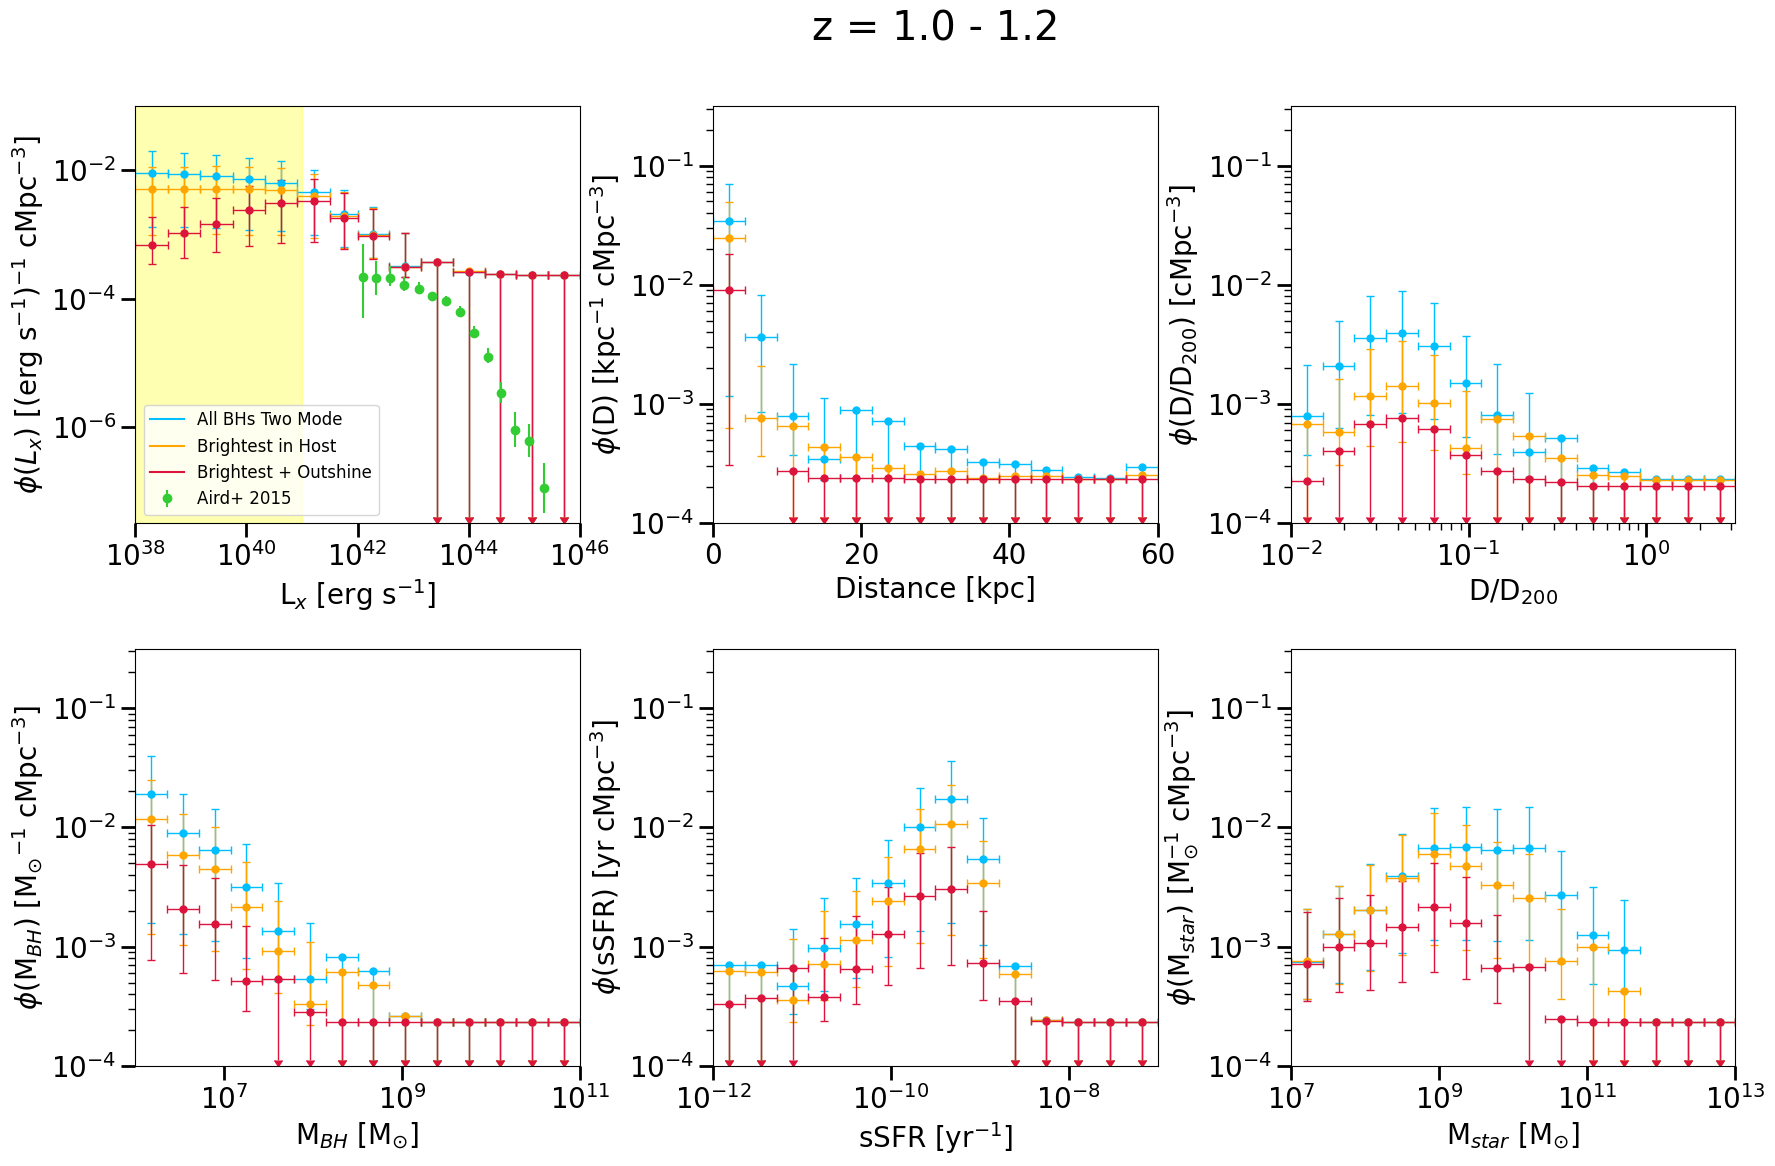

In [ ]:
error = 10**-4 * 25**3
fig, ax = plt.subplots(2,3, figsize = (20,12))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.3, hspace=0.3)
st = fig.suptitle("z = 1.0 - 1.2", fontsize="x-large")
#######################################################################################################################
ax[0,0].plot([0,1],[0,1], label = "All BHs Two Mode", color = "deepskyblue")
ok = np.where(np.array(lum_func_hist_error_min) > error)[0]
log_center_between_bins = np.sqrt(lum_bins[:-1] * lum_bins[1:])
ax[0,0].errorbar(log_center_between_bins[ok], np.divide(lum_func[0], 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_func_hist_error_min)[ok], 25**3), np.divide(np.array(lum_func_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where((np.array(lum_func_hist_error_min) <= error) | (np.isnan(lum_func_hist_error_min)))[0]
ax[0,0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func[0], 25**3)[ok], np.divide(np.array(lum_func_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func[0], 25**3)[ok], np.divide(np.array(lum_func_hist_error_max)[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_func_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ax[0,0].plot([0,1],[0,1], label = "Brightest in Host", color = "orange")
ok = np.where(np.array(lum_func_max_lum_hist_error_min) > error)[0]
ax[0,0].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum[0], 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_func_max_lum_hist_error_min)[ok], 25**3), np.divide(np.array(lum_func_max_lum_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where((np.array(lum_func_max_lum_hist_error_min) <= error) | (np.isnan(lum_func_max_lum_hist_error_min)))[0]
ax[0,0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum[0], 25**3)[ok], np.divide(np.array(lum_func_max_lum_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum[0], 25**3)[ok], np.divide(np.array(lum_func_max_lum_hist_error_max)[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_func_max_lum_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ax[0,0].plot([0,1],[0,1], label = "Brightest + Outshine", color = "crimson")
ok = np.where(np.array(lum_func_max_lum_outshine_hist_error_min) > error)[0]
ax[0,0].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum_outshine[0], 25**3)[ok], xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(lum_func_max_lum_outshine_hist_error_min)[ok], 25**3), np.divide(np.array(lum_func_max_lum_outshine_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where((np.array(lum_func_max_lum_outshine_hist_error_min) <= error) | (np.isnan(lum_func_max_lum_outshine_hist_error_min)))[0]
ax[0,0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum_outshine[0], 25**3)[ok], np.divide(np.array(lum_func_max_lum_outshine_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - lum_bins[ok], lum_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum_outshine[0], 25**3)[ok], np.divide(np.array(lum_func_max_lum_outshine_hist_error_max)[ok], 25**3)) - 10**-7.4, np.divide(np.array(lum_func_max_lum_outshine_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[0,0].errorbar(aird_1_0__1_2[::2], aird_1_0__1_2[1::2], yerr = [aird_1_0__1_2[1::2] - aird_1_0__1_2_error_min[1::2], aird_1_0__1_2_error_max[1::2] - aird_1_0__1_2[1::2]], ls="", marker="o", color="limegreen", label = "Aird+ 2015")


ax[0,0].axvspan(1e38, 1e41, color='yellow', alpha=0.3)
ax[0,0].set_xscale("log")
ax[0,0].set_yscale("log")
ax[0,0].set_xlim(1e38, 1e46)
ax[0,0].set_ylim(10**-7.5, 10**-1)
ax[0,0].set_xlabel(r"L$_x$ [erg s$^{-1}$]")
ax[0,0].set_ylabel(r"$\phi(L_x)$ [(erg s$^{-1}$)$^{-1}$ cMpc$^{-3}$]")
ax[0,0].legend(loc="lower left", fontsize=12)


#######################################################################################################################
center_between_bins = (distance_bins[1:] + distance_bins[:-1])/2
ok = np.where(np.array(distance_func_hist_error_min) > error)[0]
ax[0,1].errorbar(center_between_bins[ok], np.divide(lum_func[1], 25**3)[ok], xerr=[center_between_bins[ok] - distance_bins[ok], distance_bins[ok + 1] - center_between_bins[ok]], yerr=[np.divide(np.array(distance_func_hist_error_min), 25**3)[ok], np.divide(np.array(distance_func_hist_error_max), 25**3)[ok]], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where((np.array(distance_func_hist_error_min) <= error) | (np.isnan(distance_func_hist_error_min)))[0]
ax[0,1].errorbar(center_between_bins[ok], np.add(np.divide(lum_func[1], 25**3)[ok], np.divide(np.array(distance_func_hist_error_max)[ok], 25**3)), xerr=[center_between_bins[ok] - distance_bins[ok], distance_bins[ok + 1] - center_between_bins[ok]], yerr=[np.add(np.divide(lum_func[1], 25**3)[ok], np.divide(np.array(distance_func_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(lum_func_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.array(distance_func_max_lum_hist_error_min) > error)[0]
ax[0,1].errorbar(center_between_bins[ok], np.divide(lum_func_max_lum[1], 25**3)[ok], xerr=[center_between_bins[ok] - distance_bins[ok], distance_bins[ok + 1] - center_between_bins[ok]], yerr=[np.divide(np.array(distance_func_max_lum_hist_error_min), 25**3)[ok], np.divide(np.array(distance_func_max_lum_hist_error_max), 25**3)[ok]], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where((np.array(distance_func_max_lum_hist_error_min) <= error) | (np.isnan(distance_func_max_lum_hist_error_min)))[0]
ax[0,1].errorbar(center_between_bins[ok], np.add(np.divide(lum_func_max_lum[1], 25**3)[ok], np.divide(np.array(distance_func_max_lum_hist_error_max)[ok], 25**3)), xerr=[center_between_bins[ok] - distance_bins[ok], distance_bins[ok + 1] - center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum[1], 25**3)[ok], np.divide(np.array(distance_func_max_lum_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(distance_func_max_lum_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where(np.array(distance_func_max_lum_outshine_hist_error_min) > error)[0]
ax[0,1].errorbar(center_between_bins[ok], np.divide(lum_func_max_lum_outshine[1], 25**3)[ok], xerr=[center_between_bins[ok] - distance_bins[ok], distance_bins[ok + 1] - center_between_bins[ok]], yerr=[np.divide(np.array(distance_func_max_lum_outshine_hist_error_min), 25**3)[ok], np.divide(np.array(distance_func_max_lum_outshine_hist_error_max), 25**3)[ok]], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where((np.array(distance_func_max_lum_hist_error_min) <= error) | (np.isnan(distance_func_max_lum_hist_error_min)))[0]
ax[0,1].errorbar(center_between_bins[ok], np.add(np.divide(lum_func_max_lum_outshine[1], 25**3)[ok], np.divide(np.array(distance_func_max_lum_outshine_hist_error_max)[ok], 25**3)), xerr=[center_between_bins[ok] - distance_bins[ok], distance_bins[ok + 1] - center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum_outshine[1], 25**3)[ok], np.divide(np.array(distance_func_max_lum_outshine_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(distance_func_max_lum_outshine_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[0,1].set_yscale("log")
ax[0,1].set_xlim(0, 60)
ax[0,1].set_ylim(1e-4, 10**-0.5)
ax[0,1].set_xlabel(r"Distance [kpc]")
ax[0,1].set_ylabel(r"$\phi$(D) [kpc$^{-1}$ cMpc$^{-3}$]")


#######################################################################################################################
log_center_between_bins = np.sqrt(norm_distance_bins[:-1] * norm_distance_bins[1:])
ok = np.where(np.array(norm_distance_func_hist_error_min) > error)[0]
ax[0,2].errorbar(log_center_between_bins[ok], np.divide(lum_func[2], 25**3)[ok], xerr=[log_center_between_bins[ok] - norm_distance_bins[ok], norm_distance_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(norm_distance_func_hist_error_min)[ok], 25**3), np.divide(np.array(norm_distance_func_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where((np.array(norm_distance_func_hist_error_min) <= error) | (np.isnan(norm_distance_func_hist_error_min)))[0]
ax[0,2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func[2], 25**3)[ok], np.divide(np.array(norm_distance_func_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - norm_distance_bins[ok], norm_distance_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func[2], 25**3)[ok], np.divide(np.array(norm_distance_func_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(norm_distance_func_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.array(norm_distance_func_max_lum_hist_error_min) > error)[0]
ax[0,2].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum[2], 25**3)[ok], xerr=[log_center_between_bins[ok] - norm_distance_bins[ok], norm_distance_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(norm_distance_func_max_lum_hist_error_min)[ok], 25**3), np.divide(np.array(norm_distance_func_max_lum_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where((np.array(norm_distance_func_max_lum_hist_error_min) <= error) | (np.isnan(norm_distance_func_max_lum_hist_error_min)))[0]
ax[0,2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum[2], 25**3)[ok], np.divide(np.array(norm_distance_func_max_lum_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - norm_distance_bins[ok], norm_distance_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum[2], 25**3)[ok], np.divide(np.array(norm_distance_func_max_lum_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(norm_distance_func_max_lum_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where(np.array(norm_distance_func_max_lum_outshine_hist_error_min) > error)[0]
ax[0,2].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum_outshine[2], 25**3)[ok], xerr=[log_center_between_bins[ok] - norm_distance_bins[ok], norm_distance_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(norm_distance_func_max_lum_outshine_hist_error_min)[ok], 25**3), np.divide(np.array(norm_distance_func_max_lum_outshine_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where((np.array(norm_distance_func_max_lum_outshine_hist_error_min) <= error) | (np.isnan(norm_distance_func_max_lum_outshine_hist_error_min)))[0]
ax[0,2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum_outshine[2], 25**3)[ok], np.divide(np.array(norm_distance_func_max_lum_outshine_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - norm_distance_bins[ok], norm_distance_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum_outshine[2], 25**3)[ok], np.divide(np.array(norm_distance_func_max_lum_outshine_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(norm_distance_func_max_lum_outshine_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[0,2].set_xscale("log")
ax[0,2].set_yscale("log")
ax[0,2].set_xlim(10**-2, 10**0.5)
ax[0,2].set_ylim(1e-4, 10**-0.5)
ax[0,2].set_xlabel(r"D/D$_{200}$")
ax[0,2].set_ylabel(r"$\phi$(D/D$_{200}$) [cMpc$^{-3}$]")




#######################################################################################################################
log_center_between_bins = np.sqrt(mass_bins[:-1] * mass_bins[1:])
ok = np.where(np.array(mass_func_hist_error_min) > error)[0]
ax[1,0].errorbar(log_center_between_bins[ok], np.divide(lum_func[3], 25**3)[ok], xerr=[log_center_between_bins[ok] - mass_bins[ok], mass_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(mass_func_hist_error_min)[ok], 25**3), np.divide(np.array(mass_func_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where((np.array(mass_func_hist_error_min) <= error) | (np.isnan(mass_func_hist_error_min)))[0]
ax[1,0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func[3], 25**3)[ok], np.divide(np.array(mass_func_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - mass_bins[ok], mass_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func[3], 25**3)[ok], np.divide(np.array(mass_func_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(mass_func_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.array(mass_func_max_lum_hist_error_min) > error)[0]
ax[1,0].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum[3], 25**3)[ok], xerr=[log_center_between_bins[ok] - mass_bins[ok], mass_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(mass_func_max_lum_hist_error_min)[ok], 25**3), np.divide(np.array(mass_func_max_lum_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where((np.array(mass_func_max_lum_hist_error_min) <= error) | (np.isnan(mass_func_max_lum_hist_error_min)))[0]
ax[1,0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum[3], 25**3)[ok], np.divide(np.array(mass_func_max_lum_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - mass_bins[ok], mass_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum[3], 25**3)[ok], np.divide(np.array(mass_func_max_lum_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(mass_func_max_lum_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where(np.array(mass_func_max_lum_outshine_hist_error_min) > error)[0]
ax[1,0].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum_outshine[3], 25**3)[ok], xerr=[log_center_between_bins[ok] - mass_bins[ok], mass_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(mass_func_max_lum_outshine_hist_error_min)[ok], 25**3), np.divide(np.array(mass_func_max_lum_outshine_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where((np.array(mass_func_max_lum_outshine_hist_error_min) <= error) | (np.isnan(mass_func_max_lum_outshine_hist_error_min)))[0]
ax[1,0].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum_outshine[3], 25**3)[ok], np.divide(np.array(mass_func_max_lum_outshine_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - mass_bins[ok], mass_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum_outshine[3], 25**3)[ok], np.divide(np.array(mass_func_max_lum_outshine_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(mass_func_max_lum_outshine_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[1,0].set_xscale("log")
ax[1,0].set_yscale("log")
ax[1,0].set_xlim(1e6, 1e11)
ax[1,0].set_ylim(1e-4, 10**-0.5)
ax[1,0].set_xlabel(r"M$_{BH}$ [M$_{\odot}$]")
ax[1,0].set_ylabel(r"$\phi$(M$_{BH}$) [M$_{\odot}$$^{-1}$ cMpc$^{-3}$]")





#######################################################################################################################
log_center_between_bins = np.sqrt(ssfr_bins[:-1] * ssfr_bins[1:])
ok = np.where(np.array(ssfr_func_hist_error_min) > error)[0]
ax[1,1].errorbar(log_center_between_bins[ok], np.divide(lum_func[4], 25**3)[ok], xerr=[log_center_between_bins[ok] - ssfr_bins[ok], ssfr_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(ssfr_func_hist_error_min)[ok], 25**3), np.divide(np.array(ssfr_func_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where((np.array(ssfr_func_hist_error_min) <= error) | (np.isnan(ssfr_func_hist_error_min)))[0]
ax[1,1].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func[4], 25**3)[ok], np.divide(np.array(ssfr_func_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - ssfr_bins[ok], ssfr_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func[4], 25**3)[ok], np.divide(np.array(ssfr_func_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(ssfr_func_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.array(ssfr_func_max_lum_hist_error_min) > error)[0]
ax[1,1].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum[4], 25**3)[ok], xerr=[log_center_between_bins[ok] - ssfr_bins[ok], ssfr_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(ssfr_func_max_lum_hist_error_min)[ok], 25**3), np.divide(np.array(ssfr_func_max_lum_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where((np.array(ssfr_func_max_lum_hist_error_min) <= error) | (np.isnan(ssfr_func_max_lum_hist_error_min)))[0]
ax[1,1].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum[4], 25**3)[ok], np.divide(np.array(ssfr_func_max_lum_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - ssfr_bins[ok], ssfr_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum[4], 25**3)[ok], np.divide(np.array(ssfr_func_max_lum_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(ssfr_func_max_lum_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where(np.array(ssfr_func_max_lum_outshine_hist_error_min) > error)[0]
ax[1,1].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum_outshine[4], 25**3)[ok], xerr=[log_center_between_bins[ok] - ssfr_bins[ok], ssfr_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(ssfr_func_max_lum_outshine_hist_error_min)[ok], 25**3), np.divide(np.array(ssfr_func_max_lum_outshine_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where((np.array(ssfr_func_max_lum_outshine_hist_error_min) <= error) | (np.isnan(ssfr_func_max_lum_outshine_hist_error_min)))[0]
ax[1,1].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum_outshine[4], 25**3)[ok], np.divide(np.array(ssfr_func_max_lum_outshine_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - ssfr_bins[ok], ssfr_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum_outshine[4], 25**3)[ok], np.divide(np.array(ssfr_func_max_lum_outshine_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(ssfr_func_max_lum_outshine_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[1,1].set_xscale("log")
ax[1,1].set_yscale("log")
ax[1,1].set_xlim(1e-12, 1e-7)
ax[1,1].set_ylim(1e-4, 10**-0.5)
ax[1,1].set_xlabel(r"sSFR [yr$^{-1}$]")
ax[1,1].set_ylabel(r"$\phi$(sSFR) [yr cMpc$^{-3}$]")






#######################################################################################################################
log_center_between_bins = np.sqrt(mstar_bins[:-1] * mstar_bins[1:])
ok = np.where(np.array(mstar_func_hist_error_min) > error)[0]
ax[1,2].errorbar(log_center_between_bins[ok], np.divide(lum_func[5], 25**3)[ok], xerr=[log_center_between_bins[ok] - mstar_bins[ok], mstar_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(mstar_func_hist_error_min)[ok], 25**3), np.divide(np.array(mstar_func_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where((np.array(mstar_func_hist_error_min) <= error) | (np.isnan(mstar_func_hist_error_min)))[0]
ax[1,2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func[5], 25**3)[ok], np.divide(np.array(mstar_func_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - mstar_bins[ok], mstar_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func[5], 25**3)[ok], np.divide(np.array(mstar_func_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(mstar_func_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "deepskyblue")
ok = np.where(np.array(mstar_func_max_lum_hist_error_min) > error)[0]
ax[1,2].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum[5], 25**3)[ok], xerr=[log_center_between_bins[ok] - mstar_bins[ok], mstar_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(mstar_func_max_lum_hist_error_min)[ok], 25**3), np.divide(np.array(mstar_func_max_lum_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where((np.array(mstar_func_max_lum_hist_error_min) <= error) | (np.isnan(mstar_func_max_lum_hist_error_min)))[0]
ax[1,2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum[5], 25**3)[ok], np.divide(np.array(mstar_func_max_lum_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - mstar_bins[ok], mstar_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum[5], 25**3)[ok], np.divide(np.array(mstar_func_max_lum_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(mstar_func_max_lum_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "orange")
ok = np.where(np.array(mstar_func_max_lum_outshine_hist_error_min) > error)[0]
ax[1,2].errorbar(log_center_between_bins[ok], np.divide(lum_func_max_lum_outshine[5], 25**3)[ok], xerr=[log_center_between_bins[ok] - mstar_bins[ok], mstar_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.divide(np.array(mstar_func_max_lum_outshine_hist_error_min)[ok], 25**3), np.divide(np.array(mstar_func_max_lum_outshine_hist_error_max)[ok], 25**3)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ok = np.where((np.array(mstar_func_max_lum_outshine_hist_error_min) <= error) | (np.isnan(mstar_func_max_lum_outshine_hist_error_min)))[0]
ax[1,2].errorbar(log_center_between_bins[ok], np.add(np.divide(lum_func_max_lum_outshine[5], 25**3)[ok], np.divide(np.array(mstar_func_max_lum_outshine_hist_error_max)[ok], 25**3)), xerr=[log_center_between_bins[ok] - mstar_bins[ok], mstar_bins[ok + 1] - log_center_between_bins[ok]], yerr=[np.add(np.divide(lum_func_max_lum_outshine[5], 25**3)[ok], np.divide(np.array(mstar_func_max_lum_outshine_hist_error_max)[ok], 25**3)) - 10**-3.95, np.divide(np.array(mstar_func_max_lum_outshine_hist_error_max)[ok], 25**3)], uplims=True, fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color = "crimson")
ax[1,2].set_xscale("log")
ax[1,2].set_yscale("log")
ax[1,2].set_xlim(1e7, 1e13)
ax[1,2].set_ylim(1e-4, 10**-0.5)
ax[1,2].set_xlabel(r"M$_{star}$ [M$_{\odot}$]")
ax[1,2].set_ylabel(r"$\phi$(M$_{star}$) [M$_{\odot}^{-1}$ cMpc$^{-3}$]")

## BHILL's Property Distribution(Used)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


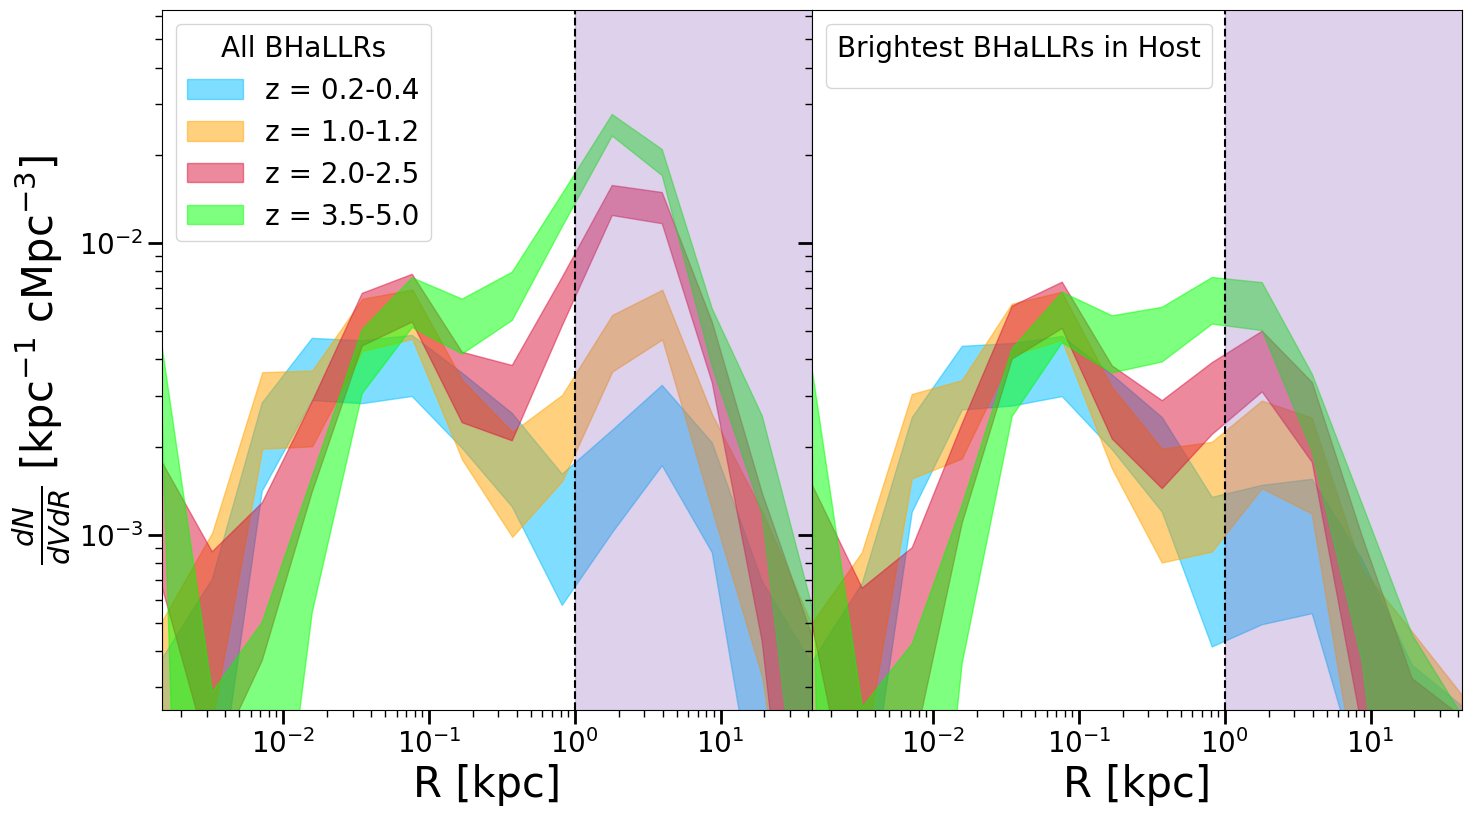

In [13]:
f = open('./Distribution Data/Lum_func_histograms.pkl','rb')
lum_data = pickle.load(f)
f.close()

f = open('./Distribution Data/Mass_func_histograms.pkl','rb')
mass_data = pickle.load(f)
f.close()

f = open('./Distribution Data/Distance_func_histograms.pkl','rb')
dist_data = pickle.load(f)
f.close()

f = open('./Distribution Data//Normalised_distance_func_histograms.pkl','rb')
norm_dist_data = pickle.load(f)
f.close()

f = open('./Distribution Data/Mstar_func_histograms.pkl','rb')
mstar_data = pickle.load(f)
f.close()

f = open('./Distribution Data/ssfr_func_histograms.pkl','rb')
ssfr_data = pickle.load(f)
f.close()

f = open('./Distribution Data/Wandering_normalised_distance_func_histograms.pkl','rb')
wand_norm_dist_data = pickle.load(f)
f.close()

# bins1 = np.logspace(38, 41.5, 7)
# bins2 = np.logspace(42, 46, 8)
lum_bins = np.concatenate((np.logspace(38, 41.5, 7), np.logspace(42, 46, 8)))
dist_bins = np.logspace(-3, 1.8, 15)
norm_dist_bins = np.logspace(-4, 0.5, 15)
wand_norm_dist_bins = np.logspace(-3, 0, 15)
mass_bins = np.logspace(6, 9.5, 15)
ssfr_bins = np.logspace(-12, -7, 15)
mstar_bins = np.logspace(7, 13, 15)


fig, ax = plt.subplots(1,2, figsize = (13,7), sharey=True)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
######################################################################################################
ax[0].set_ylabel(r"$\frac{dN}{dVdR}$ [kpc$^{-1}$ cMpc$^{-3}$]", fontsize=30)
xlabel = r"R [kpc]"
ax[0].set_xlabel(xlabel, fontsize=30)
ax[1].set_xlabel(xlabel, fontsize=30)
current_data = dist_data
current_bins = dist_bins
current_bins = np.sqrt(current_bins[:-1] * current_bins[1:])
######################################################################################################


all_BHaLLRs_hist_arrays = current_data['ALL']
brightest_BHaLLRs_hist_arrays = current_data['Brightest']
brightest_outshine_BHaLLRs_hist_arrays = current_data['Brightest Outshine']


def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo * ntot, hi * ntot
    
all_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_outshine_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]



for x in range(7):
    for y in range(len(all_BHaLLRs_hist_arrays[0])):
        err = binomial_errors(0.95, all_BHaLLRs_hist_arrays[x][y], sum(all_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            all_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            all_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        all_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_BHaLLRs_hist_arrays[x][y], sum(brightest_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_outshine_BHaLLRs_hist_arrays[x][y], sum(brightest_outshine_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_outshine_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        
        
transparency = 0.5
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[0][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[0][1], 25**3), alpha=transparency, label="z = 0.2-0.4", color="deepskyblue")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency, label="z = 0.6-0.8")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[2][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[2][1], 25**3), alpha=transparency, label="z = 1.0-1.2", color="orange")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency, label="z = 1.5-2.0")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[4][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[4][1], 25**3), alpha=transparency, label="z = 2.0-2.5", color="crimson")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency, label="z = 2.5-3.5")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[6][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[6][1], 25**3), alpha=transparency, label="z = 3.5-5.0", color="lime")
ax[0].loglog()
ax[0].set_xlim(current_bins[0], current_bins[-1])
# ax[0].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
ax[0].set_ylim(10**-3.6, 10**-1.2)   #Other Func ylims


transparency = 0.5
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[0][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[0][1], 25**3), alpha=transparency, color="deepskyblue")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[2][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[2][1], 25**3), alpha=transparency, color="orange")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[4][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[4][1], 25**3), alpha=transparency, color="crimson")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[6][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[6][1], 25**3), alpha=transparency, color="lime")
ax[1].loglog()
ax[1].set_xlim(current_bins[0], current_bins[-1])
# ax[1].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
# ax[1].set_ylim(10**-4, 10**-0.5)   #Other Func ylims


##### Distance plot extras
ax[0].axvline(1, color="black", ls="--")
ax[1].axvline(1, color="black", ls="--")



#####Stellar mass plot extras
# ax[0].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3, label="Milky Way")
# ax[1].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3)
# step02 = db.get_timestep("cosmo25/%6656")
# mass02 = step02.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass02), color="deepskyblue", ls="--")
# ax[1].axvline(max(mass02), color="deepskyblue", ls="--")
# step10 = db.get_timestep("cosmo25/%3478")
# mass10 = step10.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass10), color="orange", ls="--")
# ax[1].axvline(max(mass10), color="orange", ls="--")
# step20 = db.get_timestep("cosmo25/%1945")
# mass20 = step20.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass20), color="crimson", ls="--")
# ax[1].axvline(max(mass20), color="crimson", ls="--")
# step35 = db.get_timestep("cosmo25/%1065")
# mass35 = step35.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass35), color="lime", ls="--")
# ax[1].axvline(max(mass35), color="lime", ls="--")
ax[0].legend(loc="upper left", title="All BHaLLRs")
ax[1].legend(loc="upper left", title="Brightest BHaLLRs in Host")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


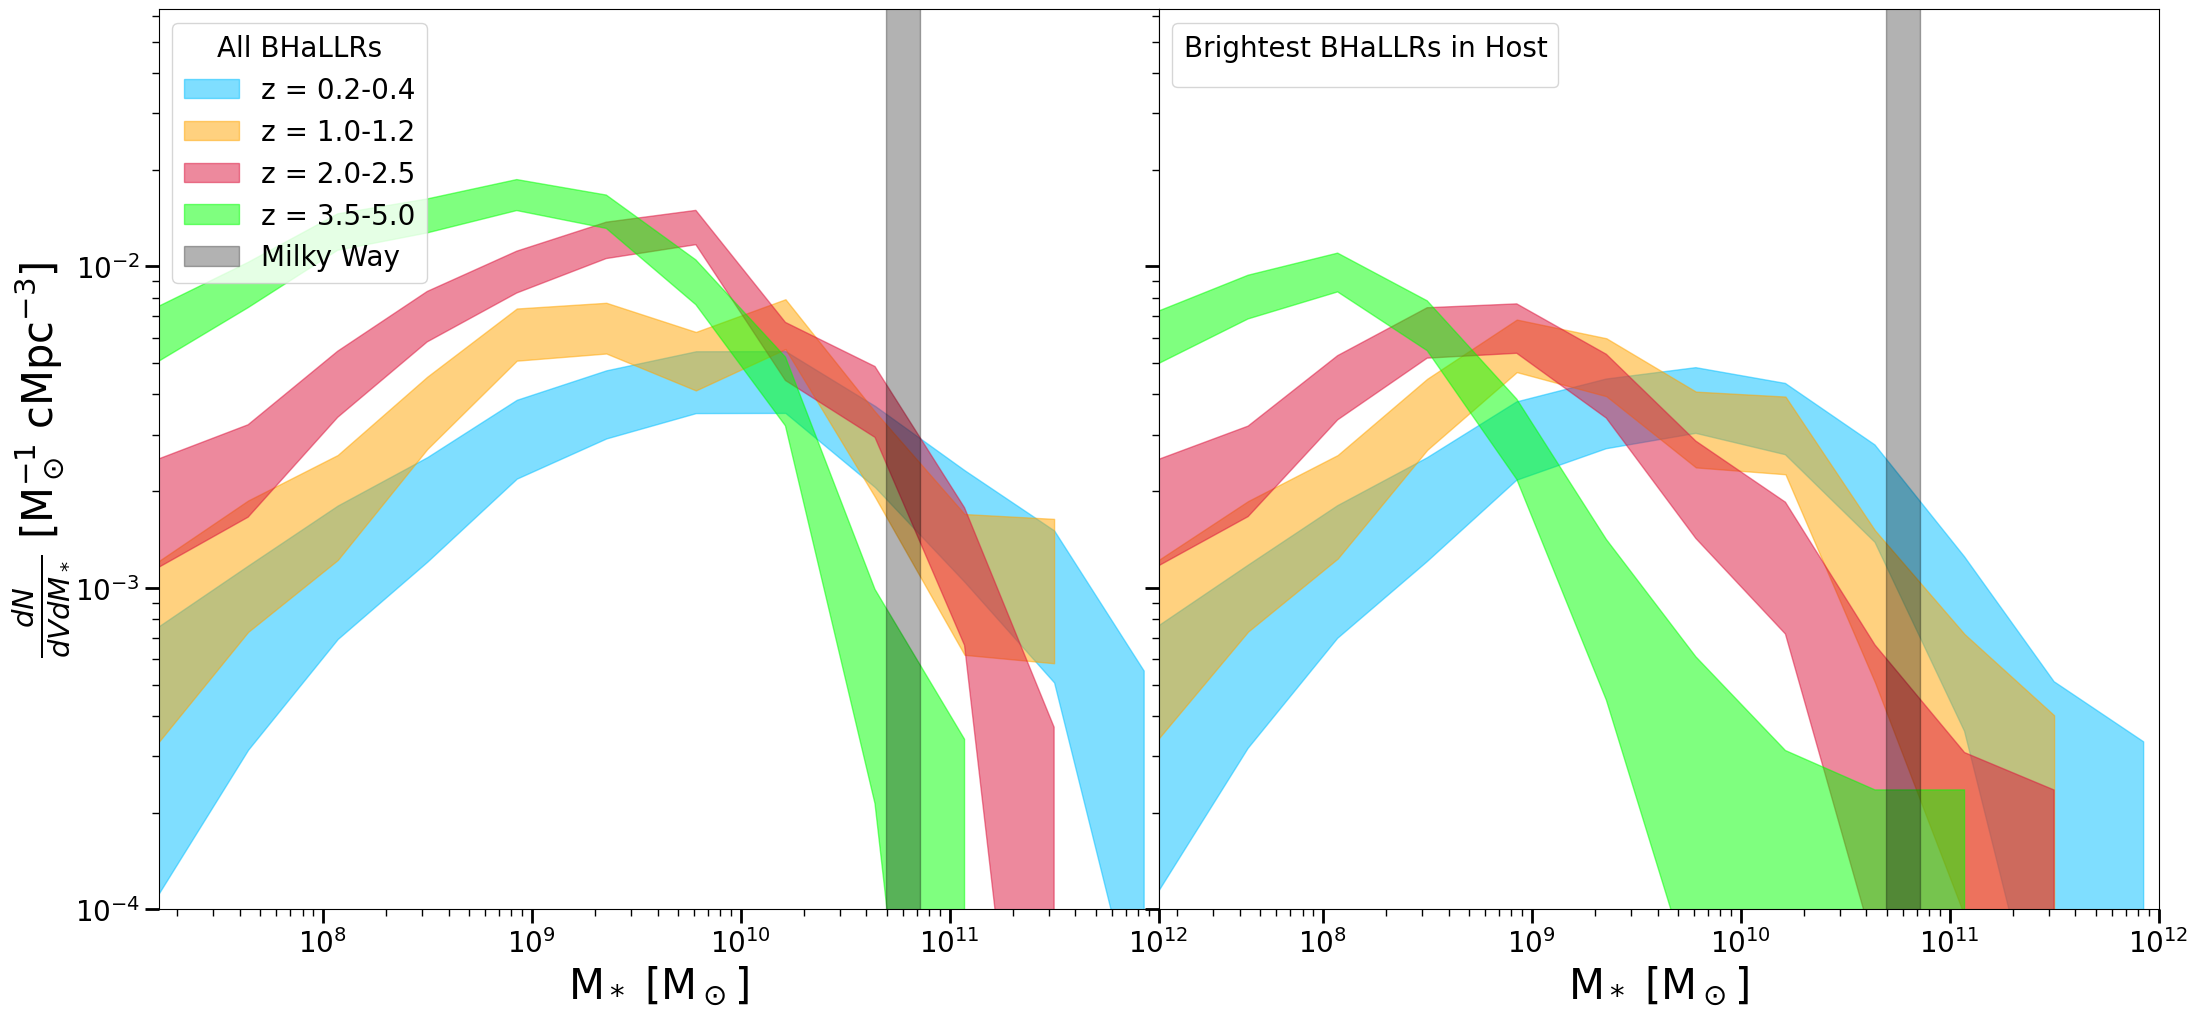

In [16]:
step02 = db.get_timestep("cosmo25/%6656")
mass02 = step02.calculate_all("Mstar")[0]
step10 = db.get_timestep("cosmo25/%3478")
mass10 = step10.calculate_all("Mstar")[0]
step20 = db.get_timestep("cosmo25/%1945")
mass20 = step20.calculate_all("Mstar")[0]
step35 = db.get_timestep("cosmo25/%1065")
mass35 = step35.calculate_all("Mstar")[0]


f = open('./Distribution Data/Mstar_func_histograms.pkl','rb')
mstar_data = pickle.load(f)
f.close()



# bins1 = np.logspace(38, 41.5, 7)
# bins2 = np.logspace(42, 46, 8)
lum_bins = np.concatenate((np.logspace(38, 41.5, 7), np.logspace(42, 46, 8)))
dist_bins = np.logspace(-3, 1.8, 15)
norm_dist_bins = np.logspace(-4, 0.5, 15)
mass_bins = np.logspace(6, 9.5, 15)
ssfr_bins = np.logspace(-12, -7, 15)
mstar_bins = np.logspace(7, 13, 15)


fig, ax = plt.subplots(1,2, figsize = (20,9), sharey=True)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
######################################################################################################
ax[0].set_ylabel(r"$\frac{dN}{dVdM_*}$ [M$_\odot^{-1}$ cMpc$^{-3}$]", fontsize=30)
xlabel = r"M$_*$ [M$_\odot$]"
ax[0].set_xlabel(xlabel, fontsize=30)
ax[1].set_xlabel(xlabel, fontsize=30)
current_data = mstar_data
current_bins = mstar_bins
current_bins = np.sqrt(current_bins[:-1] * current_bins[1:])
######################################################################################################


all_BHaLLRs_hist_arrays = current_data['ALL']
brightest_BHaLLRs_hist_arrays = current_data['Brightest']
brightest_outshine_BHaLLRs_hist_arrays = current_data['Brightest Outshine']


def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo * ntot, hi * ntot
    
all_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_outshine_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]



for x in range(7):
    for y in range(len(all_BHaLLRs_hist_arrays[0])):
        err = binomial_errors(0.95, all_BHaLLRs_hist_arrays[x][y], sum(all_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            all_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            all_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        all_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_BHaLLRs_hist_arrays[x][y], sum(brightest_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_outshine_BHaLLRs_hist_arrays[x][y], sum(brightest_outshine_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_outshine_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        
        
transparency = 0.5
ok = np.append(np.where(current_bins < max(mass02)), int(np.where(current_bins < max(mass02))[0][-1]) + 1)
ax[0].fill_between(current_bins[ok], np.divide(all_BHaLLRs_hist_arrays_error[0][0], 25**3)[ok], np.divide(all_BHaLLRs_hist_arrays_error[0][1], 25**3)[ok], alpha=transparency, label="z = 0.2-0.4", color="deepskyblue")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency, label="z = 0.6-0.8")
ok = np.append(np.where(current_bins < max(mass10)), int(np.where(current_bins < max(mass10))[0][-1]) + 1)
ax[0].fill_between(current_bins[ok], np.divide(all_BHaLLRs_hist_arrays_error[2][0], 25**3)[ok], np.divide(all_BHaLLRs_hist_arrays_error[2][1], 25**3)[ok], alpha=transparency, label="z = 1.0-1.2", color="orange")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency, label="z = 1.5-2.0")
ok = np.append(np.where(current_bins < max(mass20)), int(np.where(current_bins < max(mass20))[0][-1]) + 1)
ax[0].fill_between(current_bins[ok], np.divide(all_BHaLLRs_hist_arrays_error[4][0], 25**3)[ok], np.divide(all_BHaLLRs_hist_arrays_error[4][1], 25**3)[ok], alpha=transparency, label="z = 2.0-2.5", color="crimson")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency, label="z = 2.5-3.5")
ok = np.append(np.where(current_bins < max(mass35)), int(np.where(current_bins < max(mass35))[0][-1]) + 1)
ax[0].fill_between(current_bins[ok], np.divide(all_BHaLLRs_hist_arrays_error[6][0], 25**3)[ok], np.divide(all_BHaLLRs_hist_arrays_error[6][1], 25**3)[ok], alpha=transparency, label="z = 3.5-5.0", color="lime")
ax[0].loglog()
ax[0].set_xlim(current_bins[0], 1e12)
# ax[0].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
ax[0].set_ylim(10**-4, 10**-1.2)   #Other Func ylims


transparency = 0.5
ok = np.append(np.where(current_bins < max(mass02)), int(np.where(current_bins < max(mass02))[0][-1]) + 1)
ax[1].fill_between(current_bins[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[0][0], 25**3)[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[0][1], 25**3)[ok], alpha=transparency, color="deepskyblue")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency)
ok = np.append(np.where(current_bins < max(mass10)), int(np.where(current_bins < max(mass10))[0][-1]) + 1)
ax[1].fill_between(current_bins[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[2][0], 25**3)[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[2][1], 25**3)[ok], alpha=transparency, color="orange")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency)
ok = np.append(np.where(current_bins < max(mass20)), int(np.where(current_bins < max(mass20))[0][-1]) + 1)
ax[1].fill_between(current_bins[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[4][0], 25**3)[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[4][1], 25**3)[ok], alpha=transparency, color="crimson")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency)
ok = np.append(np.where(current_bins < max(mass35)), int(np.where(current_bins < max(mass35))[0][-1]) + 1)
ax[1].fill_between(current_bins[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[6][0], 25**3)[ok], np.divide(brightest_BHaLLRs_hist_arrays_error[6][1], 25**3)[ok], alpha=transparency, color="lime")
ax[1].loglog()
ax[1].set_xlim(current_bins[0], 1e12)
# ax[1].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
# ax[1].set_ylim(10**-4, 10**-0.5)   #Other Func ylims


##### Distance plot extras
# ax[0].axvline(1, color="black", ls="--")
# ax[1].axvline(1, color="black", ls="--")



#####Stellar mass plot extras
ax[0].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3, label="Milky Way")
ax[1].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3)




ax[0].legend(loc="upper left", title="All BHaLLRs")
ax[1].legend(loc="upper left", title="Brightest BHaLLRs in Host")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


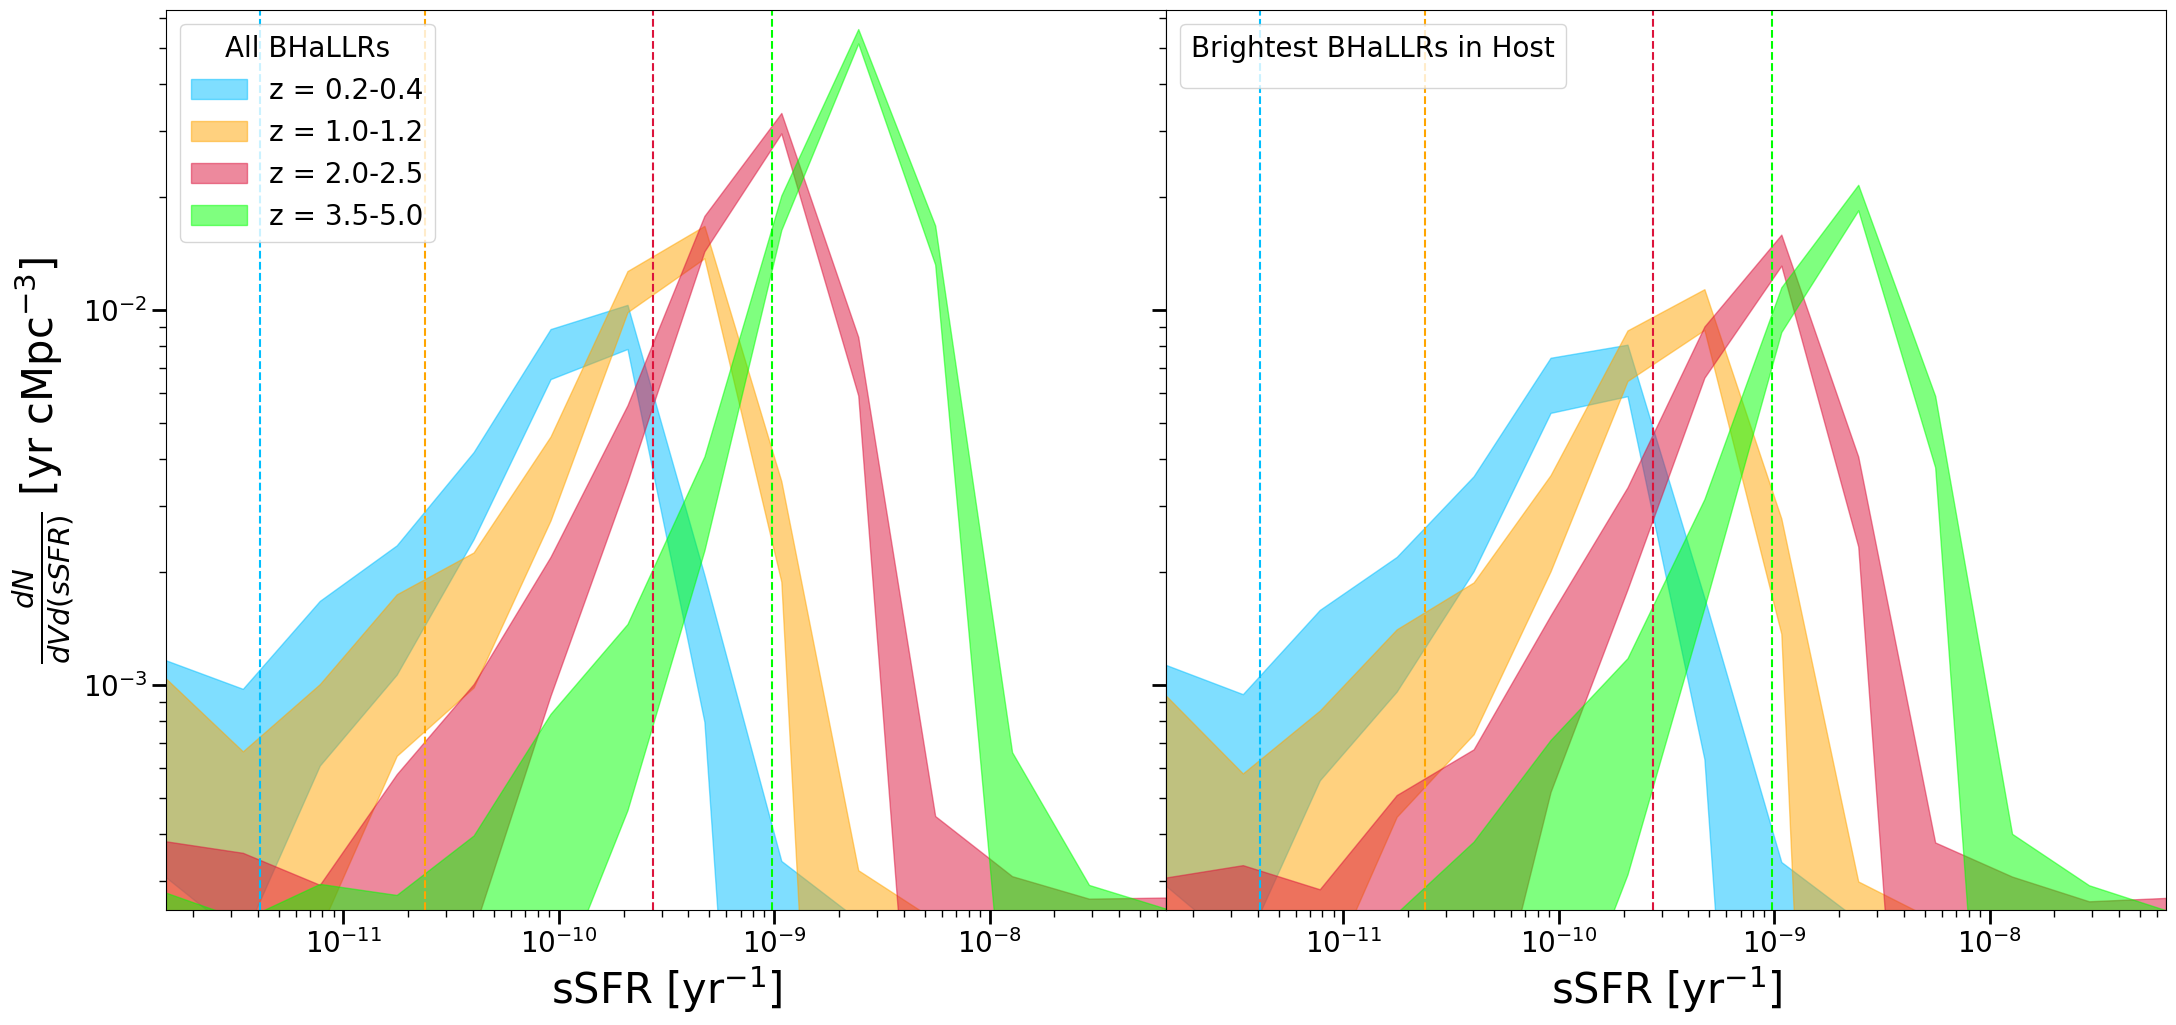

In [4]:
f = open('./Distribution Data/ssfr_func_histograms.pkl','rb')
ssfr_data = pickle.load(f)
f.close()



lum_bins = np.concatenate((np.logspace(38, 41.5, 7), np.logspace(42, 46, 8)))
dist_bins = np.logspace(-3, 1.8, 15)
norm_dist_bins = np.logspace(-4, 0.5, 15)
wand_norm_dist_bins = np.logspace(-3, 0, 15)
mass_bins = np.logspace(6, 9.5, 15)
ssfr_bins = np.logspace(-12, -7, 15)
mstar_bins = np.logspace(7, 13, 15)


fig, ax = plt.subplots(1,2, figsize = (20,9), sharey=True)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
######################################################################################################
ax[0].set_ylabel(r"$\frac{dN}{dVd(sSFR)}$ [yr cMpc$^{-3}$]", fontsize=30)
xlabel = r"sSFR [yr$^{-1}$]"
ax[0].set_xlabel(xlabel, fontsize=30)
ax[1].set_xlabel(xlabel, fontsize=30)
current_data = ssfr_data
current_bins = ssfr_bins
current_bins = np.sqrt(current_bins[:-1] * current_bins[1:])
######################################################################################################


all_BHaLLRs_hist_arrays = current_data['ALL']
brightest_BHaLLRs_hist_arrays = current_data['Brightest']
brightest_outshine_BHaLLRs_hist_arrays = current_data['Brightest Outshine']


def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo * ntot, hi * ntot
    
all_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_outshine_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]



for x in range(7):
    for y in range(len(all_BHaLLRs_hist_arrays[0])):
        err = binomial_errors(0.95, all_BHaLLRs_hist_arrays[x][y], sum(all_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            all_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            all_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        all_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_BHaLLRs_hist_arrays[x][y], sum(brightest_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_outshine_BHaLLRs_hist_arrays[x][y], sum(brightest_outshine_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_outshine_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        
        
transparency = 0.5
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[0][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[0][1], 25**3), alpha=transparency, label="z = 0.2-0.4", color="deepskyblue")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency, label="z = 0.6-0.8")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[2][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[2][1], 25**3), alpha=transparency, label="z = 1.0-1.2", color="orange")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency, label="z = 1.5-2.0")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[4][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[4][1], 25**3), alpha=transparency, label="z = 2.0-2.5", color="crimson")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency, label="z = 2.5-3.5")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[6][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[6][1], 25**3), alpha=transparency, label="z = 3.5-5.0", color="lime")
ax[0].loglog()
ax[0].set_xlim(current_bins[0], current_bins[-1])
# ax[0].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
ax[0].set_ylim(10**-3.6, 10**-1.2)   #Other Func ylims


transparency = 0.5
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[0][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[0][1], 25**3), alpha=transparency, color="deepskyblue")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[2][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[2][1], 25**3), alpha=transparency, color="orange")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[4][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[4][1], 25**3), alpha=transparency, color="crimson")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[6][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[6][1], 25**3), alpha=transparency, color="lime")
ax[1].loglog()
ax[1].set_xlim(current_bins[0], current_bins[-1])
# ax[1].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
# ax[1].set_ylim(10**-4, 10**-0.5)   #Other Func ylims


##### Distance plot extras
# ax[0].axvline(1, color="black", ls="--")
# ax[1].axvline(1, color="black", ls="--")



#####Stellar mass plot extras
# ax[0].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3, label="Milky Way")
# ax[1].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3)
# step02 = db.get_timestep("cosmo25/%6656")
# mass02 = step02.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass02), color="deepskyblue", ls="--")
# ax[1].axvline(max(mass02), color="deepskyblue", ls="--")
# step10 = db.get_timestep("cosmo25/%3478")
# mass10 = step10.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass10), color="orange", ls="--")
# ax[1].axvline(max(mass10), color="orange", ls="--")
# step20 = db.get_timestep("cosmo25/%1945")
# mass20 = step20.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass20), color="crimson", ls="--")
# ax[1].axvline(max(mass20), color="crimson", ls="--")
# step35 = db.get_timestep("cosmo25/%1065")
# mass35 = step35.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass35), color="lime", ls="--")
# ax[1].axvline(max(mass35), color="lime", ls="--")


# 5529   # 6656
# 3072   # 3478
# 1550   # 1945
# 0690   # 1065
##### sSFR plot extras
percentile = 10

step04 = db.get_timestep("cosmo25/%5529")
ssfr04 = step04.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr04 = [ssfr04[0][item]/ssfr04[2][item] if ssfr04[0][item] != 0 else ssfr04[1][item]/ssfr04[2][item] if ssfr04[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr04[2][item] for item in np.where(ssfr04[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr04, percentile), ls = "--", color="deepskyblue")
ax[1].axvline(np.percentile(master_ssfr04, percentile), ls = "--", color="deepskyblue")

step12 = db.get_timestep("cosmo25/%3072")
ssfr12 = step12.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr12 = [ssfr12[0][item]/ssfr12[2][item] if ssfr12[0][item] != 0 else ssfr12[1][item]/ssfr12[2][item] if ssfr12[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr12[2][item] for item in np.where(ssfr12[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr12, percentile), ls = "--", color="orange")
ax[1].axvline(np.percentile(master_ssfr12, percentile), ls = "--", color="orange")

step25 = db.get_timestep("cosmo25/%1550")
ssfr25 = step25.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr25 = [ssfr25[0][item]/ssfr25[2][item] if ssfr25[0][item] != 0 else ssfr25[1][item]/ssfr25[2][item] if ssfr25[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr25[2][item] for item in np.where(ssfr25[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr25, percentile), ls = "--", color="crimson")
ax[1].axvline(np.percentile(master_ssfr25, percentile), ls = "--", color="crimson")

step50 = db.get_timestep("cosmo25/%0690")
ssfr50 = step50.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr50 = [ssfr50[0][item]/ssfr50[2][item] if ssfr50[0][item] != 0 else ssfr50[1][item]/ssfr50[2][item] if ssfr50[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr50[2][item] for item in np.where(ssfr50[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr50, percentile), ls = "--", color="lime")
ax[1].axvline(np.percentile(master_ssfr50, percentile), ls = "--", color="lime")

ax[0].legend(loc="upper left", title="All BHaLLRs")
ax[1].legend(loc="upper left", title="Brightest BHaLLRs in Host")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


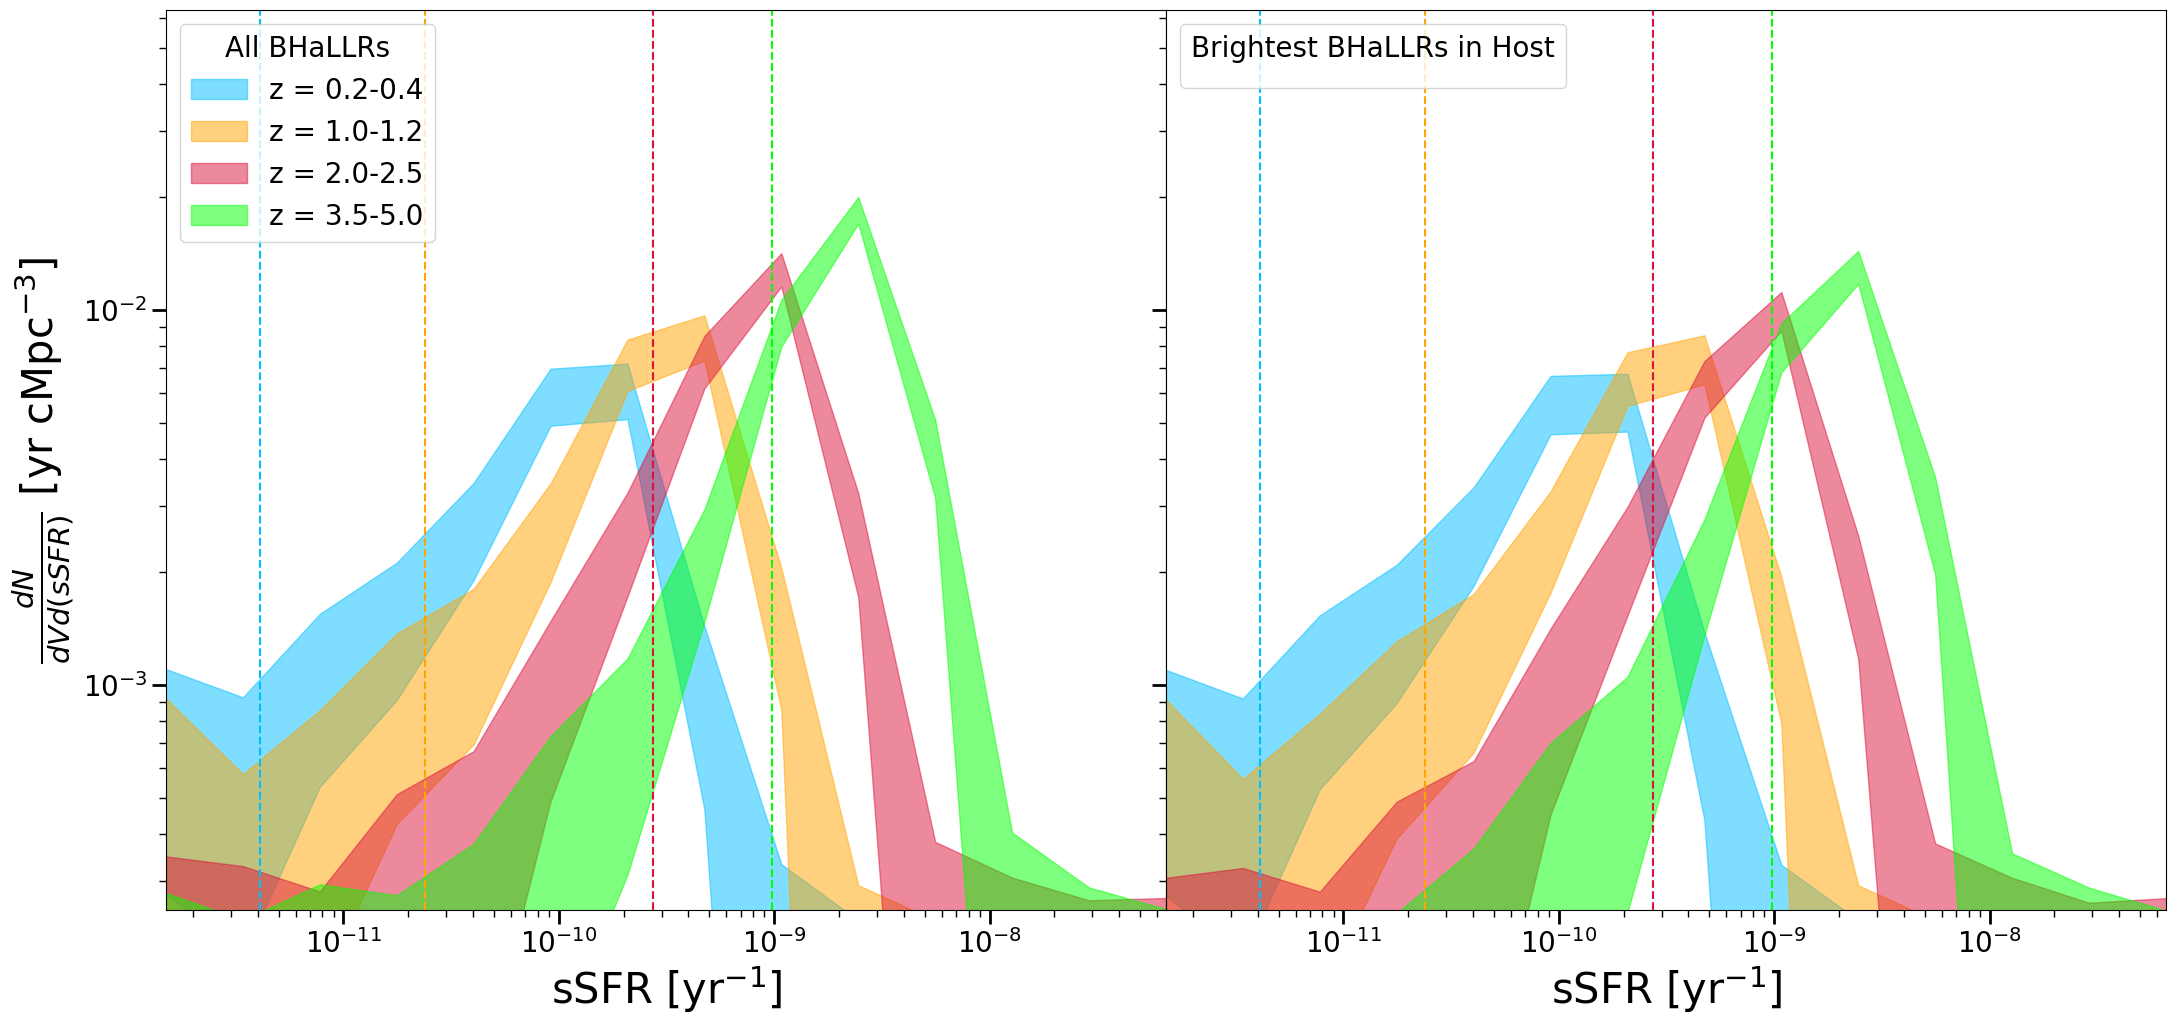

In [6]:
f = open('./Distribution Data/Central_ssfr_func_histograms.pkl','rb')
ssfr_data = pickle.load(f)
f.close()



lum_bins = np.concatenate((np.logspace(38, 41.5, 7), np.logspace(42, 46, 8)))
dist_bins = np.logspace(-3, 1.8, 15)
norm_dist_bins = np.logspace(-4, 0.5, 15)
wand_norm_dist_bins = np.logspace(-3, 0, 15)
mass_bins = np.logspace(6, 9.5, 15)
ssfr_bins = np.logspace(-12, -7, 15)
mstar_bins = np.logspace(7, 13, 15)


fig, ax = plt.subplots(1,2, figsize = (20,9), sharey=True)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0)
######################################################################################################
ax[0].set_ylabel(r"$\frac{dN}{dVd(sSFR)}$ [yr cMpc$^{-3}$]", fontsize=30)
xlabel = r"sSFR [yr$^{-1}$]"
ax[0].set_xlabel(xlabel, fontsize=30)
ax[1].set_xlabel(xlabel, fontsize=30)
current_data = ssfr_data
current_bins = ssfr_bins
current_bins = np.sqrt(current_bins[:-1] * current_bins[1:])
######################################################################################################


all_BHaLLRs_hist_arrays = current_data['ALL']
brightest_BHaLLRs_hist_arrays = current_data['Brightest']
brightest_outshine_BHaLLRs_hist_arrays = current_data['Brightest Outshine']


def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo * ntot, hi * ntot
    
all_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]
brightest_outshine_BHaLLRs_hist_arrays_error = [[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]],[[],[]]]



for x in range(7):
    for y in range(len(all_BHaLLRs_hist_arrays[0])):
        err = binomial_errors(0.95, all_BHaLLRs_hist_arrays[x][y], sum(all_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            all_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            all_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        all_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_BHaLLRs_hist_arrays[x][y], sum(brightest_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        err = binomial_errors(0.95, brightest_outshine_BHaLLRs_hist_arrays[x][y], sum(brightest_outshine_BHaLLRs_hist_arrays[x]))
        if np.isnan(err[0]):
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(0)
        else:
            brightest_outshine_BHaLLRs_hist_arrays_error[x][0].append(err[0])
        brightest_outshine_BHaLLRs_hist_arrays_error[x][1].append(err[1])
        
        
transparency = 0.5
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[0][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[0][1], 25**3), alpha=transparency, label="z = 0.2-0.4", color="deepskyblue")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency, label="z = 0.6-0.8")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[2][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[2][1], 25**3), alpha=transparency, label="z = 1.0-1.2", color="orange")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency, label="z = 1.5-2.0")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[4][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[4][1], 25**3), alpha=transparency, label="z = 2.0-2.5", color="crimson")
# ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency, label="z = 2.5-3.5")
ax[0].fill_between(current_bins, np.divide(all_BHaLLRs_hist_arrays_error[6][0], 25**3), np.divide(all_BHaLLRs_hist_arrays_error[6][1], 25**3), alpha=transparency, label="z = 3.5-5.0", color="lime")
ax[0].loglog()
ax[0].set_xlim(current_bins[0], current_bins[-1])
# ax[0].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
ax[0].set_ylim(10**-3.6, 10**-1.2)   #Other Func ylims


transparency = 0.5
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[0][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[0][1], 25**3), alpha=transparency, color="deepskyblue")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[1][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[1][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[2][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[2][1], 25**3), alpha=transparency, color="orange")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[3][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[3][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[4][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[4][1], 25**3), alpha=transparency, color="crimson")
# ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[5][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[5][1], 25**3), alpha=transparency)
ax[1].fill_between(current_bins, np.divide(brightest_BHaLLRs_hist_arrays_error[6][0], 25**3), np.divide(brightest_BHaLLRs_hist_arrays_error[6][1], 25**3), alpha=transparency, color="lime")
ax[1].loglog()
ax[1].set_xlim(current_bins[0], current_bins[-1])
# ax[1].set_ylim(10**-7.5, 10**-1)   #Lum Func ylims
# ax[1].set_ylim(10**-4, 10**-0.5)   #Other Func ylims


##### Distance plot extras
# ax[0].axvline(1, color="black", ls="--")
# ax[1].axvline(1, color="black", ls="--")



#####Stellar mass plot extras
# ax[0].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3, label="Milky Way")
# ax[1].fill_between([(6.08 - 1.14) * 10**10,(6.08 + 1.14) * 10**10],[1,1],[0,0], color="black", alpha=0.3)
# step02 = db.get_timestep("cosmo25/%6656")
# mass02 = step02.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass02), color="deepskyblue", ls="--")
# ax[1].axvline(max(mass02), color="deepskyblue", ls="--")
# step10 = db.get_timestep("cosmo25/%3478")
# mass10 = step10.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass10), color="orange", ls="--")
# ax[1].axvline(max(mass10), color="orange", ls="--")
# step20 = db.get_timestep("cosmo25/%1945")
# mass20 = step20.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass20), color="crimson", ls="--")
# ax[1].axvline(max(mass20), color="crimson", ls="--")
# step35 = db.get_timestep("cosmo25/%1065")
# mass35 = step35.calculate_all("Mstar")[0]
# ax[0].axvline(max(mass35), color="lime", ls="--")
# ax[1].axvline(max(mass35), color="lime", ls="--")


# 5529   # 6656
# 3072   # 3478
# 1550   # 1945
# 0690   # 1065
##### sSFR plot extras
percentile = 10

step04 = db.get_timestep("cosmo25/%5529")
ssfr04 = step04.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr04 = [ssfr04[0][item]/ssfr04[2][item] if ssfr04[0][item] != 0 else ssfr04[1][item]/ssfr04[2][item] if ssfr04[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr04[2][item] for item in np.where(ssfr04[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr04, percentile), ls = "--", color="deepskyblue")
ax[1].axvline(np.percentile(master_ssfr04, percentile), ls = "--", color="deepskyblue")

step12 = db.get_timestep("cosmo25/%3072")
ssfr12 = step12.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr12 = [ssfr12[0][item]/ssfr12[2][item] if ssfr12[0][item] != 0 else ssfr12[1][item]/ssfr12[2][item] if ssfr12[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr12[2][item] for item in np.where(ssfr12[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr12, percentile), ls = "--", color="orange")
ax[1].axvline(np.percentile(master_ssfr12, percentile), ls = "--", color="orange")

step25 = db.get_timestep("cosmo25/%1550")
ssfr25 = step25.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr25 = [ssfr25[0][item]/ssfr25[2][item] if ssfr25[0][item] != 0 else ssfr25[1][item]/ssfr25[2][item] if ssfr25[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr25[2][item] for item in np.where(ssfr25[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr25, percentile), ls = "--", color="crimson")
ax[1].axvline(np.percentile(master_ssfr25, percentile), ls = "--", color="crimson")

step50 = db.get_timestep("cosmo25/%0690")
ssfr50 = step50.calculate_all("at(0.9 * radius(200), SFR_encl_25Myr)", "at(0.9 * radius(200), SFR_encl_250Myr)", "Mstar")
master_ssfr50 = [ssfr50[0][item]/ssfr50[2][item] if ssfr50[0][item] != 0 else ssfr50[1][item]/ssfr50[2][item] if ssfr50[1][item] != 0 else (6*10**4)/(250*10**6)/ssfr50[2][item] for item in np.where(ssfr50[2] >= 1e7)[0]]
ax[0].axvline(np.percentile(master_ssfr50, percentile), ls = "--", color="lime")
ax[1].axvline(np.percentile(master_ssfr50, percentile), ls = "--", color="lime")

ax[0].legend(loc="upper left", title="All BHaLLRs")
ax[1].legend(loc="upper left", title="Brightest BHaLLRs in Host")

## BHILL's Wanderer Fraction

In [5]:
####7779   0.05
####5107   0.5
####3478   1
####2536   1.5
####1945   2
####1550   2.5
####1270   3
####1065   3.5
####0909   4
####0778   4.5
####0690   5
####0615   5.5
####0547   6
####0491   6.5
####0446   7
####0372   8


a_hard = 10**29.37
b_hard = 10**39.28
g_hard = 2.03
d_hard = 1.31
        

def precentage(timestep):
    step = db.get_timestep("cosmo25/%"+timestep)
    redshift = str(np.round(step.redshift, 2))
    z = float(redshift)
    hostid, mass, mdot, dist, Mstar, SFR_25, SFR_250 = step.calculate_all('host_halo.halo_number()', 'BH_mass', 'BH_mdot', "BH_central_distance", "host_halo.Mstar", "host_halo.at(0.9 * radius(200),SFR_encl_25Myr)", "host_halo.at(0.9 * radius(200),SFR_encl_250Myr)")
    mdot_edd = (1.26*10**31 * mass) /(0.1 * (3*10**8)**2) * 365*24*60*60 * 1/(2*10**30)
    lum_one_mode = 0.1 * mdot * (3 * 10**8)**2 * (2*10**30)/(365*24*60*60)  * 10**7
    
    lum_two_mode = []
    for x in range(len(mdot)):
        if mdot[x]/mdot_edd[x] >= 0.1:
            lum_two_mode.append(lum_one_mode[x])
        else:
            lum_two_mode.append(mdot[x]/mdot_edd[x] * 10 * lum_one_mode[x])
            
    SFR_master_array = []
    for count, item in enumerate(SFR_25):
        if item != 0:
            SFR_master_array.append(item)
        elif SFR_250[count] != 0:
            SFR_master_array.append(SFR_250[count])
        else:
            SFR_master_array.append((6*10**4)/(250*10**6))
            
    Host_lum = []
    for x in range(len(SFR_master_array)):
            Host_lum.append(a_hard * ((1 + z)**g_hard) * Mstar[x] + b_hard * ((1 + z)**d_hard) * SFR_master_array[x])



    def get_correction_lumx_bh(lum_ergs_s):
        lum_ergs_s = np.array(lum_ergs_s)
        lum_sol = (np.divide(lum_ergs_s, (3.826*10**33)).astype(float))
        xray_lum_erg_s = []
        for count, item in enumerate(lum_sol):
            correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278
            xray_lum_erg_s.append(lum_ergs_s[count]/correction_factor_hard)
        return xray_lum_erg_s



    lum_two_mode = get_correction_lumx_bh(lum_two_mode)
    
    
    low_lum_wanderers = [np.where((np.array(lum_two_mode) >=1e38) & (np.array(lum_two_mode) <= 1e41) & (np.array(dist) > 1))][0][0]
    low_lum_total = [np.where((np.array(lum_two_mode) >=1e38) & (np.array(lum_two_mode) <= 1e41))][0][0]
    fraction_LL_wanderers = len(low_lum_wanderers)/len(low_lum_total)

    
    
    unique_occupied_ids = np.unique(hostid)
    unique_max_lum = []
    unique_max_distances = []
    unique_max_host_lum = []
    for item in unique_occupied_ids:
        index_of_current_halo = []
        index_of_current_halo = np.where(hostid == item)
        max_index = np.argmax(np.array(lum_two_mode)[index_of_current_halo[0]])
        unique_max_lum.append(np.array(lum_two_mode)[index_of_current_halo[0]][max_index])
        unique_max_distances.append(np.array(dist)[index_of_current_halo[0]][max_index])
        unique_max_host_lum.append(np.array(Host_lum)[index_of_current_halo[0]][max_index])
    
    low_lum_wanderers_1 = [np.where((np.array(unique_max_lum) >= 1e38) & (np.array(unique_max_lum) <= 1e41) & (np.array(unique_max_distances) > 1))][0][0]
    low_lum_total_1 = [np.where((np.array(unique_max_lum) >= 1e38) & (np.array(unique_max_lum) <= 1e41))][0][0]
    fraction_brightest_LL_wanderers = len(low_lum_wanderers_1)/len(low_lum_total_1)
    
    
    
    
    brightest_outshine_lum = []
    brightest_outshine_distances = []
    for count, item in enumerate(unique_max_lum):
        if item >= 2 * unique_max_host_lum[count]:
            brightest_outshine_lum.append(item)
            brightest_outshine_distances.append(unique_max_distances[count])
    
    low_lum_wanderers_2 = [np.where((np.array(brightest_outshine_lum) >= 1e38) & (np.array(brightest_outshine_lum) <= 1e41) & (np.array(brightest_outshine_distances) > 1))][0][0]
    low_lum_total_2 = [np.where((np.array(brightest_outshine_lum) >= 1e38) & (np.array(brightest_outshine_lum) <= 1e41))][0][0]
    fraction_brightest_outshine_LL_wanderers = len(low_lum_wanderers_2)/len(low_lum_total_2)
    
    return fraction_LL_wanderers, len(low_lum_total), fraction_brightest_LL_wanderers, len(low_lum_total_1), fraction_brightest_outshine_LL_wanderers, len(low_lum_total_2), z



fraction_LL_wanderers = []
fraction_brightest_LL_wanderers = []
fraction_brightest_outshine_LL_wanderers = []
total_LL = []
total_brightest_LL = []
total_brightest_outshine_LL = []
redshift = []



for item in [sim.timesteps[21:-1:3][x].relative_filename[-4:] for x in range(len(sim.timesteps[21:-1:3]))]:
    data = precentage(item)
    fraction_LL_wanderers.append(data[0])
    total_LL.append(data[1])
    fraction_brightest_LL_wanderers.append(data[2])
    total_brightest_LL.append(data[3])
    fraction_brightest_outshine_LL_wanderers.append(data[4])
    total_brightest_outshine_LL.append(data[5])
    redshift.append(data[6])
    
    
    
    
def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo, hi


LL_fraction_error = [[],[]]
LL_bright_fraction_error = [[],[]]
LL_bright_outshine_fraction_error = [[],[]]

for count, item in enumerate(fraction_LL_wanderers):
    data = binomial_errors(0.95, item * total_LL[count], total_LL[count])
    if np.isnan(data[0]):
        LL_fraction_error[0].append(0)
    else:
        LL_fraction_error[0].append(data[0])
    LL_fraction_error[1].append(data[1])
    data = binomial_errors(0.95, fraction_brightest_LL_wanderers[count] * total_brightest_LL[count], total_brightest_LL[count])
    if np.isnan(data[0]):
        LL_bright_fraction_error[0].append(0)
    else:
        LL_bright_fraction_error[0].append(data[0])
    LL_bright_fraction_error[1].append(data[1])
    data = binomial_errors(0.95, fraction_brightest_outshine_LL_wanderers[count] * total_brightest_outshine_LL[count], total_brightest_outshine_LL[count])
    if np.isnan(data[0]):
        LL_bright_outshine_fraction_error[0].append(0)
    else:
        LL_bright_outshine_fraction_error[0].append(data[0])
    LL_bright_outshine_fraction_error[1].append(data[1])
    

    
redshift = np.add(redshift, 1)

/tmp/ipykernel_1036204/757460198.py:60: RuntimeWarning: divide by zero encountered in scalar power
  correction_factor_hard = 4.073 * (item/10**10)**-0.026 + 12.60 * (item/10**10)**0.278


WARNING assuming provided time is in units of Gyr


(1.0, 9.5)

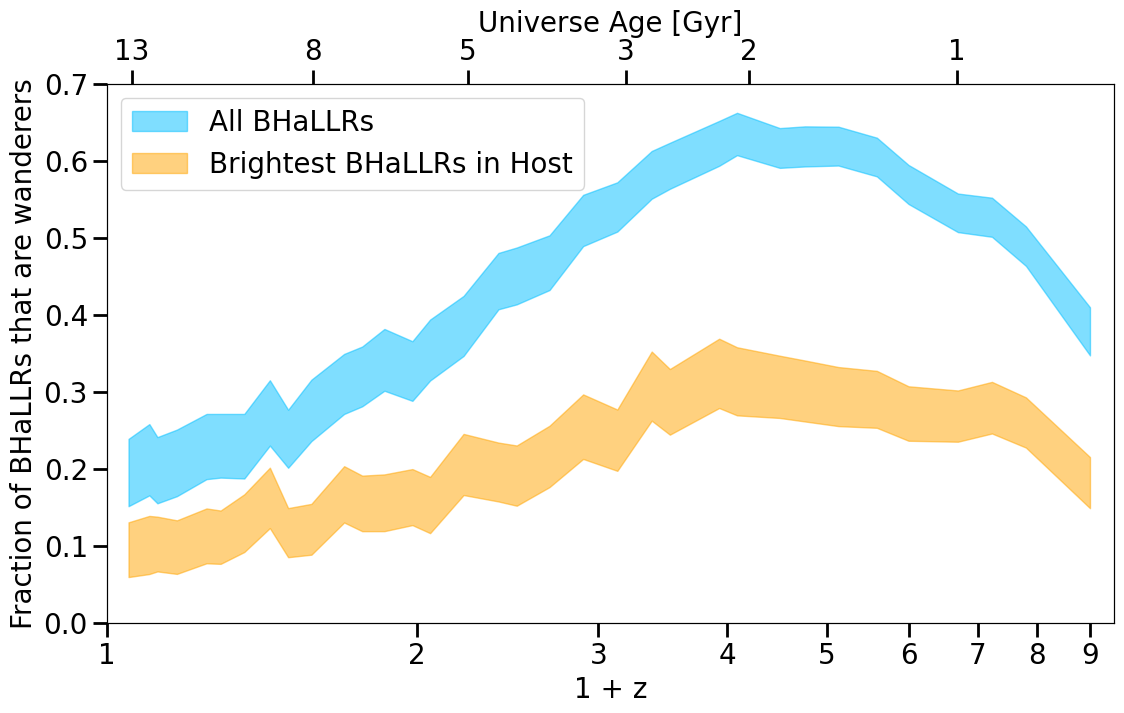

In [6]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)

# ok = np.where(np.array(fraction_LL_wanderers) != 0)[0]
# ax.errorbar(np.array(redshift)[ok], np.array(fraction_LL_wanderers)[ok], yerr = [np.array(LL_fraction_error[0])[ok], np.array(LL_fraction_error[1])[ok]], zorder=2, ls="", label = "All BHs Two Mode", color="deepskyblue", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
# ok = np.where(np.array(fraction_brightest_LL_wanderers) != 0)[0]
# ax.errorbar(np.array(redshift)[ok], np.array(fraction_brightest_LL_wanderers)[ok], yerr = [np.array(LL_bright_fraction_error[0])[ok], np.array(LL_bright_fraction_error[1])[ok]], zorder=1, ls="", label = "Brightest in Host", color="orange", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
# ok = np.where(np.array(fraction_brightest_outshine_LL_wanderers) != 0)[0]
# ax.errorbar(np.array(redshift)[ok], np.array(fraction_brightest_outshine_LL_wanderers)[ok], yerr = [np.array(LL_bright_outshine_fraction_error[0])[ok], np.array(LL_bright_outshine_fraction_error[1])[ok]], zorder=0, ls="", label = "Brightest + Outshine", color="crimson",  fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ax.fill_between(redshift, LL_fraction_error[0], LL_fraction_error[1], label = "All BHaLLRs", color="deepskyblue", alpha=0.5)
ax.fill_between(redshift, LL_bright_fraction_error[0], LL_bright_fraction_error[1],  label = "Brightest BHaLLRs in Host", color="orange", alpha=0.5)


ax.set_xscale("log")
ax.set_xticks([1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9])
plt.ylim(0, 0.7)
ax.legend(loc="upper left")
ax.set_xlabel("1 + z")
ax.set_xlim(1, 9.5)
ax.set_ylabel(r"Fraction of BHaLLRs that are wanderers")

# plt.errorbar(redshift, array, yerr=[np.array(array) - np.array(min_array), np.array(max_array) - np.array(array)], fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1, color="deepskyblue")
# plt.xlabel("z")
# plt.ylabel(r"Fraction of BHILLs that are wanderers")


age = [1,2,3,5,8,13]
red = np.add(bhtools.cosmology.getRedshift(age, 0.677, 0.31, 0.69), 1)
ax2 = ax.twiny()
ax2.set_xlabel("Universe Age [Gyr]")
ax2.set_xscale("log")
ax2.minorticks_off()
ax2.set_xticks(red)
ax2.set_xticklabels(age)
ax2.set_xlim(1, 9.5)


## BHILL's Quenched Fraction

In [ ]:
# sim.timesteps
####7779   0.05
####5107   0.5
####3478   1
####2536   1.5
####1945   2
####1550   2.5
####1270   3
####1065   3.5
####0909   4
####0778   4.5
####0690   5
####0618   5.5
####0547   6
####0491   6.5
####0446   7
####0372   8

In [20]:
timestep = db.get_timestep("cosmo25/%0690")
data_raw = timestep.calculate_all("host_halo.Mstar", "host_halo.at(0.9 * radius(200),SFR_encl_25Myr)")
redshift = timestep.redshift

resolved = 10**7
data_raw[1] = data_raw[1][np.where(data_raw[0] > resolved)[0]]
data_raw[0] = data_raw[0][np.where(data_raw[0] > resolved)[0]]


ok = []
for count, item in enumerate(data_raw[1]):
    if item == 0:
        data_raw[1][count] = 1.1*10**-4
    else:
        ok.append(count)

Mstar = np.log10(data_raw[0])
SFR = np.log10(data_raw[1])

[ 9.00000000e-01 -7.69039333e+00  5.11385405e-03  4.32999827e-02]


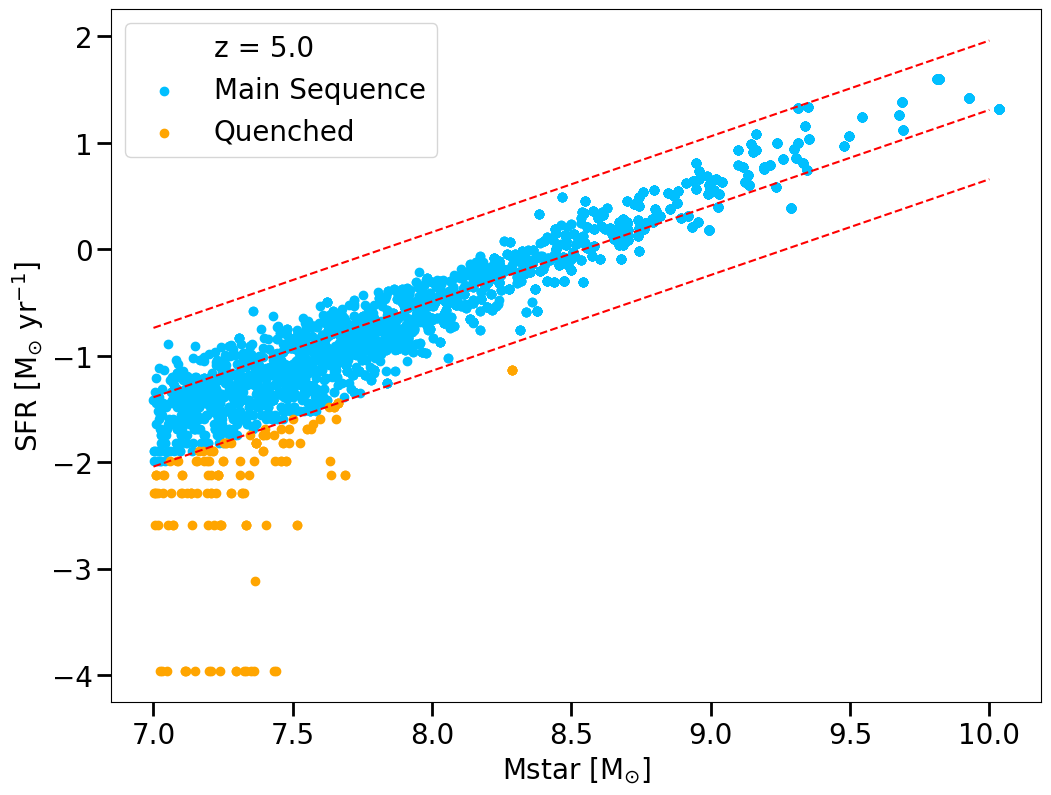

In [21]:
def objective(x, a, b):
    return a * x + b
x, y = Mstar[ok], SFR[ok]

bounds = ([0.8, -20], [0.9, 0])
initial_guesses = [0.8, -20]
popt, pcov = curve_fit(objective, x, y, bounds=bounds, p0=initial_guesses)
slope, intercept = popt
perr = np.sqrt(np.diag(pcov))
print(np.concatenate((popt, perr)))


x_line = np.arange(min(x), max(x), 1)
y_line = objective(x_line, slope, intercept)
alpha = 3 * (1 + redshift)**0.9
y_line_1 = objective(x_line, slope, intercept + alpha * perr[1])
y_line_2 = objective(x_line, slope, intercept - alpha * perr[1])

# plt.scatter(Mstar, SFR)
plt.plot(x_line, y_line, '--', color='red')
plt.plot(x_line, y_line_1, '--', color='red')
plt.plot(x_line, y_line_2, '--', color='red')


indexs = []
for count, item in enumerate(SFR):
    if item < objective(Mstar[count], slope, intercept - alpha * perr[1]):
        indexs.append(1)
    else:
        indexs.append(0)
        
main_sequence_indices = np.where(np.array(indexs) == 0)[0]
quenched_indices = np.where(np.array(indexs) == 1)[0]
plt.scatter(8.5, 0, alpha=0, label="z = 5.0")
plt.scatter(Mstar[main_sequence_indices], SFR[main_sequence_indices], label="Main Sequence", color="deepskyblue")
plt.scatter(Mstar[quenched_indices], SFR[quenched_indices], label="Quenched", color="orange")
plt.ylabel(r"SFR [M$_{\odot}$ yr$^{-1}$]")
plt.xlabel(r"Mstar [M$_{\odot}$]")
plt.legend()
# plt.savefig("./Images/HI.png")

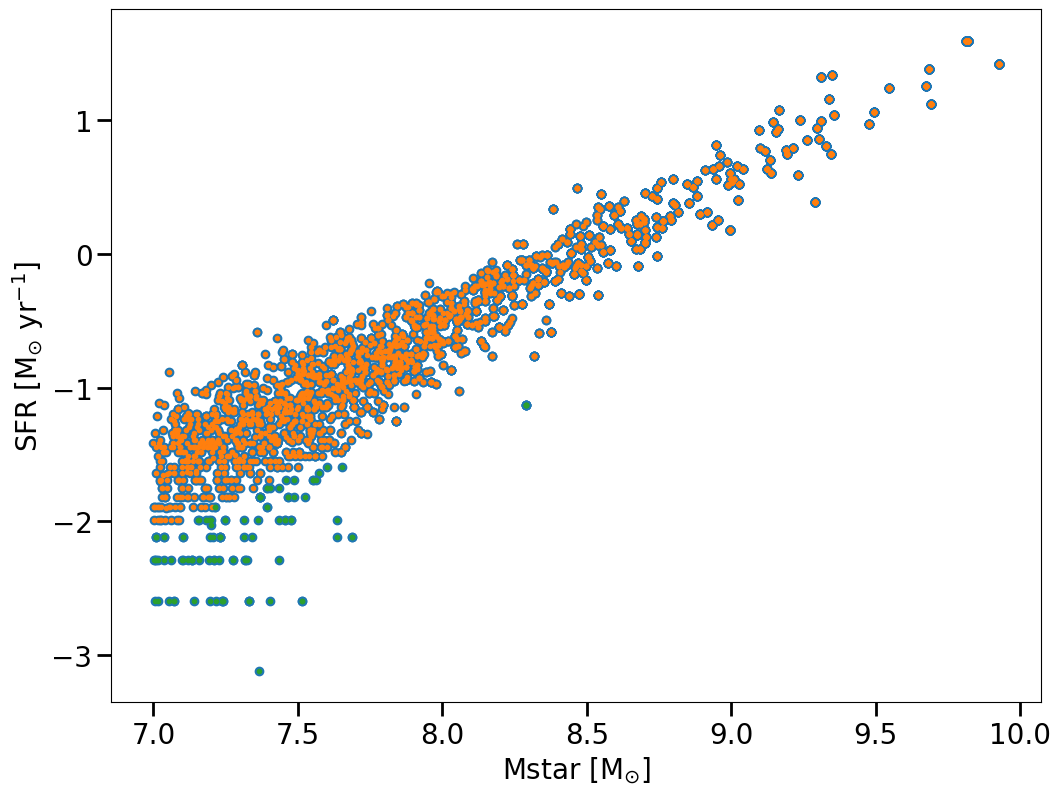

In [8]:
a_hard = 10**29.37
b_hard = 10**39.28
g_hard = 2.03
d_hard = 1.31

def objective(x, a, b):
    return a * x + b

def get_quenched_LL(timestep):
    step = db.get_timestep("cosmo25/%"+timestep)
    z = step.redshift
    data_raw = step.calculate_all("host_halo.Mstar", "host_halo.at(0.9 * radius(200),SFR_encl_25Myr)", "host_halo.at(0.9 * radius(200),SFR_encl_250Myr)", "BH_mdot", "BH_mass")
    
    resolved_low = 10**7
    resolved_high = 10**10
    SFR_25_resolved = data_raw[1][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    SFR_250_resolved = data_raw[2][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    BH_mdot_resolved = data_raw[3][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    BH_mass_resolved = data_raw[4][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    Mstar_resolved = data_raw[0][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    
    
    SFR_master_array = []
    for count, item in enumerate(SFR_25_resolved):
        if item != 0:
            SFR_master_array.append(item)
        elif SFR_250_resolved[count] != 0:
            SFR_master_array.append(SFR_250_resolved[count])
        else:
            SFR_master_array.append((6*10**4)/(250*10**6))
    
    
    Host_lum_resolved = []
    for x in range(len(SFR_master_array)):
            Host_lum_resolved.append(a_hard * ((1 + z)**g_hard) * Mstar_resolved[x] + b_hard * ((1 + z)**d_hard) * SFR_master_array[x])
    
    
    two_mode_hard_lum_resolved = []
    for count, item in enumerate(BH_mdot_resolved):
        edd_acret_rate = BH_mass_resolved[count] * 2.20752 * 10**-8
        if item == 0:
            two_mode_hard_lum_resolved.append(0)
        elif item >= 0.1 * edd_acret_rate:
            bol_lum_ergs_s = 0.1 * item * (2*10**30)/(365*24*60*60) * (3*10**8)**2 * 10**7
            bol_lum_sol_lum = bol_lum_ergs_s/(3.826*10**33)
            correction_factor_hard = 4.073 * (bol_lum_sol_lum/10**10)**-0.026 + 12.60 * (bol_lum_sol_lum/10**10)**0.278
            two_mode_hard_lum_resolved.append(bol_lum_ergs_s/correction_factor_hard)
        else:
            f_edd = item/edd_acret_rate
            bol_lum_ergs_s = f_edd * item * (2*10**30)/(365*24*60*60) * (3*10**8)**2 * 10**7
            bol_lum_sol_lum = bol_lum_ergs_s/(3.826*10**33)
            correction_factor_hard = 4.073 * (bol_lum_sol_lum/10**10)**-0.026 + 12.60 * (bol_lum_sol_lum/10**10)**0.278
            two_mode_hard_lum_resolved.append(bol_lum_ergs_s/correction_factor_hard)

    


    ok = []
    for count, item in enumerate(SFR_master_array):
        if item > 2 * ((6*10**4)/(250*10**6)):
            ok.append(count)
    
    


    Mstar = np.log10(Mstar_resolved)
    SFR = np.log10(SFR_master_array)
    
    plt.scatter(Mstar, SFR, color="C0")
    
    
    x, y = Mstar[ok], SFR[ok]
    bounds = ([0.8, -20], [0.9, 0])
    initial_guesses = [0.8, -20]
    popt, pcov = curve_fit(objective, x, y, bounds=bounds, p0=initial_guesses)
    slope, intercept = popt
    perr = np.sqrt(np.diag(pcov))
    alpha = 3 * (1 + z)**0.9

    indexs = []
    for count, item in enumerate(SFR):
        if item < objective(Mstar[count], slope, intercept - alpha * perr[1]):
            indexs.append(1)
        else:
            indexs.append(0)

    main_sequence_indices = np.where(np.array(indexs) == 0)[0]
    quenched_indices = np.where(np.array(indexs) == 1)[0]
    plt.scatter(Mstar[main_sequence_indices], SFR[main_sequence_indices], color="C1", marker=".")
    plt.scatter(Mstar[quenched_indices], SFR[quenched_indices], color="C2", marker=".")
    plt.ylabel(r"SFR [M$_{\odot}$ yr$^{-1}$]")
    plt.xlabel(r"Mstar [M$_{\odot}$]")
    
    
    
    
get_quenched_LL("0690")

In [2]:
a_hard = 10**29.37
b_hard = 10**39.28
g_hard = 2.03
d_hard = 1.31

def objective(x, a, b):
    return a * x + b

def get_quenched_LL(timestep):
    step = db.get_timestep("cosmo25/%"+timestep)
    z = step.redshift
    data_raw = step.calculate_all("host_halo.Mstar", "host_halo.at(0.9 * radius(200),SFR_encl_25Myr)", "host_halo.at(0.9 * radius(200),SFR_encl_250Myr)", "BH_mdot", "BH_mass", "host_halo.halo_number()")

    
    resolved_low = 10**7
    resolved_high = 10**15
    SFR_25_resolved = data_raw[1][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    SFR_250_resolved = data_raw[2][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    BH_mdot_resolved = data_raw[3][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    BH_mass_resolved = data_raw[4][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    Host_ids_resolved = data_raw[5][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    Mstar_resolved = data_raw[0][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    
    
    SFR_master_array = []
    for count, item in enumerate(SFR_25_resolved):
        if item != 0:
            SFR_master_array.append(item)
        elif SFR_250_resolved[count] != 0:
            SFR_master_array.append(SFR_250_resolved[count])
        else:
            SFR_master_array.append((6*10**4)/(250*10**6))
    
    
    Host_lum_resolved = []
    for x in range(len(SFR_master_array)):
            Host_lum_resolved.append(a_hard * ((1 + z)**g_hard) * Mstar_resolved[x] + b_hard * ((1 + z)**d_hard) * SFR_master_array[x])
    
    
    two_mode_hard_lum_resolved = []
    for count, item in enumerate(BH_mdot_resolved):
        edd_acret_rate = BH_mass_resolved[count] * 2.20752 * 10**-8
        if item == 0:
            two_mode_hard_lum_resolved.append(0)
        elif item >= 0.1 * edd_acret_rate:
            bol_lum_ergs_s = 0.1 * item * (2*10**30)/(365*24*60*60) * (3*10**8)**2 * 10**7
            bol_lum_sol_lum = bol_lum_ergs_s/(3.826*10**33)
            correction_factor_hard = 4.073 * (bol_lum_sol_lum/10**10)**-0.026 + 12.60 * (bol_lum_sol_lum/10**10)**0.278
            two_mode_hard_lum_resolved.append(bol_lum_ergs_s/correction_factor_hard)
        else:
            f_edd = item/edd_acret_rate
            bol_lum_ergs_s = f_edd * item * (2*10**30)/(365*24*60*60) * (3*10**8)**2 * 10**7
            bol_lum_sol_lum = bol_lum_ergs_s/(3.826*10**33)
            correction_factor_hard = 4.073 * (bol_lum_sol_lum/10**10)**-0.026 + 12.60 * (bol_lum_sol_lum/10**10)**0.278
            two_mode_hard_lum_resolved.append(bol_lum_ergs_s/correction_factor_hard)

    


    ok = []
    for count, item in enumerate(SFR_master_array):
        if item > 2 * ((6*10**4)/(250*10**6)):
            ok.append(count)
    
    


    Mstar = np.log10(Mstar_resolved)
    SFR = np.log10(SFR_master_array)
    
    
    x, y = Mstar[ok], SFR[ok]
    bounds = ([0.8, -20], [0.9, 0])
    initial_guesses = [0.8, -20]
    popt, pcov = curve_fit(objective, x, y, bounds=bounds, p0=initial_guesses)
    slope, intercept = popt
    perr = np.sqrt(np.diag(pcov))
    alpha = 3 * (1 + z)**0.9

    indexs = []
    for count, item in enumerate(SFR):
        if item < objective(Mstar[count], slope, intercept - alpha * perr[1]):
            indexs.append(1)
        else:
            indexs.append(0)

    main_sequence_indices = np.where(np.array(indexs) == 0)[0]
    quenched_indices = np.where(np.array(indexs) == 1)[0]
    
    low_lum = [np.where((np.array(two_mode_hard_lum_resolved) >=1e38) & (np.array(two_mode_hard_lum_resolved) <= 1e41))][0][0]
    fraction_LL_in_quenched = sum(np.array(indexs)[low_lum])/len(low_lum)
    # print("Fraction of BHILLs in quenched galaxies", fraction_LL_in_quenched)

    unique_occupied_ids = np.unique(Host_ids_resolved)
    unique_max_lum = []
    unique_max_indexs = []
    unique_max_host_lum = []
    for item in unique_occupied_ids:
        index_of_current_halo = []
        index_of_current_halo = np.where(Host_ids_resolved == item)
        max_index = np.argmax(np.array(two_mode_hard_lum_resolved)[index_of_current_halo[0]])
        unique_max_lum.append(np.array(two_mode_hard_lum_resolved)[index_of_current_halo[0]][max_index])
        unique_max_indexs.append(np.array(indexs)[index_of_current_halo[0]][max_index])
        unique_max_host_lum.append(np.array(Host_lum_resolved)[index_of_current_halo[0]][max_index])
    
    low_lum1 = [np.where((np.array(unique_max_lum) >= 1e38) & (np.array(unique_max_lum) <= 1e41))][0][0]
    fraction_brightest_LL_in_quenched = sum(np.array(unique_max_indexs)[low_lum1])/len(low_lum1)
    # print("Fraction of BHILLs, that are brightest in host, in quenched galaxies", fraction_brightest_LL_in_quenched)
    
    brightest_outshine_lum = []
    indexs_brightes_outshine = []
    for count, item in enumerate(unique_max_lum):
        if item >= 2 * unique_max_host_lum[count]:
            brightest_outshine_lum.append(item)
            indexs_brightes_outshine.append(unique_max_indexs[count])
    
    low_lum2 = [np.where((np.array(brightest_outshine_lum) >= 1e38) & (np.array(brightest_outshine_lum) <= 1e41))][0][0]
    fraction_brightest_outshine_LL_in_quenched = sum(np.array(indexs_brightes_outshine)[low_lum2])/len(low_lum2)
    # print("Fraction of BHILLs, that are brightest in host and outshine, in quenched galaxies", fraction_brightest_outshine_LL_in_quenched)
    
    total_number_all = len(low_lum)
    total_number_brightest = len(low_lum1)
    total_number_brightest_outshine = len(low_lum2)
    return fraction_LL_in_quenched, fraction_brightest_LL_in_quenched, fraction_brightest_outshine_LL_in_quenched, total_number_all, total_number_brightest, total_number_brightest_outshine, z

LL_fraction = []
LL_bright_fraction = []
LL_bright_outshine_fraction = []
total_all = []
total_brightest = []
total_brightest_outshine = []
redshift = []
for item in [sim.timesteps[21:-1:3][x].relative_filename[-4:] for x in range(len(sim.timesteps[21:-1:3]))]:
    data = get_quenched_LL(item)
    LL_fraction.append(data[0])
    LL_bright_fraction.append(data[1])
    LL_bright_outshine_fraction.append(data[2])
    total_all.append(data[3])
    total_brightest.append(data[4])
    total_brightest_outshine.append(data[5])
    redshift.append(data[6])
    

    
def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo, hi


LL_fraction_error = [[],[]]
LL_bright_fraction_error = [[],[]]
LL_bright_outshine_fraction_error = [[],[]]

for count, item in enumerate(LL_fraction):
    data = binomial_errors(0.95, item * total_all[count], total_all[count])
    LL_fraction_error[0].append(data[0])
    LL_fraction_error[1].append(data[1])
    data = binomial_errors(0.95, LL_bright_fraction[count] * total_brightest[count], total_brightest[count])
    LL_bright_fraction_error[0].append(data[0])
    LL_bright_fraction_error[1].append(data[1])
    data = binomial_errors(0.95, LL_bright_outshine_fraction[count] * total_brightest_outshine[count], total_brightest_outshine[count])
    LL_bright_outshine_fraction_error[0].append(data[0])
    LL_bright_outshine_fraction_error[1].append(data[1])

redshift = np.add(redshift,1)

WARNING assuming provided time is in units of Gyr


(1.0, 8.0)

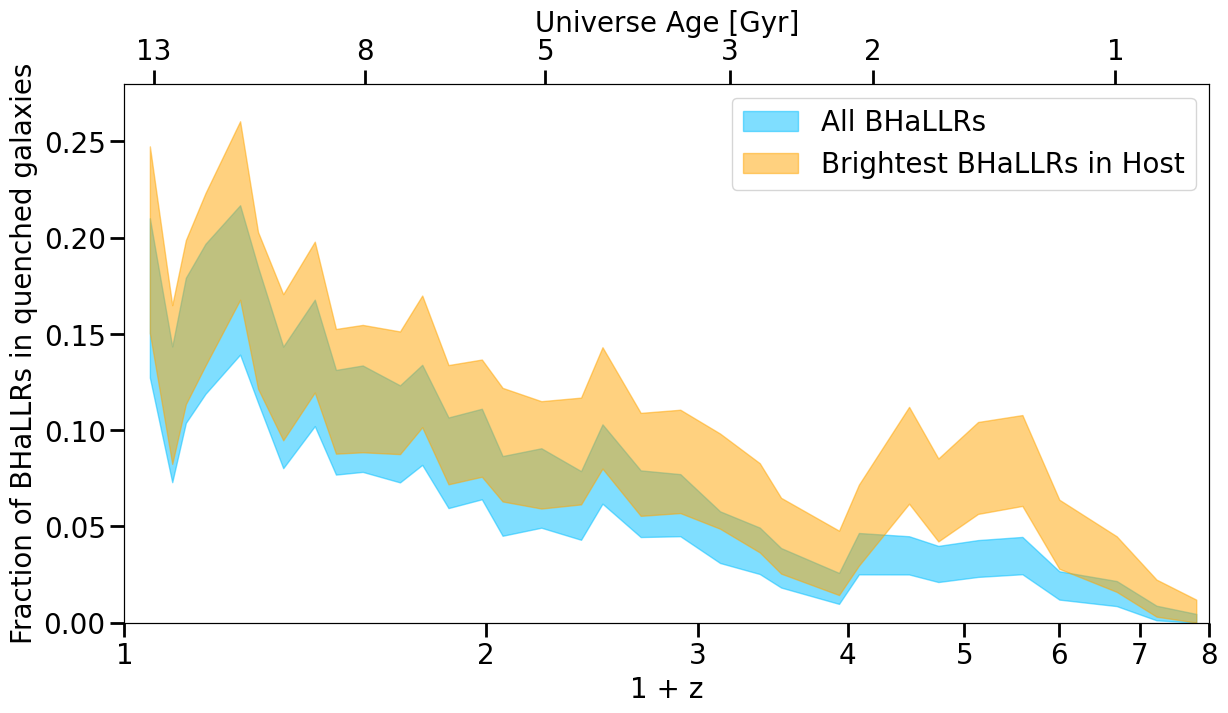

In [3]:
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(111)
transparency = 0.5
ok = np.where(np.array(LL_fraction) != 0)[0]
ax.fill_between(np.array(redshift)[ok], np.array(LL_fraction_error[0])[ok], np.array(LL_fraction_error[1])[ok], label = "All BHaLLRs", color="deepskyblue", alpha=transparency)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_fraction)[ok], yerr = [np.array(LL_fraction_error[0])[ok], np.array(LL_fraction_error[1])[ok]], zorder=2, ls="", label = "All BHs Two Mode", color="deepskyblue", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ok = np.where(np.array(LL_bright_fraction) != 0)[0]
ax.fill_between(np.array(redshift)[ok], np.array(LL_bright_fraction_error[0])[ok], np.array(LL_bright_fraction_error[1])[ok], label = "Brightest BHaLLRs in Host", color="orange", alpha=transparency)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_bright_fraction)[ok], yerr = [np.array(LL_bright_fraction_error[0])[ok], np.array(LL_bright_fraction_error[1])[ok]], zorder=1, ls="", label = "Brightest in Host", color="orange", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
# ok = np.where(np.array(LL_bright_outshine_fraction) != 0)[0]
# ax.fill_between(np.array(redshift)[ok], np.array(LL_bright_outshine_fraction_error[0])[ok], np.array(LL_bright_outshine_fraction_error[1])[ok], label = "Brightest in Host", color="crimson", alpha=transparency)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_bright_outshine_fraction)[ok], yerr = [np.array(LL_bright_outshine_fraction_error[0])[ok], np.array(LL_bright_outshine_fraction_error[1])[ok]], zorder=0, ls="", label = "Brightest + Outshine", color="crimson",  fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)


ax.set_xscale("log")
ax.set_xticks([1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9])
plt.ylim(0, 0.28)
ax.legend()
ax.set_xlabel("1 + z")
ax.set_xlim(1, 8)
ax.set_ylabel("Fraction of BHaLLRs in quenched galaxies")



age = [1,2,3,5,8,13]
red = np.add(bhtools.cosmology.getRedshift(age, 0.677, 0.31, 0.69), 1)
ax2 = ax.twiny()
ax2.set_xlabel("Universe Age [Gyr]")
ax2.set_xscale("log")
ax2.minorticks_off()
ax2.set_xticks(red)
ax2.set_xticklabels(age)
ax2.set_xlim(1, 8)

In [2]:
a_hard = 10**29.37
b_hard = 10**39.28
g_hard = 2.03
d_hard = 1.31

def objective(x, a, b):
    return a * x + b

def get_quenched_LL(timestep):
    step = db.get_timestep("cosmo25/%"+timestep)
    z = step.redshift
    data_raw = step.calculate_all("host_halo.Mstar", "host_halo.at(0.9 * radius(200),SFR_encl_25Myr)", "host_halo.at(0.9 * radius(200),SFR_encl_250Myr)", "BH_mdot", "BH_mass", "host_halo.halo_number()", "BH_central_distance")

    
    resolved_low = 10**7
    resolved_high = 10**15
    SFR_25_resolved = data_raw[1][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    SFR_250_resolved = data_raw[2][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    BH_mdot_resolved = data_raw[3][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    BH_mass_resolved = data_raw[4][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    Host_ids_resolved = data_raw[5][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    BH_distance_resolved = data_raw[6][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    Mstar_resolved = data_raw[0][np.where((data_raw[0] > resolved_low) & (data_raw[0] < resolved_high))[0]]
    
    
    SFR_master_array = []
    for count, item in enumerate(SFR_25_resolved):
        if item != 0:
            SFR_master_array.append(item)
        elif SFR_250_resolved[count] != 0:
            SFR_master_array.append(SFR_250_resolved[count])
        else:
            SFR_master_array.append((6*10**4)/(250*10**6))
    
    
    Host_lum_resolved = []
    for x in range(len(SFR_master_array)):
            Host_lum_resolved.append(a_hard * ((1 + z)**g_hard) * Mstar_resolved[x] + b_hard * ((1 + z)**d_hard) * SFR_master_array[x])
    
    
    two_mode_hard_lum_resolved = []
    for count, item in enumerate(BH_mdot_resolved):
        edd_acret_rate = BH_mass_resolved[count] * 2.20752 * 10**-8
        if item == 0:
            two_mode_hard_lum_resolved.append(0)
        elif item >= 0.1 * edd_acret_rate:
            bol_lum_ergs_s = 0.1 * item * (2*10**30)/(365*24*60*60) * (3*10**8)**2 * 10**7
            bol_lum_sol_lum = bol_lum_ergs_s/(3.826*10**33)
            correction_factor_hard = 4.073 * (bol_lum_sol_lum/10**10)**-0.026 + 12.60 * (bol_lum_sol_lum/10**10)**0.278
            two_mode_hard_lum_resolved.append(bol_lum_ergs_s/correction_factor_hard)
        else:
            f_edd = item/edd_acret_rate
            bol_lum_ergs_s = f_edd * item * (2*10**30)/(365*24*60*60) * (3*10**8)**2 * 10**7
            bol_lum_sol_lum = bol_lum_ergs_s/(3.826*10**33)
            correction_factor_hard = 4.073 * (bol_lum_sol_lum/10**10)**-0.026 + 12.60 * (bol_lum_sol_lum/10**10)**0.278
            two_mode_hard_lum_resolved.append(bol_lum_ergs_s/correction_factor_hard)

    


    ok = []
    for count, item in enumerate(SFR_master_array):
        if item > 2 * ((6*10**4)/(250*10**6)):
            ok.append(count)
    
    


    Mstar = np.log10(Mstar_resolved)
    SFR = np.log10(SFR_master_array)
    
    
    x, y = Mstar[ok], SFR[ok]
    bounds = ([0.8, -20], [0.9, 0])
    initial_guesses = [0.8, -20]
    popt, pcov = curve_fit(objective, x, y, bounds=bounds, p0=initial_guesses)
    slope, intercept = popt
    perr = np.sqrt(np.diag(pcov))
    alpha = 3 * (1 + z)**0.9

    indexs = []
    for count, item in enumerate(SFR):
        if item < objective(Mstar[count], slope, intercept - alpha * perr[1]):
            indexs.append(1)
        else:
            indexs.append(0)

    main_sequence_indices = np.where(np.array(indexs) == 0)[0]
    quenched_indices = np.where(np.array(indexs) == 1)[0]

    low_lum = [np.where((np.array(two_mode_hard_lum_resolved) >=1e38) & (np.array(two_mode_hard_lum_resolved) <= 1e41))][0][0]
    low_lum_wan = [np.where((np.array(two_mode_hard_lum_resolved) >=1e38) & (np.array(two_mode_hard_lum_resolved) <= 1e41) & (np.array(BH_distance_resolved) > 1))][0][0]
    fraction_LL_in_quenched_wanderer = sum(np.array(indexs)[low_lum_wan])/len(low_lum_wan)
    low_lum_central = [np.where((np.array(two_mode_hard_lum_resolved) >=1e38) & (np.array(two_mode_hard_lum_resolved) <= 1e41) & (np.array(BH_distance_resolved) <= 1))][0][0]
    fraction_LL_in_quenched_central = sum(np.array(indexs)[low_lum_central])/len(low_lum_central)
    # print("Fraction of BHILLs in quenched galaxies", fraction_LL_in_quenched)

    unique_occupied_ids = np.unique(Host_ids_resolved)
    unique_max_lum = []
    unique_max_indexs = []
    unique_max_host_lum = []
    unique_max_distance = []
    for item in unique_occupied_ids:
        index_of_current_halo = []
        index_of_current_halo = np.where(Host_ids_resolved == item)
        max_index = np.argmax(np.array(two_mode_hard_lum_resolved)[index_of_current_halo[0]])
        unique_max_lum.append(np.array(two_mode_hard_lum_resolved)[index_of_current_halo[0]][max_index])
        unique_max_indexs.append(np.array(indexs)[index_of_current_halo[0]][max_index])
        unique_max_host_lum.append(np.array(Host_lum_resolved)[index_of_current_halo[0]][max_index])
        unique_max_distance.append(np.array(BH_distance_resolved)[index_of_current_halo[0]][max_index])
    
    low_lum1 = [np.where((np.array(unique_max_lum) >= 1e38) & (np.array(unique_max_lum) <= 1e41))][0][0]
    low_lum1_wan = [np.where((np.array(unique_max_lum) >= 1e38) & (np.array(unique_max_lum) <= 1e41) & (np.array(unique_max_distance) > 1))][0][0]
    fraction_brightest_LL_in_quenched_wanderer = sum(np.array(unique_max_indexs)[low_lum1_wan])/len(low_lum1_wan)
    low_lum1_central = [np.where((np.array(unique_max_lum) >= 1e38) & (np.array(unique_max_lum) <= 1e41) & (np.array(unique_max_distance) <= 1))][0][0]
    fraction_brightest_LL_in_quenched_central = sum(np.array(unique_max_indexs)[low_lum1_central])/len(low_lum1_central)
    # print("Fraction of BHILLs, that are brightest in host, in quenched galaxies", fraction_brightest_LL_in_quenched)
    
#     brightest_outshine_lum = []
#     indexs_brightes_outshine = []
#     BH_distance_brightes_outshine = []
#     for count, item in enumerate(unique_max_lum):
#         if item >= 2 * unique_max_host_lum[count]:
#             brightest_outshine_lum.append(item)
#             indexs_brightes_outshine.append(unique_max_indexs[count])
#             BH_distance_brightes_outshine.append(unique_max_distance[count])
            
    
#     low_lum2 = [np.where((np.array(brightest_outshine_lum) >= 1e38) & (np.array(brightest_outshine_lum) <= 1e41))][0][0]
#     low_lum2_wan = [np.where((np.array(brightest_outshine_lum) >= 1e38) & (np.array(brightest_outshine_lum) <= 1e41) & (np.array(BH_distance_brightes_outshine) > 1))][0][0]
#     fraction_brightest_outshine_LL_in_quenched_wanderer = sum(np.array(indexs_brightes_outshine)[low_lum2_wan])/len(low_lum2)
#     low_lum2_central = [np.where((np.array(brightest_outshine_lum) >= 1e38) & (np.array(brightest_outshine_lum) <= 1e41) & (np.array(BH_distance_brightes_outshine) <= 1))][0][0]
#     fraction_brightest_outshine_LL_in_quenched_central = sum(np.array(indexs_brightes_outshine)[low_lum2_central])/len(low_lum2)
    # print("Fraction of BHILLs, that are brightest in host and outshine, in quenched galaxies", fraction_brightest_outshine_LL_in_quenched)
    total_LL_wanderers = len(low_lum_wan)
    total_LL_centrals = len(low_lum_central)
    total_brightest_LL_wanderers = len(low_lum1_wan)
    total_brightest_LL_centrals = len(low_lum1_central)
    
    # total_number_brightest_outshine = len(low_lum2)
    return fraction_LL_in_quenched_wanderer, fraction_LL_in_quenched_central, fraction_brightest_LL_in_quenched_wanderer, fraction_brightest_LL_in_quenched_central, total_LL_wanderers, total_LL_centrals, total_brightest_LL_wanderers, total_brightest_LL_centrals, z

LL_fraction_wan = []
LL_fraction_cen = []
LL_bright_fraction_wan = []
LL_bright_fraction_cen = []
LL_wanderer_total = []
LL_central_total = []
brightest_LL_wanderer_total = []
brightest_LL_central_total = []
redshift = []
for item in [sim.timesteps[21:-1:3][x].relative_filename[-4:] for x in range(len(sim.timesteps[21:-1:3]))]:
    data = get_quenched_LL(item)
    LL_fraction_wan.append(data[0])
    LL_fraction_cen.append(data[1])
    LL_bright_fraction_wan.append(data[2])
    LL_bright_fraction_cen.append(data[3])
    LL_wanderer_total.append(data[4])
    LL_central_total.append(data[5])
    brightest_LL_wanderer_total.append(data[6])
    brightest_LL_central_total.append(data[7])
    redshift.append(data[8])

    
redshift = np.add(redshift, 1)

In [3]:
def binomial_errors(confidence, ntrue, ntot):
    import scipy.stats
    alpha = 1 - confidence
    lo = scipy.stats.beta.ppf(alpha / 2, ntrue, ntot - ntrue + 1)
    hi = scipy.stats.beta.ppf(1 - alpha / 2, ntrue + 1, ntot - ntrue)
    return lo, hi


LL_fraction_error_wan = [[],[]]
LL_fraction_error_cen = [[],[]]
LL_bright_fraction_error_wan = [[],[]]
LL_bright_fraction_error_cen = [[],[]]

for count, item in enumerate(LL_fraction_wan):
    data = binomial_errors(0.95, item * LL_wanderer_total[count], LL_wanderer_total[count])
    LL_fraction_error_wan[0].append(data[0])
    LL_fraction_error_wan[1].append(data[1])
    data = binomial_errors(0.95, LL_fraction_cen[count] * LL_central_total[count], LL_central_total[count])
    LL_fraction_error_cen[0].append(data[0])
    LL_fraction_error_cen[1].append(data[1])
    data = binomial_errors(0.95, LL_bright_fraction_wan[count] * brightest_LL_wanderer_total[count], brightest_LL_wanderer_total[count])
    LL_bright_fraction_error_wan[0].append(data[0])
    LL_bright_fraction_error_wan[1].append(data[1])
    data = binomial_errors(0.95, LL_bright_fraction_cen[count] * brightest_LL_central_total[count], brightest_LL_central_total[count])
    LL_bright_fraction_error_cen[0].append(data[0])
    LL_bright_fraction_error_cen[1].append(data[1])

In [4]:
LL_bright_fraction_error_wan[0][0] = LL_bright_fraction_error_wan[0][2]
LL_bright_fraction_error_wan[0][1] = LL_bright_fraction_error_wan[0][2]
LL_bright_fraction_error_cen[0][0] = LL_bright_fraction_error_cen[0][1]

LL_fraction_error_wan[0][0] = LL_fraction_error_wan[0][2]
LL_fraction_error_wan[0][1] = LL_fraction_error_wan[0][2]
LL_fraction_error_cen[0][0] = LL_fraction_error_cen[0][1]

WARNING assuming provided time is in units of Gyr
WARNING assuming provided time is in units of Gyr


(1.0, 8.0)

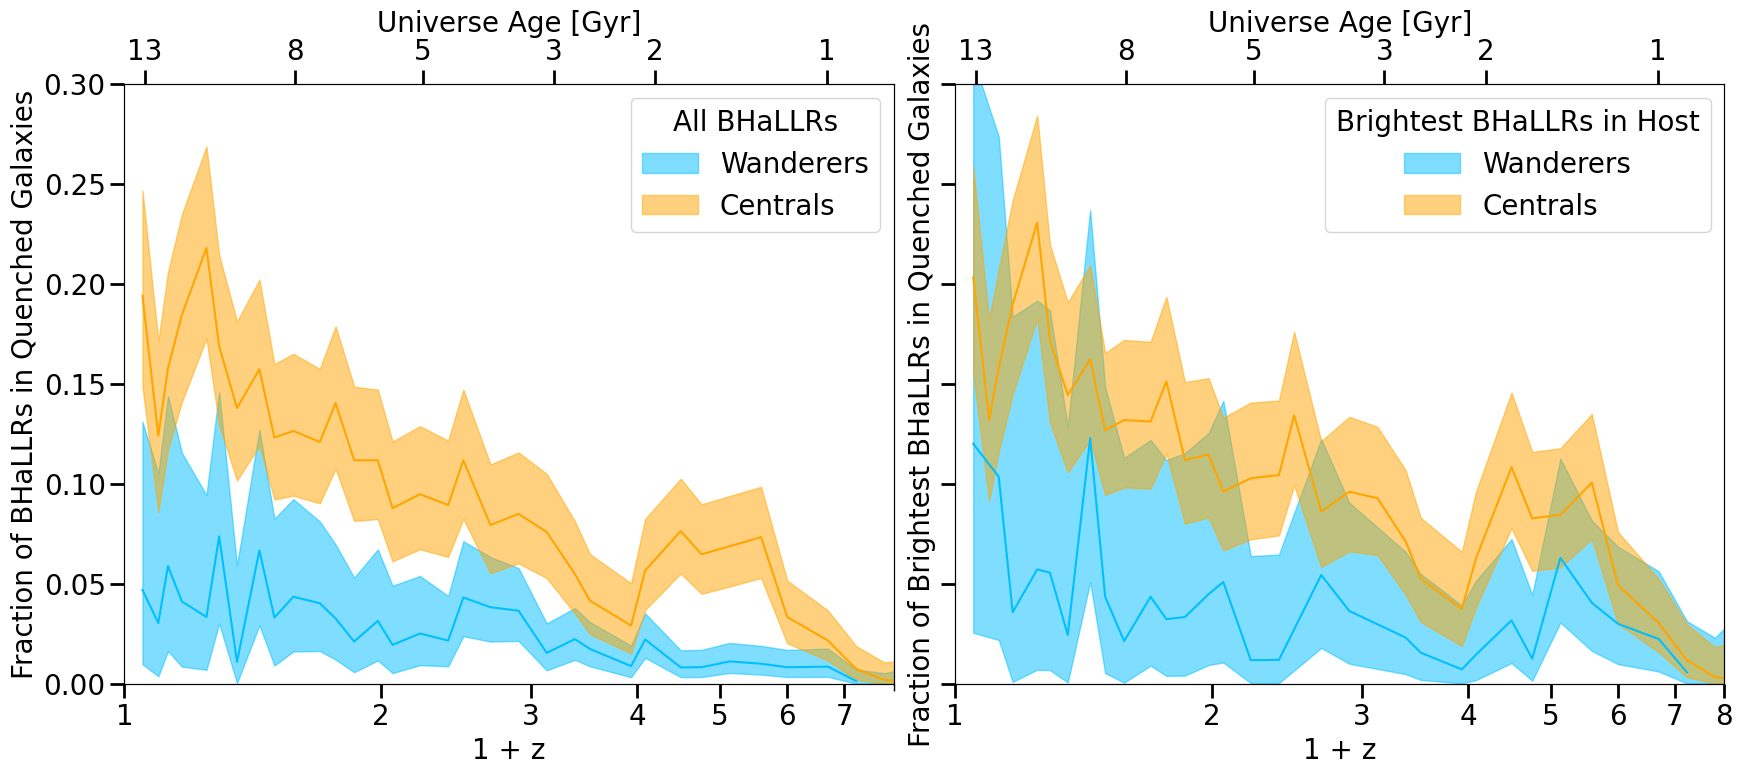

In [18]:
fig, ax = plt.subplots(1,2, figsize = (16,6), sharey=True)
plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.08, hspace=0)

transparency = 0.5
ax[0].plot(redshift, LL_fraction_cen, color="orange")
ok = np.where((np.array(LL_fraction_wan) != 0))[0]
ax[0].plot(np.array(redshift)[ok], np.array(LL_fraction_wan)[ok], color="deepskyblue")
ax[1].plot(redshift, LL_bright_fraction_cen, color="orange")
ok = np.where((np.array(LL_bright_fraction_wan) != 0))[0]
ax[1].plot(np.array(redshift)[ok], np.array(LL_bright_fraction_wan)[ok], color="deepskyblue")

ok = np.where((np.array(LL_fraction_wan) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax[0].fill_between(np.array(redshift)[ok], np.array(LL_fraction_error_wan[0])[ok], np.array(LL_fraction_error_wan[1])[ok], label = "Wanderers", color="deepskyblue", alpha = transparency)
ok = np.where((np.array(LL_fraction_cen) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax[0].fill_between(np.array(redshift)[ok], np.array(LL_fraction_error_cen[0])[ok], np.array(LL_fraction_error_cen[1])[ok], label = "Centrals", color="orange", alpha = transparency)
ax[0].set_xscale("log")
ax[0].set_ylim(0, 0.30)
ax[0].legend(title="All BHaLLRs")
ax[0].set_ylabel("Fraction of BHaLLRs in Quenched Galaxies")
ax[0].set_xticks([1,2,3,4,5,6,7,9], [1,2,3,4,5,6,7,9])
ax[0].set_xlabel("1 + z")
ax[0].set_xlim(1,8)


age = [1,2,3,5,8,13]
red = np.add(bhtools.cosmology.getRedshift(age, 0.677, 0.31, 0.69), 1)
ax1 = ax[0].twiny()
ax1.set_xlabel("Universe Age [Gyr]")
ax1.set_xscale("log")
ax1.minorticks_off()
ax1.set_xticks(red)
ax1.set_xticklabels(age)
ax1.set_xlim(1, 8)


ok = np.where((np.array(LL_bright_fraction_wan) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax[1].fill_between(np.array(redshift)[ok], np.array(LL_bright_fraction_error_wan[0])[ok], np.array(LL_bright_fraction_error_wan[1])[ok], label = "Wanderers", color="deepskyblue", alpha = transparency)
ok = np.where((np.array(LL_bright_fraction_cen) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax[1].fill_between(np.array(redshift)[ok], np.array(LL_bright_fraction_error_cen[0])[ok], np.array(LL_bright_fraction_error_cen[1])[ok], label = "Centrals", color="orange", alpha = transparency)
ax[1].set_xscale("log")
ax[1].set_ylim(0, 0.30)
ax[1].legend(title="Brightest BHaLLRs in Host")
ax[1].set_ylabel("Fraction of Brightest BHaLLRs in Quenched Galaxies")
ax[1].set_xticks([1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9])
ax[1].set_xlabel("1 + z")
ax[1].set_xlim(1,8)


age = [1,2,3,5,8,13]
red = np.add(bhtools.cosmology.getRedshift(age, 0.677, 0.31, 0.69), 1)
ax2 = ax[1].twiny()
ax2.set_xlabel("Universe Age [Gyr]")
ax2.set_xscale("log")
ax2.minorticks_off()
ax2.set_xticks(red)
ax2.set_xticklabels(age)
ax2.set_xlim(1, 8)

WARNING assuming provided time is in units of Gyr


(1.0, 8.0)

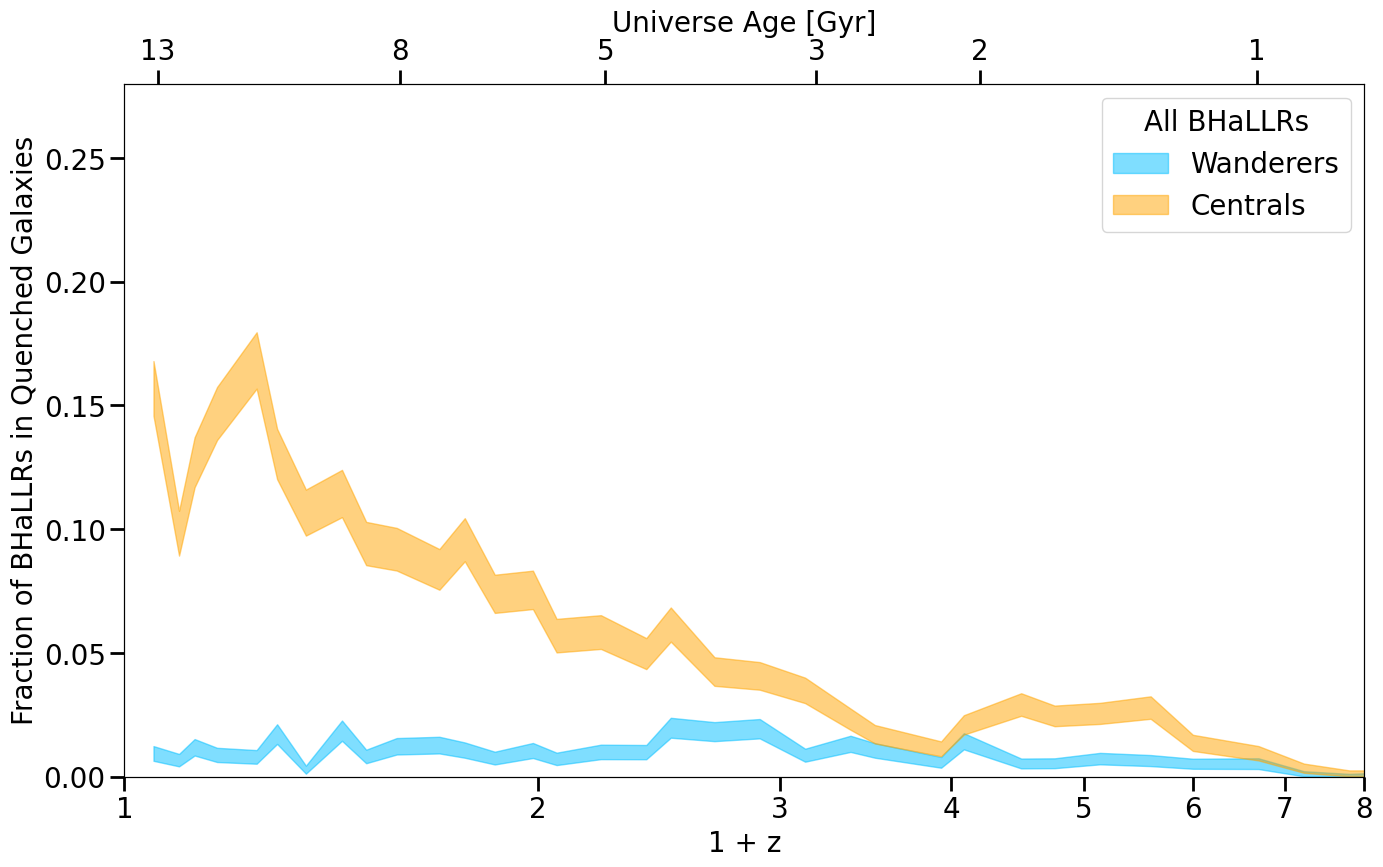

In [10]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

transparency = 0.5

ok = np.where((np.array(LL_fraction_wan) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax.fill_between(np.array(redshift)[ok], np.array(LL_fraction_error_wan[0])[ok], np.array(LL_fraction_error_wan[1])[ok], label = "Wanderers", color="deepskyblue", alpha = transparency)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_fraction_wan)[ok], yerr = [np.array(LL_fraction_error_wan[0])[ok], np.array(LL_fraction_error_wan[1])[ok]], zorder=2, ls="", label = "Wanderers", color="deepskyblue", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ok = np.where(np.array(LL_fraction_wan) == 0)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_fraction_error_wan[1])[ok], yerr = [np.array(LL_fraction_error_wan[1])[ok] - 10**-3.4, np.array(LL_fraction_error_wan[1])[ok]], uplims=True, zorder=2, ls="", color="deepskyblue", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ok = np.where((np.array(LL_fraction_cen) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax.fill_between(np.array(redshift)[ok], np.array(LL_fraction_error_cen[0])[ok], np.array(LL_fraction_error_cen[1])[ok], label = "Centrals", color="orange", alpha = transparency)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_fraction_cen)[ok], yerr = [np.array(LL_fraction_error_cen[0])[ok], np.array(LL_fraction_error_cen[1])[ok]], zorder=2, ls="", label = "Centrals", color="orange", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ok = np.where(np.array(LL_fraction_cen) == 0)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_fraction_error_cen[1])[ok], yerr = [np.array(LL_fraction_error_cen[1])[ok] - 10**-3.4, np.array(LL_fraction_error_cen[1])[ok]], uplims=True, zorder=2, ls="", color="orange", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ax.set_xscale("log")
ax.set_ylim(0, 0.28)
ax.legend(title="All BHaLLRs")
ax.set_ylabel("Fraction of BHaLLRs in Quenched Galaxies")
ax.set_xticks([1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9])
# plt.ylim(10**-3.45, 1)
ax.set_xlabel("1 + z")
ax.set_xlim(1,8)


age = [1,2,3,5,8,13]
red = np.add(bhtools.cosmology.getRedshift(age, 0.677, 0.31, 0.69), 1)
ax2 = ax.twiny()
ax2.set_xlabel("Universe Age [Gyr]")
ax2.set_xscale("log")
ax2.minorticks_off()
ax2.set_xticks(red)
ax2.set_xticklabels(age)
ax2.set_xlim(1, 8)

In [4]:
LL_bright_fraction_error_wan[0][0] = LL_bright_fraction_error_wan[0][2]
LL_bright_fraction_error_wan[0][1] = LL_bright_fraction_error_wan[0][2]
LL_bright_fraction_error_cen[0][0] = LL_bright_fraction_error_cen[0][1]

WARNING assuming provided time is in units of Gyr


(1.0, 8.0)

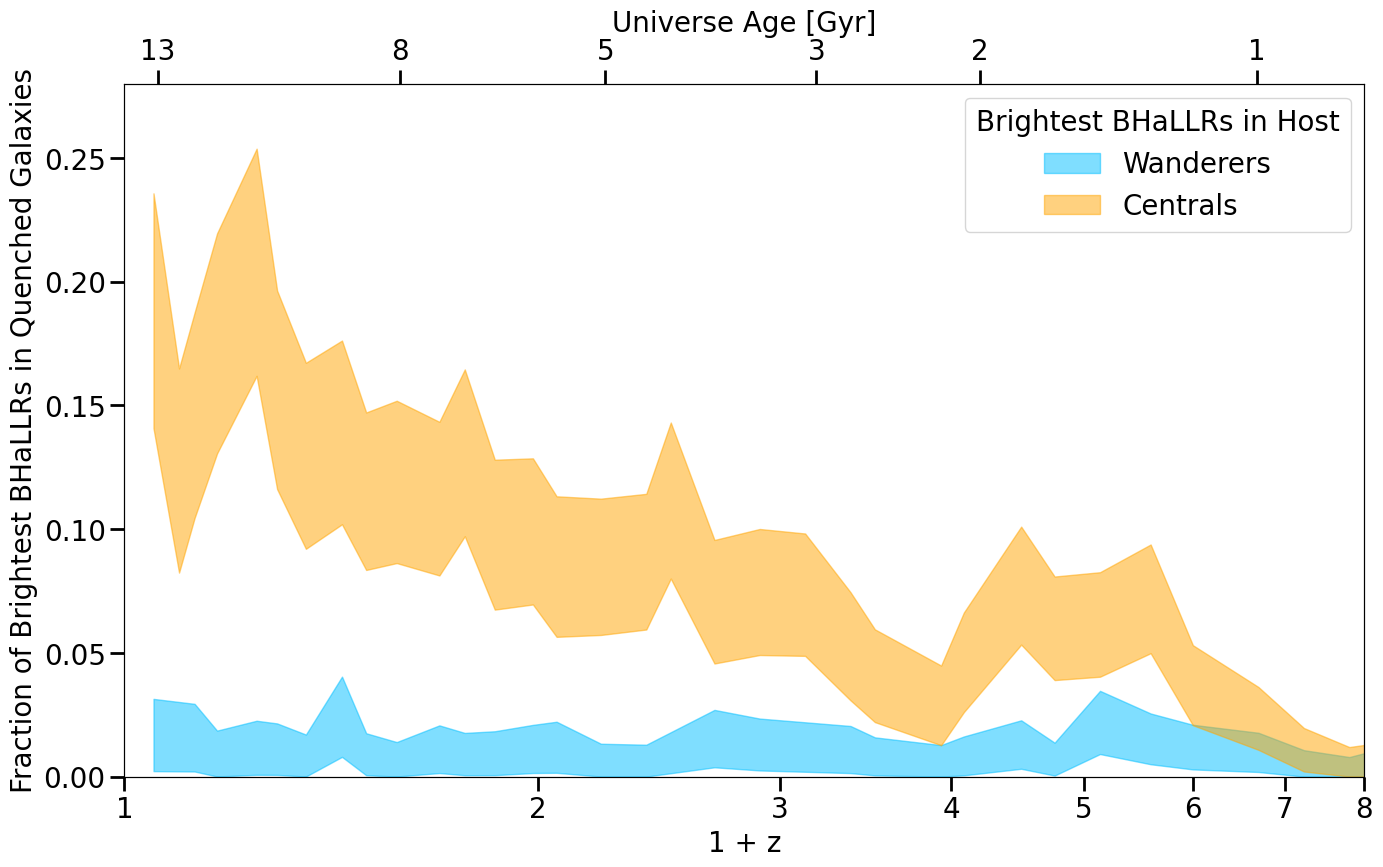

In [5]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)

transparency = 0.5

ok = np.where((np.array(LL_bright_fraction_wan) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax.fill_between(np.array(redshift)[ok], np.array(LL_bright_fraction_error_wan[0])[ok], np.array(LL_bright_fraction_error_wan[1])[ok], label = "Wanderers", color="deepskyblue", alpha = transparency)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_bright_fraction_wan)[ok], yerr = [np.array(LL_bright_fraction_error_wan[0])[ok], np.array(LL_bright_fraction_error_wan[1])[ok]], zorder=2, ls="", label = "Wanderers", color="deepskyblue", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ok = np.where(np.array(LL_bright_fraction_wan) == 0)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_bright_fraction_error_wan[1])[ok], yerr = [np.array(LL_bright_fraction_error_wan[1])[ok] - 10**-3.4, np.array(LL_bright_fraction_error_wan[1])[ok]], uplims=True, zorder=2, ls="", color="deepskyblue", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ok = np.where((np.array(LL_bright_fraction_cen) != 0) | (np.array(LL_fraction_wan) == 0))[0]
ax.fill_between(np.array(redshift)[ok], np.array(LL_bright_fraction_error_cen[0])[ok], np.array(LL_bright_fraction_error_cen[1])[ok], label = "Centrals", color="orange", alpha = transparency)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_bright_fraction_cen)[ok], yerr = [np.array(LL_bright_fraction_error_cen[0])[ok], np.array(LL_bright_fraction_error_cen[1])[ok]], zorder=2, ls="", label = "Centrals", color="orange", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ok = np.where(np.array(LL_bright_fraction_cen) == 0)
# ax.errorbar(np.array(redshift)[ok], np.array(LL_bright_fraction_error_cen[1])[ok], yerr = [np.array(LL_bright_fraction_error_cen[1])[ok] - 10**-3.4, np.array(LL_bright_fraction_error_cen[1])[ok]], uplims=True, zorder=2, ls="", color="orange", fmt = "o", markersize=5, elinewidth = 1, capsize = 3, capthick = 1)
ax.set_xscale("log")
ax.set_ylim(0, 0.28)
ax.legend(title="Brightest BHaLLRs in Host")
ax.set_ylabel("Fraction of Brightest BHaLLRs in Quenched Galaxies")
ax.set_xticks([1,2,3,4,5,6,7,8,9], [1,2,3,4,5,6,7,8,9])
# plt.ylim(10**-3.45, 1)
ax.set_xlabel("1 + z")
ax.set_xlim(1,8)


age = [1,2,3,5,8,13]
red = np.add(bhtools.cosmology.getRedshift(age, 0.677, 0.31, 0.69), 1)
ax2 = ax.twiny()
ax2.set_xlabel("Universe Age [Gyr]")
ax2.set_xscale("log")
ax2.minorticks_off()
ax2.set_xticks(red)
ax2.set_xticklabels(age)
ax2.set_xlim(1, 8)